In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
base_path = '/home/jim/Documents/AI/fact/reproduction/'
sys.path.insert(0, base_path)
from Model import *

In [3]:
model = Model.Initialize('vae', None, pretrained_path=f'{base_path}Models/vae.pt')

Loading the pretrained model...


In [4]:
# sys.path.insert(0, "../Code/")
# from load_scvis import load_vae

path = f'{base_path}/ELDR/Housing/Data/'


data_file = path + 'X.tsv'
target_file = path + 'y.tsv'
input_dim = 13
#model_file = "Model/model/perplexity_10_regularizer_0.001_batch_size_505_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt"
num_clusters = 6

x = pd.read_csv(data_file, sep="\t").values
y = pd.read_csv(target_file, sep="\t").values



data_rep = model.Encode(x)

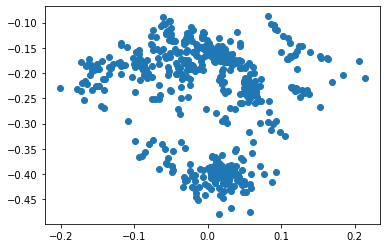

In [5]:
plt.scatter(data_rep[:,0], data_rep[:,1])
plt.show()

In [6]:
from sklearn.cluster import KMeans
num_clusters = 6

# rep = model.Encode(x)
kmeans = KMeans(n_clusters = num_clusters).fit(data_rep)

In [7]:
from eldr.plotter.myplot import *
means, centers, indices = plot_groups(x, data_rep.numpy(), num_clusters, kmeans.labels_, name = "./synth-rep.png")

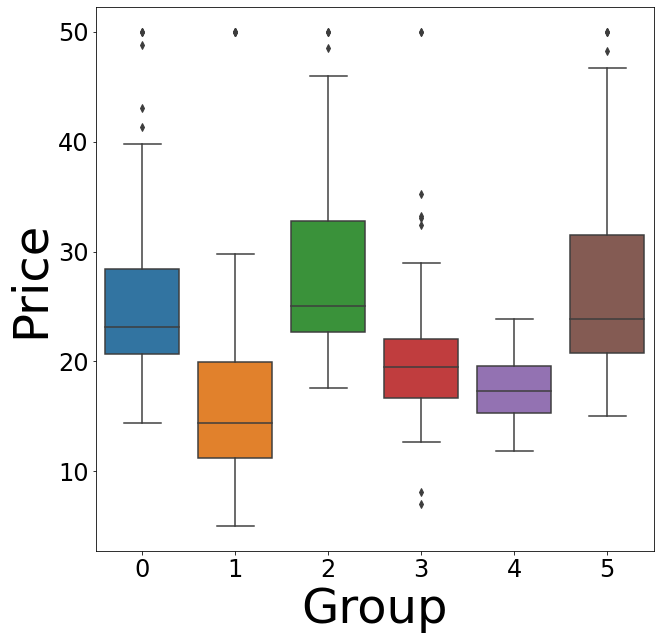

In [8]:
# See what signal is enocded in the clusters
import matplotlib.pyplot as plt
import seaborn as sns

labels = kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(ax = ax, x = labels, y = np.squeeze(y))
ax.set(xlabel = "Group", ylabel = "Price")
ax.get_figure().savefig("housing-labels.png")


In [9]:
from eldr.explain.explain_cs import *
epsilon = 0.05

Explainer = Explain(model, means, centers, use_scaling=True)

if True:
    Explainer.eval_epsilon(torch.tensor(x), indices, epsilon)
    

In [10]:
# with open('./epsilon.txt', 'r') as f:
#     e = f.readlines()
#     print(e)


In [11]:
results_path = f'{base_path}experiments/Housing_scaling/explanations/'
run = True

# Initialize results 
# Columns are:  K, TGT-correctness, TGT-coverage, DBM-correctness, DBM-coverage
K = [1, 3, 5, 7, 9, 11, 13]
if run:
    os.system(f"rm {results_path}*.npy")
    os.system(f"rm {results_path}out.csv")
    
    out = np.zeros((len(K), 5))

    c = 0
    for k in K:
        out[c, 0] = k
        c += 1

In [12]:
import json
from types import SimpleNamespace
best_val = 0.0
ntrials = 1
lg = 1.5
config = SimpleNamespace(**json.load(open(f'{base_path}configs/tgt.json', 'r')))


if run:
    c = 0
    for k in K:

        best_val = 0.0
        for lg in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]:
            for trial in range(5):
                config.learning_rate = 0.01
                config.lambda_global = lg
                config.consecutive_steps = 5
                print(config)
                Explainer = Explain(model, means, centers, use_scaling=True)
                deltas, logit_gammas, _ = Explainer.explain(config)
                a, b = Explainer.metrics(x, indices, deltas, epsilon, k = k, logit_gammas=logit_gammas) 

                val = np.mean(a)

                if val > best_val:
                    best_val = val
                    out[c, 1] = best_val
                    out[c, 2] = np.mean(b)
                    np.save(f"{results_path}deltas" + str(k) + ".npy", deltas)
                    np.save(f"{results_path}logit_gammas" + str(k) + ".npy", logit_gammas)

                os.system("rm -rf explanation")
        c += 1

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 1484, ema: 0.010693345125783526, initial 3, target 1
Retrieving the best deltas...
iter: 1501, ema: 0.010578520272418922, initial 4, target 1
Retrieving the best deltas...
iter: 1505, ema: 0.010444858753919472, initial 3, target 1
Retrieving the best deltas...
iter: 1507, ema: 0.010317910223200666, initial 3, target 1
Retrieving the best deltas...
iter: 1509, ema: 0.010192685916734365, initial 3, target 1
Retrieving the best deltas...
iter: 1515, ema: 0.010041743524561284, initial 3, target 1
Retrieving the best deltas...
iter: 1517, ema: 0.009919768308651997, initial 3, target 1
Retrieving the best deltas...
iter: 1519, ema: 0.009799449135319648, initial 3, target 1
Retrieving the best deltas...
iter: 1521, ema: 0.009639322194251836, initial 4, target 3
Retrieving the best deltas...
iter: 1523, ema: 0.00948201423480134, initial 4, target 3
Retrieving the best deltas...
iter: 1556, ema: 0.009338561838642795, initial 0, target 4
Retrieving the best de

Retrieving the best deltas...
iter: 239, ema: 0.01888906793133977, initial 2, target 5
Retrieving the best deltas...
iter: 241, ema: 0.018749133767557297, initial 3, target 5
Retrieving the best deltas...
iter: 243, ema: 0.01861033748360912, initial 3, target 5
Retrieving the best deltas...
iter: 245, ema: 0.018444955332464905, initial 3, target 4
Retrieving the best deltas...
iter: 247, ema: 0.018253538411978663, initial 3, target 4
Retrieving the best deltas...
iter: 249, ema: 0.018063972763266684, initial 3, target 4
Retrieving the best deltas...
iter: 482, ema: 0.017959160132245626, initial 2, target 5
Retrieving the best deltas...
iter: 483, ema: 0.017830724324403743, initial 2, target 5
Retrieving the best deltas...
iter: 484, ema: 0.017703342805368057, initial 2, target 5
Retrieving the best deltas...
iter: 486, ema: 0.01755733457822165, initial 3, target 5
Retrieving the best deltas...
iter: 488, ema: 0.01741292108274203, initial 3, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 2342, ema: 0.005442565488682774, initial 4, target 3
Retrieving the best deltas...
iter: 2469, ema: 0.00533444021382999, initial 4, target 3
Retrieving the best deltas...
iter: 2485, ema: 0.005234131593833977, initial 3, target 0
Retrieving the best deltas...
iter: 2499, ema: 0.005115672524650166, initial 3, target 1
Retrieving the best deltas...
iter: 2502, ema: 0.004983074208773232, initial 5, target 0
Retrieving the best deltas...
iter: 2505, ema: 0.004862322590661759, initial 5, target 2
Retrieving the best deltas...
iter: 2508, ema: 0.004760700712279011, initial 5, target 2
Retrieving the best deltas...
iter: 2515, ema: 0.004642507976571388, initial 5, target 0
Retrieving the best deltas...
iter: 2518, ema: 0.0045238200304728825, initial 5, target 0
Retrieving the best deltas...
iter: 2526, ema: 0.0044177380932553705, initial 3, target 0
Retrieving the best deltas...
iter: 2531, ema: 0.00429980965468163, initial 5, target 0
Retrieving the best d

Retrieving the best deltas...
iter: 940, ema: 0.012565428177260618, initial 3, target 4
Retrieving the best deltas...
iter: 941, ema: 0.012463919611357975, initial 3, target 4
Retrieving the best deltas...
iter: 942, ema: 0.012363316367764022, initial 3, target 4
Retrieving the best deltas...
iter: 944, ema: 0.012164791657403574, initial 3, target 4
Retrieving the best deltas...
iter: 946, ema: 0.011969786633856377, initial 3, target 4
Retrieving the best deltas...
iter: 948, ema: 0.011778235214593376, initial 3, target 4
Retrieving the best deltas...
iter: 1027, ema: 0.0116408340794911, initial 2, target 5
Retrieving the best deltas...
iter: 1029, ema: 0.011452171645162618, initial 2, target 5
Retrieving the best deltas...
iter: 1031, ema: 0.011300005513205504, initial 4, target 0
Retrieving the best deltas...
iter: 1033, ema: 0.011150342144484859, initial 4, target 0
Retrieving the best deltas...
iter: 1035, ema: 0.011004770565326907, initial 3, target 0
Retrieving the best deltas...

Retrieving the best deltas...
iter: 5886, ema: 0.0009601624353929453, initial 2, target 0
Retrieving the best deltas...
iter: 5955, ema: 0.0008593487745153602, initial 4, target 3
Retrieving the best deltas...
iter: 5969, ema: 0.0007544631275002878, initial 4, target 1
Retrieving the best deltas...
iter: 6947, ema: 0.0006506331272479839, initial 3, target 5
Retrieving the best deltas...
iter: 7641, ema: 0.0005476857197376609, initial 5, target 4
Retrieving the best deltas...
iter: 8307, ema: 0.00044707264497064814, initial 5, target 2
Retrieving the best deltas...
iter: 9269, ema: 0.00034488327794434434, initial 3, target 4
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

Retrieving the best deltas...
iter: 162, ema: 0.03176354467973397, initial 3, target 2
Retrieving the best deltas...
iter: 164, ema: 0.031567352053095306, initial 3, target 2
Retrieving the best deltas...
iter: 165, ema: 0.03143311449384065, initial 0, target 2
Retrieving the best deltas...
iter: 166, ema: 0.03129960165704705, initial 0, target 2
Retrieving the best deltas...
iter: 167, ema: 0.03116680849341118, initial 0, target 2
Retrieving the best deltas...
iter: 168, ema: 0.03103472981785822, initial 0, target 2
Retrieving the best deltas...
iter: 169, ema: 0.030903360627549264, initial 0, target 2
Retrieving the best deltas...
iter: 170, ema: 0.03061952513165305, initial 5, target 0
Retrieving the best deltas...
iter: 171, ema: 0.030338447123976642, initial 5, target 0
Retrieving the best deltas...
iter: 172, ema: 0.030060099239185425, initial 5, target 0
Retrieving the best deltas...
iter: 173, ema: 0.029784454455447317, initial 5, target 0
Retrieving the best deltas...
iter: 17

Retrieving the best deltas...
iter: 1004, ema: 0.013565337832175861, initial 0, target 3
Retrieving the best deltas...
iter: 1025, ema: 0.013442775143597466, initial 0, target 3
Retrieving the best deltas...
iter: 1027, ema: 0.013315507604882372, initial 0, target 3
Retrieving the best deltas...
iter: 1029, ema: 0.013189885336003768, initial 0, target 3
Retrieving the best deltas...
iter: 1032, ema: 0.013071377798172424, initial 2, target 0
Retrieving the best deltas...
iter: 1150, ema: 0.01294451645054033, initial 5, target 2
Retrieving the best deltas...
iter: 1152, ema: 0.012768756278309595, initial 5, target 2
Retrieving the best deltas...
iter: 1154, ema: 0.012595894135227029, initial 5, target 2
Retrieving the best deltas...
iter: 1156, ema: 0.012457384965690363, initial 3, target 5
Retrieving the best deltas...
iter: 1158, ema: 0.01232100440501186, initial 3, target 5
Retrieving the best deltas...
iter: 1339, ema: 0.012200306005225856, initial 3, target 2
Retrieving the best del

Retrieving the best deltas...
iter: 4062, ema: 0.0014610607847834144, initial 3, target 4
Retrieving the best deltas...
iter: 4471, ema: 0.0013562116982815484, initial 3, target 4
Retrieving the best deltas...
iter: 4844, ema: 0.0012539023629743928, initial 5, target 2
Retrieving the best deltas...
iter: 4964, ema: 0.0011519958799050378, initial 3, target 4
Retrieving the best deltas...
iter: 4980, ema: 0.0010442703324775823, initial 3, target 1
Retrieving the best deltas...
iter: 6049, ema: 0.0009410680016141427, initial 1, target 3
Retrieving the best deltas...
iter: 6275, ema: 0.0008367813094650281, initial 4, target 3
Retrieving the best deltas...
iter: 6824, ema: 0.0007359945434947552, initial 3, target 1
Retrieving the best deltas...
iter: 7403, ema: 0.0006346252245921162, initial 4, target 5
Retrieving the best deltas...
iter: 7724, ema: 0.0005328024509192655, initial 3, target 1
Retrieving the best deltas...
iter: 7831, ema: 0.00043094336109141446, initial 2, target 5
Retrievin

Retrieving the best deltas...
iter: 219, ema: 0.03534472023007384, initial 0, target 5
Retrieving the best deltas...
iter: 227, ema: 0.035096409188627296, initial 3, target 4
Retrieving the best deltas...
iter: 228, ema: 0.034844694718594256, initial 3, target 4
Retrieving the best deltas...
iter: 229, ema: 0.034594972136642685, initial 3, target 4
Retrieving the best deltas...
iter: 230, ema: 0.034359774746369205, initial 0, target 4
Retrieving the best deltas...
iter: 231, ema: 0.034126570705614666, initial 0, target 4
Retrieving the best deltas...
iter: 232, ema: 0.03389534127297675, initial 0, target 4
Retrieving the best deltas...
iter: 233, ema: 0.03366606787584075, initial 0, target 4
Retrieving the best deltas...
iter: 234, ema: 0.03343873204349905, initial 0, target 4
Retrieving the best deltas...
iter: 244, ema: 0.033222011551095526, initial 0, target 2
Retrieving the best deltas...
iter: 245, ema: 0.033007859277561453, initial 3, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 656, ema: 0.01570946983249892, initial 0, target 5
Retrieving the best deltas...
iter: 657, ema: 0.015581122754700633, initial 0, target 5
Retrieving the best deltas...
iter: 658, ema: 0.015453964741839245, initial 0, target 5
Retrieving the best deltas...
iter: 659, ema: 0.015327984250183049, initial 0, target 5
Retrieving the best deltas...
iter: 852, ema: 0.015176825440846524, initial 1, target 3
Retrieving the best deltas...
iter: 854, ema: 0.015020796989351144, initial 1, target 3
Retrieving the best deltas...
iter: 860, ema: 0.014889162070655229, initial 0, target 3
Retrieving the best deltas...
iter: 862, ema: 0.014728748901271618, initial 0, target 3
Retrieving the best deltas...
iter: 864, ema: 0.014570669215079997, initial 0, target 3
Retrieving the best deltas...
iter: 923, ema: 0.014383949370467523, initial 4, target 3
Retrieving the best deltas...
iter: 924, ema: 0.014274361113119641, initial 4, target 3
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 3707, ema: 0.0024791955742906463, initial 3, target 1
Retrieving the best deltas...
iter: 3713, ema: 0.0023726839628011196, initial 3, target 5
Retrieving the best deltas...
iter: 3723, ema: 0.0022652955406377248, initial 1, target 4
Retrieving the best deltas...
iter: 4080, ema: 0.0021581461073643528, initial 1, target 3
Retrieving the best deltas...
iter: 4086, ema: 0.002052136862034675, initial 5, target 0
Retrieving the best deltas...
iter: 4092, ema: 0.0019515280764245788, initial 4, target 1
Retrieving the best deltas...
iter: 4107, ema: 0.0018431936575849031, initial 1, target 4
Retrieving the best deltas...
iter: 4130, ema: 0.001738355803729731, initial 5, target 2
Retrieving the best deltas...
iter: 4142, ema: 0.0016286364527538812, initial 3, target 4
Retrieving the best deltas...
iter: 4154, ema: 0.0015163743074039196, initial 2, target 5
Retrieving the best deltas...
iter: 4164, ema: 0.0014078513965240388, initial 5, target 0
Retrieving t

Retrieving the best deltas...
iter: 257, ema: 0.038265916846487356, initial 4, target 3
Retrieving the best deltas...
iter: 258, ema: 0.037975220548232894, initial 4, target 3
Retrieving the best deltas...
iter: 259, ema: 0.037687285768314496, initial 4, target 3
Retrieving the best deltas...
iter: 260, ema: 0.0374396114729852, initial 0, target 4
Retrieving the best deltas...
iter: 261, ema: 0.03719510069650217, initial 0, target 4
Retrieving the best deltas...
iter: 262, ema: 0.03695233290369497, initial 0, target 4
Retrieving the best deltas...
iter: 263, ema: 0.036712143672386156, initial 0, target 4
Retrieving the best deltas...
iter: 264, ema: 0.03647415387317593, initial 0, target 4
Retrieving the best deltas...
iter: 265, ema: 0.03620188136916065, initial 0, target 3
Retrieving the best deltas...
iter: 266, ema: 0.035932300567830575, initial 0, target 3
Retrieving the best deltas...
iter: 267, ema: 0.03566532296379697, initial 0, target 3
Retrieving the best deltas...
iter: 268

Retrieving the best deltas...
iter: 2759, ema: 0.01939758195591311, initial 2, target 5
Retrieving the best deltas...
iter: 2760, ema: 0.01926438048037357, initial 3, target 0
Retrieving the best deltas...
iter: 2761, ema: 0.019132919954018713, initial 3, target 0
Retrieving the best deltas...
iter: 2762, ema: 0.019002370262681794, initial 3, target 0
Retrieving the best deltas...
iter: 2763, ema: 0.018873039972142833, initial 3, target 0
Retrieving the best deltas...
iter: 2764, ema: 0.018744900646128153, initial 3, target 0
Retrieving the best deltas...
iter: 2766, ema: 0.018568117337808034, initial 4, target 3
Retrieving the best deltas...
iter: 2768, ema: 0.01839396303257998, initial 4, target 3
Retrieving the best deltas...
iter: 2789, ema: 0.018265839336492035, initial 5, target 2
Retrieving the best deltas...
iter: 2792, ema: 0.01813991542691123, initial 3, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.0

Retrieving the best deltas...
iter: 219, ema: 0.03434203729053238, initial 4, target 3
Retrieving the best deltas...
iter: 220, ema: 0.03410133905020555, initial 5, target 2
Retrieving the best deltas...
iter: 221, ema: 0.03386213763866949, initial 5, target 2
Retrieving the best deltas...
iter: 222, ema: 0.033625448242162535, initial 5, target 2
Retrieving the best deltas...
iter: 223, ema: 0.03339093622478994, initial 5, target 2
Retrieving the best deltas...
iter: 224, ema: 0.033158777215893276, initial 5, target 2
Retrieving the best deltas...
iter: 237, ema: 0.03301136786537671, initial 3, target 2
Retrieving the best deltas...
iter: 239, ema: 0.03287231844724056, initial 3, target 2
Retrieving the best deltas...
iter: 240, ema: 0.0327515640081488, initial 0, target 2
Retrieving the best deltas...
iter: 241, ema: 0.032632115628749896, initial 0, target 2
Retrieving the best deltas...
iter: 242, ema: 0.032513722649431684, initial 0, target 2
Retrieving the best deltas...
iter: 243,

Retrieving the best deltas...
iter: 170, ema: 0.027805173485082265, initial 4, target 0
Retrieving the best deltas...
iter: 171, ema: 0.027652213869209942, initial 4, target 0
Retrieving the best deltas...
iter: 172, ema: 0.027497504672024345, initial 4, target 0
Retrieving the best deltas...
iter: 173, ema: 0.02734740077868855, initial 4, target 0
Retrieving the best deltas...
iter: 174, ema: 0.027195489764055593, initial 4, target 0
Retrieving the best deltas...
iter: 175, ema: 0.02704345564915992, initial 3, target 4
Retrieving the best deltas...
iter: 176, ema: 0.026890088722139743, initial 3, target 4
Retrieving the best deltas...
iter: 177, ema: 0.026740509814500657, initial 3, target 4
Retrieving the best deltas...
iter: 178, ema: 0.026589937224129882, initial 3, target 4
Retrieving the best deltas...
iter: 179, ema: 0.026442831091705605, initial 3, target 4
Retrieving the best deltas...
iter: 180, ema: 0.026313445355045206, initial 0, target 4
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 179, ema: 0.036848760629167476, initial 3, target 5
Retrieving the best deltas...
iter: 180, ema: 0.036748080659285795, initial 3, target 2
Retrieving the best deltas...
iter: 182, ema: 0.036549668120783, initial 3, target 2
Retrieving the best deltas...
iter: 184, ema: 0.03635632505812083, initial 3, target 2
Retrieving the best deltas...
iter: 185, ema: 0.0360275903637755, initial 5, target 0
Retrieving the best deltas...
iter: 186, ema: 0.03570690445193078, initial 5, target 0
Retrieving the best deltas...
iter: 187, ema: 0.03538455066592785, initial 5, target 0
Retrieving the best deltas...
iter: 188, ema: 0.035070158176793945, initial 5, target 0
Retrieving the best deltas...
iter: 189, ema: 0.034754710050888406, initial 5, target 0
Retrieving the best deltas...
iter: 203, ema: 0.03464900651484037, initial 3, target 4
Retrieving the best deltas...
iter: 204, ema: 0.034420178272279216, initial 3, target 4
Retrieving the best deltas...
iter: 206, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 259, ema: 0.03321673165181987, initial 4, target 3
Retrieving the best deltas...
iter: 296, ema: 0.03308171728530496, initial 4, target 3
Retrieving the best deltas...
iter: 297, ema: 0.032858375091465115, initial 4, target 3
Retrieving the best deltas...
iter: 298, ema: 0.032636409875324054, initial 4, target 3
Retrieving the best deltas...
iter: 299, ema: 0.032417037976587786, initial 4, target 3
Retrieving the best deltas...
iter: 301, ema: 0.032296753998374596, initial 1, target 3
Retrieving the best deltas...
iter: 303, ema: 0.03217502265022965, initial 1, target 3
Retrieving the best deltas...
iter: 316, ema: 0.031906745052936406, initial 4, target 3
Retrieving the best deltas...
iter: 317, ema: 0.031693410076883144, initial 4, target 3
Retrieving the best deltas...
iter: 318, ema: 0.03148427969336991, initial 4, target 3
Retrieving the best deltas...
iter: 319, ema: 0.0312756661011207, initial 4, target 3
Retrieving the best deltas...
iter: 32

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 197, ema: 0.04317230355842331, initial 0, target 2
Retrieving the best deltas...
iter: 198, ema: 0.04300029520821954, initial 0, target 2
Retrieving the best deltas...
iter: 199, ema: 0.04282139060582778, initial 0, target 2
Retrieving the best deltas...
iter: 200, ema: 0.042611209223759175, initial 5, target 3
Retrieving the best deltas...
iter: 201, ema: 0.04240019237586963, initial 5, target 3
Retrieving the best deltas...
iter: 202, ema: 0.04219555055780427, initial 5, target 3
Retrieving the best deltas...
iter: 203, ema: 0.04198872948662822, initial 5, target 3
Retrieving the best deltas...
iter: 204, ema: 0.04178877886063477, initial 5, target 3
Retrieving the best deltas...
iter: 206, ema: 0.041618584023214195, initial 5, target 4
Retrieving the best deltas...
iter: 208, ema: 0.041441045953694494, initial 5, target 4
Retrieving the best deltas...
iter: 210, ema: 0.041091878833062076, initial 3, target 4
Retrieving the best deltas...
iter: 211

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 177, ema: 0.043363934842851184, initial 3, target 5
Retrieving the best deltas...
iter: 178, ema: 0.043139288899526354, initial 3, target 5
Retrieving the best deltas...
iter: 179, ema: 0.04291184764499774, initial 3, target 5
Retrieving the best deltas...
iter: 189, ema: 0.04256961271255029, initial 5, target 2
Retrieving the best deltas...
iter: 219, ema: 0.042374489987370555, initial 4, target 0
Retrieving the best deltas...
iter: 220, ema: 0.04216620842777929, initial 3, target 4
Retrieving the best deltas...
iter: 221, ema: 0.041918486648168246, initial 3, target 4
Retrieving the best deltas...
iter: 222, ema: 0.04168310807067396, initial 3, target 4
Retrieving the best deltas...
iter: 223, ema: 0.041443334747940895, initial 3, target 4
Retrieving the best deltas...
iter: 224, ema: 0.041212467333718826, initial 3, target 4
Retrieving the best deltas...
iter: 225, ema: 0.04107221795989498, initial 0, target 2
Retrieving the best deltas...
iter: 2

Retrieving the best deltas...
iter: 168, ema: 0.039987115316847135, initial 5, target 2
Retrieving the best deltas...
iter: 169, ema: 0.03976910028182127, initial 5, target 2
Retrieving the best deltas...
iter: 170, ema: 0.039609220226004035, initial 2, target 0
Retrieving the best deltas...
iter: 171, ema: 0.039496534009427195, initial 2, target 0
Retrieving the best deltas...
iter: 172, ema: 0.03934088834027833, initial 2, target 0
Retrieving the best deltas...
iter: 173, ema: 0.03922554849854491, initial 2, target 0
Retrieving the best deltas...
iter: 174, ema: 0.03907816621689666, initial 2, target 0
Retrieving the best deltas...
iter: 175, ema: 0.03876069350408645, initial 5, target 0
Retrieving the best deltas...
iter: 176, ema: 0.03849735273528557, initial 5, target 0
Retrieving the best deltas...
iter: 177, ema: 0.03818643490104503, initial 5, target 0
Retrieving the best deltas...
iter: 178, ema: 0.037927447352631295, initial 5, target 0
Retrieving the best deltas...
iter: 179

Retrieving the best deltas...
iter: 203, ema: 0.036434689376126775, initial 4, target 3
Retrieving the best deltas...
iter: 204, ema: 0.03622949655104413, initial 4, target 3
Retrieving the best deltas...
iter: 205, ema: 0.03601836314632244, initial 2, target 5
Retrieving the best deltas...
iter: 206, ema: 0.035822732404623525, initial 2, target 5
Retrieving the best deltas...
iter: 207, ema: 0.035601482365724, initial 2, target 5
Retrieving the best deltas...
iter: 208, ema: 0.03540989161129255, initial 2, target 5
Retrieving the best deltas...
iter: 209, ema: 0.03519150271107261, initial 2, target 5
Retrieving the best deltas...
iter: 381, ema: 0.035027279077503616, initial 4, target 0
Retrieving the best deltas...
iter: 382, ema: 0.034842499700534546, initial 4, target 0
Retrieving the best deltas...
iter: 383, ema: 0.034695585267021975, initial 4, target 0
Retrieving the best deltas...
iter: 384, ema: 0.034518784023137856, initial 4, target 0
Retrieving the best deltas...
iter: 386

Retrieving the best deltas...
iter: 163, ema: 0.04417158782808832, initial 5, target 4
Retrieving the best deltas...
iter: 284, ema: 0.04384457060784685, initial 3, target 0
Retrieving the best deltas...
iter: 285, ema: 0.043725595217940026, initial 0, target 2
Retrieving the best deltas...
iter: 286, ema: 0.04357521694260522, initial 0, target 2
Retrieving the best deltas...
iter: 287, ema: 0.04345246846968043, initial 0, target 2
Retrieving the best deltas...
iter: 288, ema: 0.0433083572466092, initial 0, target 2
Retrieving the best deltas...
iter: 289, ema: 0.04318419061542824, initial 0, target 2
Retrieving the best deltas...
iter: 349, ema: 0.043020381158335466, initial 0, target 3
Retrieving the best deltas...
iter: 350, ema: 0.04269389979428155, initial 0, target 5
Retrieving the best deltas...
iter: 351, ema: 0.04242535678706807, initial 0, target 5
Retrieving the best deltas...
iter: 352, ema: 0.04210308780017614, initial 0, target 5
Retrieving the best deltas...
iter: 353, e

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 488, ema: 0.03805088292510533, initial 2, target 5
Retrieving the best deltas...
iter: 489, ema: 0.037872686528083795, initial 2, target 5
Retrieving the best deltas...
iter: 491, ema: 0.037719990804556076, initial 3, target 5
Retrieving the best deltas...
iter: 492, ema: 0.03759767496070805, initial 3, target 5
Retrieving the best deltas...
iter: 493, ema: 0.03748823291581599, initial 3, target 5
Retrieving the best deltas...
iter: 494, ema: 0.03736964243805916, initial 3, target 5
Retrieving the best deltas...
iter: 501, ema: 0.03717398159837706, initial 3, target 5
Retrieving the best deltas...
iter: 502, ema: 0.03704370988413317, initial 3, target 5
Retrieving the best deltas...
iter: 504, ema: 0.036824622001315956, initial 3, target 5
Retrieving the best deltas...
iter: 505, ema: 0.03665335449189459, initial 2, target 5
Retrieving the best deltas...
iter: 506, ema: 0.036510162568434174, initial 2, target 5
Retrieving the best deltas...
iter: 507

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 379, ema: 0.05073468196500437, initial 0, target 4
Retrieving the best deltas...
iter: 419, ema: 0.050420796112817634, initial 5, target 0
Retrieving the best deltas...
iter: 432, ema: 0.05031366276602553, initial 3, target 5
Retrieving the best deltas...
iter: 433, ema: 0.05013507488203049, initial 3, target 5
Retrieving the best deltas...
iter: 434, ema: 0.04997705091042996, initial 3, target 5
Retrieving the best deltas...
iter: 435, ema: 0.049761162162459335, initial 5, target 2
Retrieving the best deltas...
iter: 436, ema: 0.04957777393463261, initial 5, target 2
Retrieving the best deltas...
iter: 437, ema: 0.04935267698046542, initial 5, target 2
Retrieving the best deltas...
iter: 438, ema: 0.04917193448756345, initial 5, target 2
Retrieving the best deltas...
iter: 439, ema: 0.048953471798470274, initial 5, target 2
Retrieving the best deltas...
iter: 445, ema: 0.04870476034969054, initial 0, target 3
Retrieving the best deltas...
iter: 446,

Retrieving the best deltas...
iter: 191, ema: 0.04465843238362627, initial 3, target 0
Retrieving the best deltas...
iter: 192, ema: 0.04440909799014198, initial 3, target 0
Retrieving the best deltas...
iter: 193, ema: 0.04426946593387843, initial 3, target 0
Retrieving the best deltas...
iter: 194, ema: 0.04402749749678653, initial 3, target 0
Retrieving the best deltas...
iter: 202, ema: 0.04382662459936969, initial 0, target 4
Retrieving the best deltas...
iter: 203, ema: 0.04370610017210205, initial 0, target 4
Retrieving the best deltas...
iter: 204, ema: 0.043596601189609965, initial 0, target 4
Retrieving the best deltas...
iter: 205, ema: 0.04347071763194823, initial 0, target 4
Retrieving the best deltas...
iter: 206, ema: 0.043369528841515896, initial 0, target 4
Retrieving the best deltas...
iter: 207, ema: 0.04323828376295677, initial 0, target 4
Retrieving the best deltas...
iter: 209, ema: 0.043008731708441744, initial 0, target 4
namespace(clip_val=5.0, consecutive_step

Retrieving the best deltas...
iter: 2616, ema: 0.0038637939255349958, initial 1, target 3
Retrieving the best deltas...
iter: 2966, ema: 0.003736798198903128, initial 1, target 3
Retrieving the best deltas...
iter: 2969, ema: 0.0036353072434221214, initial 1, target 3
Retrieving the best deltas...
iter: 3016, ema: 0.003520778139680195, initial 4, target 3
Retrieving the best deltas...
iter: 3020, ema: 0.0034140271114205065, initial 3, target 0
Retrieving the best deltas...
iter: 3039, ema: 0.003301841520160041, initial 3, target 1
Retrieving the best deltas...
iter: 3053, ema: 0.0031979285665361384, initial 3, target 0
Retrieving the best deltas...
iter: 3059, ema: 0.0030937777018111676, initial 1, target 4
Retrieving the best deltas...
iter: 3105, ema: 0.0029741200728504464, initial 1, target 3
Retrieving the best deltas...
iter: 3109, ema: 0.002866326098508674, initial 1, target 3
Retrieving the best deltas...
iter: 3120, ema: 0.0027585209542975012, initial 3, target 1
Retrieving the

Retrieving the best deltas...
iter: 3511, ema: 0.003058920686610891, initial 4, target 3
Retrieving the best deltas...
iter: 3516, ema: 0.002947494995086905, initial 4, target 5
Retrieving the best deltas...
iter: 3537, ema: 0.0028403322206434186, initial 2, target 5
Retrieving the best deltas...
iter: 3542, ema: 0.002720875633545435, initial 4, target 1
Retrieving the best deltas...
iter: 3547, ema: 0.00262079048999422, initial 5, target 2
Retrieving the best deltas...
iter: 3556, ema: 0.0025161335165010193, initial 3, target 1
Retrieving the best deltas...
iter: 3681, ema: 0.0024119560106044685, initial 4, target 0
Retrieving the best deltas...
iter: 3700, ema: 0.002301885343957264, initial 1, target 3
Retrieving the best deltas...
iter: 3708, ema: 0.002198763545897659, initial 4, target 0
Retrieving the best deltas...
iter: 3748, ema: 0.0020865723123722714, initial 3, target 4
Retrieving the best deltas...
iter: 3763, ema: 0.0019799193053100387, initial 3, target 4
Retrieving the be

Retrieving the best deltas...
iter: 167, ema: 0.031977554264636075, initial 4, target 3
Retrieving the best deltas...
iter: 168, ema: 0.03172497603924724, initial 4, target 3
Retrieving the best deltas...
iter: 169, ema: 0.031474576538754864, initial 4, target 3
Retrieving the best deltas...
iter: 171, ema: 0.03129465244470675, initial 3, target 2
Retrieving the best deltas...
iter: 173, ema: 0.031114875262972637, initial 3, target 2
Retrieving the best deltas...
iter: 184, ema: 0.030935407911874192, initial 2, target 0
Retrieving the best deltas...
iter: 185, ema: 0.03078226035861767, initial 2, target 0
Retrieving the best deltas...
iter: 186, ema: 0.030629957905469442, initial 2, target 0
Retrieving the best deltas...
iter: 187, ema: 0.030478495286551638, initial 2, target 0
Retrieving the best deltas...
iter: 188, ema: 0.030327867307271605, initial 2, target 0
Retrieving the best deltas...
iter: 189, ema: 0.030178068461766825, initial 2, target 0
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 818, ema: 0.01577745878426253, initial 3, target 0
Retrieving the best deltas...
iter: 819, ema: 0.015662323426797877, initial 3, target 0
Retrieving the best deltas...
iter: 821, ema: 0.015531672153764369, initial 2, target 0
Retrieving the best deltas...
iter: 823, ema: 0.015401957532101048, initial 2, target 0
Retrieving the best deltas...
iter: 825, ema: 0.015226544808794104, initial 3, target 0
Retrieving the best deltas...
iter: 826, ema: 0.015116576311411514, initial 3, target 0
Retrieving the best deltas...
iter: 827, ema: 0.015007537476753527, initial 3, target 0
Retrieving the best deltas...
iter: 828, ema: 0.014899419734624504, initial 3, target 0
Retrieving the best deltas...
iter: 829, ema: 0.01479221460518738, initial 3, target 0
Retrieving the best deltas...
iter: 864, ema: 0.014638408543115234, initial 5, target 2
Retrieving the best deltas...
iter: 865, ema: 0.014515997329397422, initial 0, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 2802, ema: 0.003974793007393853, initial 2, target 0
Retrieving the best deltas...
iter: 2806, ema: 0.0038688634062522755, initial 3, target 4
Retrieving the best deltas...
iter: 2810, ema: 0.0037555488882840852, initial 0, target 5
Retrieving the best deltas...
iter: 2825, ema: 0.0036534102258343566, initial 5, target 2
Retrieving the best deltas...
iter: 2829, ema: 0.003538562512037581, initial 5, target 2
Retrieving the best deltas...
iter: 2833, ema: 0.003423743200782907, initial 3, target 4
Retrieving the best deltas...
iter: 2843, ema: 0.003313626703212905, initial 0, target 5
Retrieving the best deltas...
iter: 2847, ema: 0.0032100861672321765, initial 4, target 3
Retrieving the best deltas...
iter: 2892, ema: 0.003106356620472452, initial 5, target 2
Retrieving the best deltas...
iter: 2899, ema: 0.0029971585032639646, initial 2, target 0
Retrieving the best deltas...
iter: 3449, ema: 0.0028851379196221543, initial 2, target 0
Retrieving the 

Retrieving the best deltas...
iter: 3670, ema: 0.002508178648438206, initial 3, target 0
Retrieving the best deltas...
iter: 3679, ema: 0.0024062124191960477, initial 3, target 1
Retrieving the best deltas...
iter: 3739, ema: 0.0022940636925530633, initial 1, target 3
Retrieving the best deltas...
iter: 3748, ema: 0.0021901636272323413, initial 4, target 5
Retrieving the best deltas...
iter: 4347, ema: 0.0020830113697316195, initial 5, target 0
Retrieving the best deltas...
iter: 4356, ema: 0.0019703938351467204, initial 1, target 3
Retrieving the best deltas...
iter: 4362, ema: 0.0018656691357536075, initial 4, target 3
Retrieving the best deltas...
iter: 4458, ema: 0.0017581727641749342, initial 2, target 5
Retrieving the best deltas...
iter: 4475, ema: 0.0016573230401370474, initial 4, target 1
Retrieving the best deltas...
iter: 4665, ema: 0.0015562313073449457, initial 5, target 2
Retrieving the best deltas...
iter: 4752, ema: 0.0014526968576751775, initial 3, target 5
Retrieving 

Retrieving the best deltas...
iter: 164, ema: 0.03623858279401061, initial 0, target 2
Retrieving the best deltas...
iter: 165, ema: 0.03608478766729293, initial 0, target 2
Retrieving the best deltas...
iter: 166, ema: 0.03593198183108726, initial 0, target 2
Retrieving the best deltas...
iter: 167, ema: 0.0357816801351812, initial 0, target 2
Retrieving the best deltas...
iter: 168, ema: 0.03563165758661245, initial 0, target 2
Retrieving the best deltas...
iter: 169, ema: 0.03548404822042283, initial 0, target 2
Retrieving the best deltas...
iter: 214, ema: 0.03515693737860344, initial 3, target 4
Retrieving the best deltas...
iter: 215, ema: 0.03492233355202142, initial 4, target 0
Retrieving the best deltas...
iter: 216, ema: 0.03469091534169302, initial 4, target 0
Retrieving the best deltas...
iter: 217, ema: 0.0344610378593829, initial 4, target 0
Retrieving the best deltas...
iter: 218, ema: 0.03423424445240402, initial 4, target 0
Retrieving the best deltas...
iter: 219, ema:

Retrieving the best deltas...
iter: 231, ema: 0.03474031344348807, initial 4, target 0
Retrieving the best deltas...
iter: 232, ema: 0.03451031355924082, initial 4, target 0
Retrieving the best deltas...
iter: 233, ema: 0.03428294434922939, initial 4, target 0
Retrieving the best deltas...
iter: 234, ema: 0.03405739680459326, initial 4, target 0
Retrieving the best deltas...
iter: 256, ema: 0.03388443037597127, initial 3, target 2
Retrieving the best deltas...
iter: 258, ema: 0.0337290800436979, initial 3, target 2
Retrieving the best deltas...
iter: 315, ema: 0.03337705793180804, initial 0, target 5
Retrieving the best deltas...
iter: 316, ema: 0.03308041502751289, initial 0, target 5
Retrieving the best deltas...
iter: 317, ema: 0.03278668636094361, initial 0, target 5
Retrieving the best deltas...
iter: 318, ema: 0.03249589811261218, initial 0, target 5
Retrieving the best deltas...
iter: 319, ema: 0.03220791413712763, initial 0, target 5
Retrieving the best deltas...
iter: 412, ema

Retrieving the best deltas...
iter: 181, ema: 0.035145166174006315, initial 1, target 3
Retrieving the best deltas...
iter: 182, ema: 0.03504145266873393, initial 1, target 3
Retrieving the best deltas...
iter: 183, ema: 0.034938695645979304, initial 1, target 3
Retrieving the best deltas...
iter: 184, ema: 0.03483676776586448, initial 1, target 3
Retrieving the best deltas...
iter: 185, ema: 0.03469729136447598, initial 0, target 2
Retrieving the best deltas...
iter: 186, ema: 0.03455906684359198, initial 0, target 2
Retrieving the best deltas...
iter: 187, ema: 0.03442245723092241, initial 0, target 2
Retrieving the best deltas...
iter: 188, ema: 0.03428645930584119, initial 0, target 2
Retrieving the best deltas...
iter: 189, ema: 0.034152275994438805, initial 0, target 2
Retrieving the best deltas...
iter: 191, ema: 0.03396529363927593, initial 1, target 3
Retrieving the best deltas...
iter: 193, ema: 0.03378160651257969, initial 1, target 3
Retrieving the best deltas...
iter: 195,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 390, ema: 0.02828723775435273, initial 4, target 0
Retrieving the best deltas...
iter: 391, ema: 0.028127064704576096, initial 4, target 0
Retrieving the best deltas...
iter: 392, ema: 0.02796979434980171, initial 4, target 0
Retrieving the best deltas...
iter: 393, ema: 0.0278123066407073, initial 4, target 0
Retrieving the best deltas...
iter: 394, ema: 0.027658276169951975, initial 4, target 0
Retrieving the best deltas...
iter: 395, ema: 0.02748008339142964, initial 4, target 3
Retrieving the best deltas...
iter: 396, ema: 0.027303161635754546, initial 4, target 3
Retrieving the best deltas...
iter: 397, ema: 0.027126278812051277, initial 4, target 3
Retrieving the best deltas...
iter: 398, ema: 0.026953529081386183, initial 4, target 3
Retrieving the best deltas...
iter: 399, ema: 0.02677963348505441, initial 4, target 3
Retrieving the best deltas...
iter: 400, ema: 0.026631478126394433, initial 3, target 4
Retrieving the best deltas...
iter: 40

Retrieving the best deltas...
iter: 173, ema: 0.03338152430638264, initial 4, target 3
Retrieving the best deltas...
iter: 174, ema: 0.03314531387637301, initial 4, target 3
Retrieving the best deltas...
iter: 252, ema: 0.03303535144823656, initial 4, target 0
Retrieving the best deltas...
iter: 253, ema: 0.03282913782196628, initial 4, target 0
Retrieving the best deltas...
iter: 254, ema: 0.03262325146426671, initial 4, target 0
Retrieving the best deltas...
iter: 255, ema: 0.03240777812593792, initial 5, target 2
Retrieving the best deltas...
iter: 256, ema: 0.03218932540040888, initial 5, target 2
Retrieving the best deltas...
iter: 257, ema: 0.03197626890528659, initial 5, target 2
Retrieving the best deltas...
iter: 258, ema: 0.031762957019811626, initial 5, target 2
Retrieving the best deltas...
iter: 259, ema: 0.03155370587671667, initial 5, target 2
Retrieving the best deltas...
iter: 263, ema: 0.0314369497789226, initial 4, target 5
Retrieving the best deltas...
iter: 276, em

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 285, ema: 0.034961929240125734, initial 2, target 5
Retrieving the best deltas...
iter: 286, ema: 0.034710286703075306, initial 2, target 5
Retrieving the best deltas...
iter: 287, ema: 0.03446321241609919, initial 2, target 5
Retrieving the best deltas...
iter: 288, ema: 0.03421563595063628, initial 2, target 5
Retrieving the best deltas...
iter: 289, ema: 0.03397300830241908, initial 2, target 5
Retrieving the best deltas...
iter: 290, ema: 0.03376061569190821, initial 3, target 4
Retrieving the best deltas...
iter: 291, ema: 0.03355224777168466, initial 3, target 4
Retrieving the best deltas...
iter: 292, ema: 0.033342640869740335, initial 3, target 4
Retrieving the best deltas...
iter: 293, ema: 0.03313816656750386, initial 3, target 4
Retrieving the best deltas...
iter: 294, ema: 0.03293378721928721, initial 3, target 4
Retrieving the best deltas...
iter: 316, ema: 0.03258144444839445, initial 0, target 5
Retrieving the best deltas...
iter: 317,

Retrieving the best deltas...
iter: 626, ema: 0.02615966830422424, initial 5, target 0
Retrieving the best deltas...
iter: 627, ema: 0.025938887280049356, initial 5, target 0
Retrieving the best deltas...
iter: 628, ema: 0.025731430309083765, initial 5, target 0
Retrieving the best deltas...
iter: 629, ema: 0.025516447480826116, initial 5, target 0
Retrieving the best deltas...
iter: 773, ema: 0.02535402594942817, initial 3, target 0
Retrieving the best deltas...
iter: 774, ema: 0.025174607134419973, initial 3, target 0
Retrieving the best deltas...
iter: 776, ema: 0.02498735703192084, initial 3, target 5
Retrieving the best deltas...
iter: 778, ema: 0.02479958331202871, initial 3, target 5
Retrieving the best deltas...
iter: 2144, ema: 0.02464931029729705, initial 5, target 0
Retrieving the best deltas...
iter: 2145, ema: 0.024477449194502177, initial 3, target 0
Retrieving the best deltas...
iter: 2146, ema: 0.024310017857255763, initial 3, target 0
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 180, ema: 0.035888734102781, initial 3, target 2
Retrieving the best deltas...
iter: 182, ema: 0.035751376780608024, initial 3, target 2
Retrieving the best deltas...
iter: 184, ema: 0.035622788540529436, initial 3, target 2
Retrieving the best deltas...
iter: 198, ema: 0.035348383011581226, initial 0, target 5
Retrieving the best deltas...
iter: 199, ema: 0.03505698193591347, initial 0, target 5
Retrieving the best deltas...
iter: 200, ema: 0.03492049767684634, initial 2, target 0
Retrieving the best deltas...
iter: 201, ema: 0.03479982337152539, initial 2, target 0
Retrieving the best deltas...
iter: 202, ema: 0.034668553586677926, initial 2, target 0
Retrieving the best deltas...
iter: 203, ema: 0.03454679524895296, initial 2, target 0
Retrieving the best deltas...
iter: 204, ema: 0.034420860423264685, initial 2, target 0
Retrieving the best deltas...
iter: 238, ema: 0.034173972238520256, initial 0, target 3
Retrieving the best deltas...
iter: 239

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 743, ema: 0.03098943968541951, initial 2, target 5
Retrieving the best deltas...
iter: 744, ema: 0.030811078108506952, initial 2, target 5
Retrieving the best deltas...
iter: 762, ema: 0.03061776632720192, initial 2, target 5
Retrieving the best deltas...
iter: 763, ema: 0.030437456798130473, initial 2, target 5
Retrieving the best deltas...
iter: 764, ema: 0.030266203532500525, initial 2, target 5
Retrieving the best deltas...
iter: 817, ema: 0.03006890269977222, initial 4, target 0
Retrieving the best deltas...
iter: 818, ema: 0.029920920428099695, initial 4, target 0
Retrieving the best deltas...
iter: 819, ema: 0.029797424524523653, initial 4, target 0
Retrieving the best deltas...
iter: 985, ema: 0.029674885113897584, initial 5, target 2
Retrieving the best deltas...
iter: 986, ema: 0.029527306171595092, initial 5, target 2
Retrieving the best deltas...
iter: 987, ema: 0.029378656419580824, initial 5, target 2
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 174, ema: 0.03390244031803157, initial 3, target 4
Retrieving the best deltas...
iter: 492, ema: 0.03371266906394452, initial 2, target 5
Retrieving the best deltas...
iter: 493, ema: 0.03350064381482254, initial 2, target 5
Retrieving the best deltas...
iter: 494, ema: 0.03329583493150105, initial 2, target 5
Retrieving the best deltas...
iter: 516, ema: 0.033098547968150524, initial 4, target 3
Retrieving the best deltas...
iter: 517, ema: 0.032907608947160376, initial 4, target 3
Retrieving the best deltas...
iter: 518, ema: 0.032712382295968644, initial 4, target 3
Retrieving the best deltas...
iter: 519, ema: 0.0325272689885647, initial 4, target 3
Retrieving the best deltas...
iter: 554, ema: 0.032238752117871854, initial 5, target 0
Retrieving the best deltas...
iter: 556, ema: 0.03207174815137618, initial 2, target 0
Retrieving the best deltas...
iter: 558, ema: 0.03190697454352363, initial 2, target 0
Retrieving the best deltas...
iter: 582,

Retrieving the best deltas...
iter: 169, ema: 0.04000579020368922, initial 4, target 3
Retrieving the best deltas...
iter: 170, ema: 0.03981883943307389, initial 5, target 2
Retrieving the best deltas...
iter: 171, ema: 0.03958894868344773, initial 5, target 2
Retrieving the best deltas...
iter: 172, ema: 0.03936201776369613, initial 5, target 2
Retrieving the best deltas...
iter: 173, ema: 0.0391373156219836, initial 5, target 2
Retrieving the best deltas...
iter: 174, ema: 0.03891389738376089, initial 5, target 2
Retrieving the best deltas...
iter: 175, ema: 0.038768227607226334, initial 5, target 3
Retrieving the best deltas...
iter: 176, ema: 0.03862721123731514, initial 5, target 3
Retrieving the best deltas...
iter: 177, ema: 0.03846766193163411, initial 5, target 3
Retrieving the best deltas...
iter: 178, ema: 0.038334887579654614, initial 5, target 3
Retrieving the best deltas...
iter: 179, ema: 0.038175715535401514, initial 5, target 3
Retrieving the best deltas...
iter: 180, 

Retrieving the best deltas...
iter: 303, ema: 0.03951520291520003, initial 3, target 0
Retrieving the best deltas...
iter: 304, ema: 0.03923626831114108, initial 3, target 0
Retrieving the best deltas...
iter: 372, ema: 0.03906759419465108, initial 4, target 3
Retrieving the best deltas...
iter: 373, ema: 0.03884999004319114, initial 4, target 3
Retrieving the best deltas...
iter: 374, ema: 0.03860781644437864, initial 4, target 3
Retrieving the best deltas...
iter: 377, ema: 0.038502028624611565, initial 4, target 5
Retrieving the best deltas...
iter: 380, ema: 0.03812428479754589, initial 0, target 5
Retrieving the best deltas...
iter: 381, ema: 0.03786945000872041, initial 0, target 5
Retrieving the best deltas...
iter: 382, ema: 0.03757401749769027, initial 0, target 5
Retrieving the best deltas...
iter: 383, ema: 0.03732326947352671, initial 0, target 5
Retrieving the best deltas...
iter: 384, ema: 0.03703464755576719, initial 0, target 5
Retrieving the best deltas...
iter: 385, e

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 192, ema: 0.04251687077165189, initial 0, target 2
Retrieving the best deltas...
iter: 194, ema: 0.042334301473852795, initial 0, target 2
Retrieving the best deltas...
iter: 370, ema: 0.042221407256377214, initial 0, target 4
Retrieving the best deltas...
iter: 371, ema: 0.04207766712728535, initial 0, target 4
Retrieving the best deltas...
iter: 372, ema: 0.04188106849827529, initial 0, target 4
Retrieving the best deltas...
iter: 373, ema: 0.04173879134618023, initial 0, target 4
Retrieving the best deltas...
iter: 374, ema: 0.04154678744458309, initial 0, target 4
Retrieving the best deltas...
iter: 617, ema: 0.0414178474986959, initial 3, target 0
Retrieving the best deltas...
iter: 618, ema: 0.04117301848550284, initial 3, target 0
Retrieving the best deltas...
iter: 619, ema: 0.04095440172453173, initial 3, target 0
Retrieving the best deltas...
iter: 624, ema: 0.04084669484625771, initial 3, target 2
Retrieving the best deltas...
iter: 625, e

Retrieving the best deltas...
iter: 177, ema: 0.040996010771559746, initial 3, target 5
Retrieving the best deltas...
iter: 178, ema: 0.04086087006028036, initial 3, target 5
Retrieving the best deltas...
iter: 179, ema: 0.04069937774656797, initial 3, target 5
Retrieving the best deltas...
iter: 180, ema: 0.04049508889791765, initial 5, target 2
Retrieving the best deltas...
iter: 181, ema: 0.04033441047196214, initial 5, target 2
Retrieving the best deltas...
iter: 182, ema: 0.04013198876327652, initial 5, target 2
Retrieving the best deltas...
iter: 183, ema: 0.03997541500932887, initial 5, target 2
Retrieving the best deltas...
iter: 184, ema: 0.039777292569168864, initial 5, target 2
Retrieving the best deltas...
iter: 185, ema: 0.039618573570839144, initial 3, target 4
Retrieving the best deltas...
iter: 186, ema: 0.039465041175231995, initial 3, target 4
Retrieving the best deltas...
iter: 187, ema: 0.0392968465786161, initial 3, target 4
Retrieving the best deltas...
iter: 188,

Retrieving the best deltas...
iter: 181, ema: 0.04514451362832609, initial 3, target 5
Retrieving the best deltas...
iter: 182, ema: 0.045014054330813694, initial 3, target 5
Retrieving the best deltas...
iter: 183, ema: 0.044829455367079905, initial 3, target 5
Retrieving the best deltas...
iter: 184, ema: 0.04470235377832057, initial 3, target 5
Retrieving the best deltas...
iter: 189, ema: 0.04455882808099727, initial 3, target 1
Retrieving the best deltas...
iter: 193, ema: 0.04442439798527325, initial 3, target 1
Retrieving the best deltas...
iter: 198, ema: 0.04430374572930482, initial 3, target 2
Retrieving the best deltas...
iter: 646, ema: 0.04419185842960469, initial 4, target 3
Retrieving the best deltas...
iter: 647, ema: 0.04401179485897718, initial 4, target 3
Retrieving the best deltas...
iter: 648, ema: 0.04380313944117917, initial 4, target 3
Retrieving the best deltas...
iter: 649, ema: 0.043624423474160096, initial 4, target 3
Retrieving the best deltas...
iter: 650,

Retrieving the best deltas...
iter: 203, ema: 0.05008614559169826, initial 4, target 5
Retrieving the best deltas...
iter: 244, ema: 0.049864340810835475, initial 0, target 3
Retrieving the best deltas...
iter: 286, ema: 0.04959725683735906, initial 0, target 3
Retrieving the best deltas...
iter: 287, ema: 0.04929635805238315, initial 0, target 3
Retrieving the best deltas...
iter: 288, ema: 0.04910185176656185, initial 0, target 3
Retrieving the best deltas...
iter: 289, ema: 0.04880321213866554, initial 0, target 3
Retrieving the best deltas...
iter: 290, ema: 0.048616427088753675, initial 0, target 2
Retrieving the best deltas...
iter: 292, ema: 0.048375194594802724, initial 0, target 2
Retrieving the best deltas...
iter: 294, ema: 0.048140684927566825, initial 0, target 2
Retrieving the best deltas...
iter: 296, ema: 0.047878238736991284, initial 2, target 0
Retrieving the best deltas...
iter: 298, ema: 0.0476196454933624, initial 2, target 0
Retrieving the best deltas...
iter: 299

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 4296, ema: 0.0016019176630999697, initial 5, target 2
Retrieving the best deltas...
iter: 4305, ema: 0.0014936337072523277, initial 4, target 1
Retrieving the best deltas...
iter: 4315, ema: 0.0013869329896179874, initial 3, target 5
Retrieving the best deltas...
iter: 4326, ema: 0.0012847273623895438, initial 1, target 4
Retrieving the best deltas...
iter: 5086, ema: 0.0011843340526850857, initial 1, target 3
Retrieving the best deltas...
iter: 5666, ema: 0.0010831569678080369, initial 3, target 4
Retrieving the best deltas...
iter: 5939, ema: 0.0009790751236307493, initial 2, target 5
Retrieving the best deltas...
iter: 6028, ema: 0.0008786043067422351, initial 0, target 4
Retrieving the best deltas...
iter: 6195, ema: 0.0007759895800823822, initial 5, target 2
Retrieving the best deltas...
iter: 6524, ema: 0.0006759436734455279, initial 2, target 5
Retrieving the best deltas...
iter: 7010, ema: 0.0005743308100320312, initial 4, target 3
Retrieving

Retrieving the best deltas...
iter: 751, ema: 0.014705539410461222, initial 0, target 5
Retrieving the best deltas...
iter: 752, ema: 0.014583424741772556, initial 0, target 5
Retrieving the best deltas...
iter: 753, ema: 0.014462449002613887, initial 0, target 5
Retrieving the best deltas...
iter: 754, ema: 0.014342601113354675, initial 0, target 5
Retrieving the best deltas...
iter: 755, ema: 0.014227373903667833, initial 4, target 3
Retrieving the best deltas...
iter: 756, ema: 0.014113146266428527, initial 4, target 3
Retrieving the best deltas...
iter: 757, ema: 0.013999909092997033, initial 4, target 3
Retrieving the best deltas...
iter: 758, ema: 0.013887653293642525, initial 4, target 3
Retrieving the best deltas...
iter: 759, ema: 0.013776369864874871, initial 4, target 3
Retrieving the best deltas...
iter: 761, ema: 0.013614259844109296, initial 5, target 2
Retrieving the best deltas...
iter: 763, ema: 0.013454532805639447, initial 5, target 2
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 3938, ema: 0.002901442752351603, initial 4, target 3
Retrieving the best deltas...
iter: 3946, ema: 0.0027913915363816898, initial 5, target 2
Retrieving the best deltas...
iter: 3953, ema: 0.002690493155945429, initial 4, target 0
Retrieving the best deltas...
iter: 4102, ema: 0.002574412549804755, initial 2, target 5
Retrieving the best deltas...
iter: 4118, ema: 0.002465850408966017, initial 2, target 0
Retrieving the best deltas...
iter: 4141, ema: 0.002351477757687309, initial 5, target 2
Retrieving the best deltas...
iter: 4202, ema: 0.0022475657159663656, initial 5, target 0
Retrieving the best deltas...
iter: 4209, ema: 0.002137949482918583, initial 1, target 4
Retrieving the best deltas...
iter: 4323, ema: 0.002035397857850599, initial 2, target 5
Retrieving the best deltas...
iter: 4438, ema: 0.001924033174117674, initial 2, target 5
Retrieving the best deltas...
iter: 4444, ema: 0.001814511758793234, initial 4, target 3
Retrieving the best

Retrieving the best deltas...
iter: 171, ema: 0.0324603378593897, initial 2, target 0
Retrieving the best deltas...
iter: 172, ema: 0.03228831194992119, initial 2, target 0
Retrieving the best deltas...
iter: 173, ema: 0.032117336203641704, initial 2, target 0
Retrieving the best deltas...
iter: 174, ema: 0.031947403248163204, initial 2, target 0
Retrieving the best deltas...
iter: 175, ema: 0.031738889092010274, initial 0, target 4
Retrieving the best deltas...
iter: 176, ema: 0.03153210111775894, initial 0, target 4
Retrieving the best deltas...
iter: 177, ema: 0.031327023237056634, initial 0, target 4
Retrieving the best deltas...
iter: 178, ema: 0.0311236394851814, initial 0, target 4
Retrieving the best deltas...
iter: 179, ema: 0.030921934047745285, initial 0, target 4
Retrieving the best deltas...
iter: 192, ema: 0.030806815546712822, initial 5, target 2
Retrieving the best deltas...
iter: 193, ema: 0.030574891738213036, initial 5, target 2
Retrieving the best deltas...
iter: 19

Retrieving the best deltas...
iter: 928, ema: 0.014463155325908814, initial 3, target 5
Retrieving the best deltas...
iter: 1152, ema: 0.014337091279915355, initial 4, target 0
Retrieving the best deltas...
iter: 1153, ema: 0.01423554398709284, initial 4, target 0
Retrieving the best deltas...
iter: 1154, ema: 0.014134862601449681, initial 4, target 0
Retrieving the best deltas...
iter: 1164, ema: 0.014012920755092381, initial 4, target 3
Retrieving the best deltas...
iter: 1166, ema: 0.01384347506316999, initial 0, target 4
Retrieving the best deltas...
iter: 1168, ema: 0.013676576829465673, initial 0, target 4
Retrieving the best deltas...
iter: 1170, ema: 0.013526222657768773, initial 2, target 0
Retrieving the best deltas...
iter: 1172, ema: 0.01339168396444428, initial 2, target 0
Retrieving the best deltas...
iter: 1174, ema: 0.013258665211826857, initial 2, target 0
Retrieving the best deltas...
iter: 1188, ema: 0.013125392115425287, initial 5, target 2
Retrieving the best delta

Retrieving the best deltas...
iter: 3599, ema: 0.0027313974918342443, initial 2, target 5
Retrieving the best deltas...
iter: 3603, ema: 0.002627088471955115, initial 4, target 3
Retrieving the best deltas...
iter: 3608, ema: 0.0025156110092299975, initial 5, target 2
Retrieving the best deltas...
iter: 3613, ema: 0.002406007979383512, initial 3, target 1
Retrieving the best deltas...
iter: 3925, ema: 0.0022994100587900735, initial 3, target 1
Retrieving the best deltas...
iter: 3964, ema: 0.002181240399305431, initial 3, target 4
Retrieving the best deltas...
iter: 3969, ema: 0.0020791433025723503, initial 4, target 1
Retrieving the best deltas...
iter: 3977, ema: 0.001974831517678752, initial 1, target 3
Retrieving the best deltas...
iter: 3983, ema: 0.0018642358083059704, initial 4, target 3
Retrieving the best deltas...
iter: 3994, ema: 0.0017578024838772028, initial 1, target 3
Retrieving the best deltas...
iter: 4005, ema: 0.0016490116004409083, initial 3, target 4
Retrieving the

Retrieving the best deltas...
iter: 3984, ema: 0.0021078590639764176, initial 5, target 0
Retrieving the best deltas...
iter: 3991, ema: 0.0020075162844126085, initial 3, target 0
Retrieving the best deltas...
iter: 4008, ema: 0.0018988987522444826, initial 3, target 1
Retrieving the best deltas...
iter: 4015, ema: 0.0017979364660275798, initial 3, target 0
Retrieving the best deltas...
iter: 4105, ema: 0.0016872468124853428, initial 3, target 4
Retrieving the best deltas...
iter: 4122, ema: 0.0015853847855107947, initial 3, target 0
Retrieving the best deltas...
iter: 4644, ema: 0.0014725326820604961, initial 4, target 3
Retrieving the best deltas...
iter: 4691, ema: 0.001366892999449318, initial 5, target 0
Retrieving the best deltas...
iter: 4715, ema: 0.0012587722730443259, initial 3, target 1
Retrieving the best deltas...
iter: 4724, ema: 0.0011567293444610602, initial 2, target 5
Retrieving the best deltas...
iter: 4969, ema: 0.0010554887576781104, initial 3, target 5
Retrieving 

Retrieving the best deltas...
iter: 3289, ema: 0.0034525155814473054, initial 3, target 1
Retrieving the best deltas...
iter: 3308, ema: 0.0033493768105923327, initial 4, target 3
Retrieving the best deltas...
iter: 3313, ema: 0.0032375920665584446, initial 3, target 5
Retrieving the best deltas...
iter: 3318, ema: 0.0031292499327159585, initial 3, target 1
Retrieving the best deltas...
iter: 3325, ema: 0.0030239188659820066, initial 0, target 5
Retrieving the best deltas...
iter: 3333, ema: 0.002903053157461122, initial 5, target 0
Retrieving the best deltas...
iter: 3339, ema: 0.0028027286581447826, initial 3, target 5
Retrieving the best deltas...
iter: 3481, ema: 0.0026962061658568526, initial 3, target 0
Retrieving the best deltas...
iter: 3749, ema: 0.002595320893281853, initial 5, target 3
Retrieving the best deltas...
iter: 3765, ema: 0.0024948096499229602, initial 4, target 1
Retrieving the best deltas...
iter: 3775, ema: 0.0023769756578324646, initial 4, target 3
Retrieving t

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 654, ema: 0.025612007456722326, initial 5, target 0
Retrieving the best deltas...
iter: 655, ema: 0.02539331357167457, initial 0, target 5
Retrieving the best deltas...
iter: 656, ema: 0.025176169423884964, initial 0, target 5
Retrieving the best deltas...
iter: 657, ema: 0.024961597991874362, initial 0, target 5
Retrieving the best deltas...
iter: 658, ema: 0.024748970850065735, initial 0, target 5
Retrieving the best deltas...
iter: 659, ema: 0.024538479323168928, initial 0, target 5
Retrieving the best deltas...
iter: 660, ema: 0.024422181072811813, initial 0, target 4
Retrieving the best deltas...
iter: 661, ema: 0.024306943964834734, initial 0, target 4
Retrieving the best deltas...
iter: 662, ema: 0.02419302925018665, initial 0, target 4
Retrieving the best deltas...
iter: 663, ema: 0.024080080605697777, initial 0, target 4
Retrieving the best deltas...
iter: 664, ema: 0.023968221614987278, initial 0, target 4
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 248, ema: 0.03541091393174808, initial 0, target 5
Retrieving the best deltas...
iter: 249, ema: 0.03509396593220194, initial 0, target 5
Retrieving the best deltas...
iter: 259, ema: 0.034787121511331155, initial 3, target 0
Retrieving the best deltas...
iter: 270, ema: 0.03466904723566552, initial 2, target 3
Retrieving the best deltas...
iter: 273, ema: 0.03452036304432826, initial 2, target 3
Retrieving the best deltas...
iter: 275, ema: 0.034385512552885404, initial 3, target 1
Retrieving the best deltas...
iter: 277, ema: 0.03421379385688588, initial 3, target 1
Retrieving the best deltas...
iter: 279, ema: 0.03404450822543146, initial 3, target 1
Retrieving the best deltas...
iter: 289, ema: 0.033706995492129625, initial 5, target 0
Retrieving the best deltas...
iter: 326, ema: 0.03337746411659379, initial 0, target 3
Retrieving the best deltas...
iter: 327, ema: 0.033136003156225675, initial 0, target 3
Retrieving the best deltas...
iter: 328

Retrieving the best deltas...
iter: 227, ema: 0.03658212364554665, initial 5, target 0
Retrieving the best deltas...
iter: 228, ema: 0.036254509675570916, initial 5, target 0
Retrieving the best deltas...
iter: 229, ema: 0.03592814626526128, initial 5, target 0
Retrieving the best deltas...
iter: 230, ema: 0.03570453055273968, initial 0, target 4
Retrieving the best deltas...
iter: 231, ema: 0.03548237086567544, initial 0, target 4
Retrieving the best deltas...
iter: 232, ema: 0.03526348430386116, initial 0, target 4
Retrieving the best deltas...
iter: 233, ema: 0.035045525634151906, initial 0, target 4
Retrieving the best deltas...
iter: 234, ema: 0.03483062197573343, initial 0, target 4
Retrieving the best deltas...
iter: 243, ema: 0.03469949388777221, initial 3, target 0
Retrieving the best deltas...
iter: 244, ema: 0.03441733131217216, initial 3, target 0
Retrieving the best deltas...
iter: 246, ema: 0.03430265399585218, initial 5, target 4
Retrieving the best deltas...
iter: 248, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 327, ema: 0.03333713214879314, initial 4, target 0
Retrieving the best deltas...
iter: 328, ema: 0.03313759048429359, initial 4, target 0
Retrieving the best deltas...
iter: 329, ema: 0.032937987680616544, initial 4, target 0
Retrieving the best deltas...
iter: 330, ema: 0.03282713843636586, initial 0, target 2
Retrieving the best deltas...
iter: 332, ema: 0.03262334480405491, initial 0, target 2
Retrieving the best deltas...
iter: 334, ema: 0.03242237547651361, initial 0, target 2
Retrieving the best deltas...
iter: 335, ema: 0.03220923728937185, initial 0, target 3
Retrieving the best deltas...
iter: 336, ema: 0.03199216139947209, initial 0, target 3
Retrieving the best deltas...
iter: 337, ema: 0.03178189104183003, initial 0, target 3
Retrieving the best deltas...
iter: 338, ema: 0.03156984125343114, initial 0, target 3
Retrieving the best deltas...
iter: 339, ema: 0.03136341850416838, initial 0, target 3
Retrieving the best deltas...
iter: 380, e

Retrieving the best deltas...
iter: 299, ema: 0.02675068408058185, initial 3, target 0
Retrieving the best deltas...
iter: 300, ema: 0.02653323800745644, initial 0, target 5
Retrieving the best deltas...
iter: 301, ema: 0.02632328407932527, initial 0, target 5
Retrieving the best deltas...
iter: 302, ema: 0.026109755756701183, initial 0, target 5
Retrieving the best deltas...
iter: 303, ema: 0.02590384637256235, initial 0, target 5
Retrieving the best deltas...
iter: 304, ema: 0.025694409059513333, initial 0, target 5
Retrieving the best deltas...
iter: 305, ema: 0.025545546797721023, initial 4, target 3
Retrieving the best deltas...
iter: 306, ema: 0.025395672026579927, initial 4, target 3
Retrieving the best deltas...
iter: 307, ema: 0.025250779605927365, initial 4, target 3
Retrieving the best deltas...
iter: 308, ema: 0.025102656483627434, initial 4, target 3
Retrieving the best deltas...
iter: 309, ema: 0.024961106198258507, initial 4, target 3
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 171, ema: 0.036737391774105566, initial 5, target 4
Retrieving the best deltas...
iter: 173, ema: 0.03659292307802042, initial 5, target 4
Retrieving the best deltas...
iter: 175, ema: 0.03619714012616944, initial 5, target 0
Retrieving the best deltas...
iter: 176, ema: 0.03588790349665116, initial 5, target 0
Retrieving the best deltas...
iter: 177, ema: 0.03557035155634386, initial 5, target 0
Retrieving the best deltas...
iter: 178, ema: 0.03526645391138792, initial 5, target 0
Retrieving the best deltas...
iter: 179, ema: 0.03495608120536184, initial 5, target 0
Retrieving the best deltas...
iter: 181, ema: 0.0347848231597896, initial 1, target 3
Retrieving the best deltas...
iter: 183, ema: 0.034614392928326916, initial 1, target 3
Retrieving the best deltas...
iter: 185, ema: 0.03431503898619125, initial 4, target 0
Retrieving the best deltas...
iter: 186, ema: 0.034106452889877806, initial 4, target 0
Retrieving the best deltas...
iter: 187, 

Retrieving the best deltas...
iter: 247, ema: 0.03538886882237135, initial 5, target 3
Retrieving the best deltas...
iter: 248, ema: 0.035223261595744126, initial 5, target 3
Retrieving the best deltas...
iter: 249, ema: 0.0350562957315827, initial 5, target 3
Retrieving the best deltas...
iter: 250, ema: 0.03477578858593282, initial 3, target 0
Retrieving the best deltas...
iter: 251, ema: 0.03450958649686063, initial 3, target 0
Retrieving the best deltas...
iter: 252, ema: 0.03423615773405755, initial 3, target 0
Retrieving the best deltas...
iter: 253, ema: 0.033972912354019905, initial 3, target 0
Retrieving the best deltas...
iter: 254, ema: 0.033707356959415125, initial 3, target 0
Retrieving the best deltas...
iter: 267, ema: 0.033390486676605616, initial 0, target 3
Retrieving the best deltas...
iter: 268, ema: 0.03316471393006141, initial 0, target 3
Retrieving the best deltas...
iter: 269, ema: 0.03294123425467435, initial 0, target 3
Retrieving the best deltas...
iter: 270,

Retrieving the best deltas...
iter: 208, ema: 0.036208602899201796, initial 3, target 4
Retrieving the best deltas...
iter: 209, ema: 0.03598006712111255, initial 3, target 4
Retrieving the best deltas...
iter: 274, ema: 0.035695795686377194, initial 3, target 0
Retrieving the best deltas...
iter: 296, ema: 0.03544083580024123, initial 5, target 0
Retrieving the best deltas...
iter: 297, ema: 0.035143682783910224, initial 5, target 0
Retrieving the best deltas...
iter: 298, ema: 0.034854783908397365, initial 5, target 0
Retrieving the best deltas...
iter: 299, ema: 0.03456476916693072, initial 5, target 0
Retrieving the best deltas...
iter: 342, ema: 0.03438184034784832, initial 0, target 4
Retrieving the best deltas...
iter: 343, ema: 0.03419707975154715, initial 0, target 4
Retrieving the best deltas...
iter: 344, ema: 0.03401179544629595, initial 0, target 4
Retrieving the best deltas...
iter: 361, ema: 0.03386669614186248, initial 3, target 1
Retrieving the best deltas...
iter: 363

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 383, ema: 0.03346913562566268, initial 3, target 4
Retrieving the best deltas...
iter: 384, ema: 0.033291915661709755, initial 3, target 4
Retrieving the best deltas...
iter: 428, ema: 0.03308134730170624, initial 0, target 4
Retrieving the best deltas...
iter: 429, ema: 0.03292731647397431, initial 0, target 4
Retrieving the best deltas...
iter: 448, ema: 0.03268595484324694, initial 5, target 0
Retrieving the best deltas...
iter: 449, ema: 0.03244406629804886, initial 5, target 0
Retrieving the best deltas...
iter: 450, ema: 0.032190414132173606, initial 5, target 0
Retrieving the best deltas...
iter: 451, ema: 0.03195275478599547, initial 5, target 0
Retrieving the best deltas...
iter: 452, ema: 0.03170439448084879, initial 5, target 0
Retrieving the best deltas...
iter: 453, ema: 0.031470872727311486, initial 5, target 0
Retrieving the best deltas...
iter: 454, ema: 0.03122770839114146, initial 5, target 0
Retrieving the best deltas...
iter: 465,

Retrieving the best deltas...
iter: 207, ema: 0.04142372102923339, initial 3, target 4
Retrieving the best deltas...
iter: 208, ema: 0.041175782491497934, initial 3, target 4
Retrieving the best deltas...
iter: 209, ema: 0.04091470343906225, initial 3, target 4
Retrieving the best deltas...
iter: 218, ema: 0.04077464597557235, initial 0, target 5
Retrieving the best deltas...
iter: 219, ema: 0.0404390842796654, initial 0, target 5
Retrieving the best deltas...
iter: 237, ema: 0.040218286900665805, initial 4, target 3
Retrieving the best deltas...
iter: 238, ema: 0.03996312905804016, initial 4, target 3
Retrieving the best deltas...
iter: 239, ema: 0.03969150986210645, initial 4, target 3
Retrieving the best deltas...
iter: 240, ema: 0.03936528537858803, initial 5, target 0
Retrieving the best deltas...
iter: 241, ema: 0.03905824002012497, initial 5, target 0
Retrieving the best deltas...
iter: 242, ema: 0.03873614835797287, initial 5, target 0
Retrieving the best deltas...
iter: 243, e

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 786, ema: 0.03220260296769558, initial 3, target 0
Retrieving the best deltas...
iter: 787, ema: 0.031976526613906445, initial 3, target 0
Retrieving the best deltas...
iter: 788, ema: 0.031774171573561105, initial 3, target 0
Retrieving the best deltas...
iter: 789, ema: 0.03155295445776508, initial 3, target 0
Retrieving the best deltas...
iter: 847, ema: 0.03132572429412674, initial 5, target 0
Retrieving the best deltas...
iter: 848, ema: 0.03108443450953792, initial 5, target 0
Retrieving the best deltas...
iter: 849, ema: 0.030855932416577816, initial 5, target 0
Retrieving the best deltas...
iter: 850, ema: 0.03068778369823007, initial 2, target 5
Retrieving the best deltas...
iter: 851, ema: 0.030511977238793366, initial 2, target 5
Retrieving the best deltas...
iter: 852, ema: 0.030335726321941415, initial 2, target 5
Retrieving the best deltas...
iter: 853, ema: 0.030162084402659276, initial 2, target 5
Retrieving the best deltas...
iter: 8

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 178, ema: 0.04157715466354498, initial 2, target 0
Retrieving the best deltas...
iter: 179, ema: 0.04143909456796315, initial 2, target 0
Retrieving the best deltas...
iter: 191, ema: 0.04108973846283174, initial 5, target 0
Retrieving the best deltas...
iter: 192, ema: 0.04078475943535219, initial 5, target 0
Retrieving the best deltas...
iter: 193, ema: 0.04051891552064671, initial 5, target 0
Retrieving the best deltas...
iter: 194, ema: 0.040218991912030336, initial 5, target 0
Retrieving the best deltas...
iter: 197, ema: 0.040065280491955145, initial 1, target 3
Retrieving the best deltas...
iter: 199, ema: 0.03994040084271591, initial 1, target 3
Retrieving the best deltas...
iter: 379, ema: 0.03966746658339784, initial 4, target 3
Retrieving the best deltas...
iter: 380, ema: 0.03953537341532249, initial 2, target 0
Retrieving the best deltas...
iter: 382, ema: 0.03931769874823842, initial 2, target 0
Retrieving the best deltas...
iter: 384, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 536, ema: 0.03885891353657846, initial 0, target 4
Retrieving the best deltas...
iter: 537, ema: 0.03868238742689584, initial 0, target 4
Retrieving the best deltas...
iter: 538, ema: 0.038582318853685175, initial 0, target 4
Retrieving the best deltas...
iter: 539, ema: 0.03841056794478041, initial 0, target 4
Retrieving the best deltas...
iter: 578, ema: 0.038144149561620426, initial 4, target 0
Retrieving the best deltas...
iter: 579, ema: 0.038038874359774294, initial 4, target 0
Retrieving the best deltas...
iter: 697, ema: 0.03790229769997991, initial 0, target 3
Retrieving the best deltas...
iter: 698, ema: 0.03778293636022672, initial 0, target 3
Retrieving the best deltas...
iter: 699, ema: 0.03757144821199654, initial 0, target 3
Retrieving the best deltas...
iter: 937, ema: 0.03732842907887264, initial 5, target 0
Retrieving the best deltas...
iter: 938, ema: 0.03713214271789539, initial 5, target 0
Retrieving the best deltas...
iter: 939,

Retrieving the best deltas...
iter: 220, ema: 0.0410882493098991, initial 4, target 0
Retrieving the best deltas...
iter: 221, ema: 0.04093223679940032, initial 4, target 0
Retrieving the best deltas...
iter: 222, ema: 0.040744701899005226, initial 4, target 0
Retrieving the best deltas...
iter: 223, ema: 0.04059593352491073, initial 4, target 0
Retrieving the best deltas...
iter: 224, ema: 0.04040574637513625, initial 4, target 0
Retrieving the best deltas...
iter: 238, ema: 0.04026652724862581, initial 0, target 4
Retrieving the best deltas...
iter: 239, ema: 0.04011130495923043, initial 0, target 4
Retrieving the best deltas...
iter: 409, ema: 0.03983761693149309, initial 3, target 0
Retrieving the best deltas...
iter: 410, ema: 0.03973256334025071, initial 0, target 2
Retrieving the best deltas...
iter: 412, ema: 0.039594020216163726, initial 0, target 2
Retrieving the best deltas...
iter: 414, ema: 0.039463333339446426, initial 0, target 2
Retrieving the best deltas...
iter: 420, 

Retrieving the best deltas...
iter: 189, ema: 0.046636475631472614, initial 3, target 2
Retrieving the best deltas...
iter: 190, ema: 0.04631471645587521, initial 3, target 0
Retrieving the best deltas...
iter: 191, ema: 0.04613573003944058, initial 3, target 0
Retrieving the best deltas...
iter: 192, ema: 0.045821054591684895, initial 3, target 0
Retrieving the best deltas...
iter: 193, ema: 0.04564408267618206, initial 3, target 0
Retrieving the best deltas...
iter: 194, ema: 0.04533779474129455, initial 3, target 0
Retrieving the best deltas...
iter: 197, ema: 0.04523154902378249, initial 1, target 3
Retrieving the best deltas...
iter: 199, ema: 0.04513127566791504, initial 1, target 3
Retrieving the best deltas...
iter: 200, ema: 0.045000087835418784, initial 3, target 4
Retrieving the best deltas...
iter: 201, ema: 0.044799198199656935, initial 3, target 4
Retrieving the best deltas...
iter: 202, ema: 0.04463440029020494, initial 3, target 4
Retrieving the best deltas...
iter: 203

Retrieving the best deltas...
iter: 199, ema: 0.04698121951641018, initial 0, target 3
Retrieving the best deltas...
iter: 200, ema: 0.04679228538081211, initial 5, target 2
Retrieving the best deltas...
iter: 201, ema: 0.04659899938421557, initial 5, target 2
Retrieving the best deltas...
iter: 202, ema: 0.046368869775374126, initial 5, target 2
Retrieving the best deltas...
iter: 203, ema: 0.046180823819091915, initial 5, target 2
Retrieving the best deltas...
iter: 204, ema: 0.04595416678238758, initial 5, target 2
Retrieving the best deltas...
iter: 235, ema: 0.045613680720689886, initial 4, target 0
Retrieving the best deltas...
iter: 236, ema: 0.04551160369908746, initial 4, target 0
Retrieving the best deltas...
iter: 237, ema: 0.04524704261248287, initial 4, target 0
Retrieving the best deltas...
iter: 238, ema: 0.045144055378325054, initial 4, target 0
Retrieving the best deltas...
iter: 239, ema: 0.04488973058856367, initial 4, target 0
Retrieving the best deltas...
iter: 240

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 202, ema: 0.04544595999283873, initial 5, target 3
Retrieving the best deltas...
iter: 204, ema: 0.045259272010826, initial 5, target 3
Retrieving the best deltas...
iter: 1154, ema: 0.04514359398381413, initial 4, target 0
Retrieving the best deltas...
iter: 1220, ema: 0.045015882372592686, initial 3, target 0
Retrieving the best deltas...
iter: 1221, ema: 0.04487584202665831, initial 3, target 0
Retrieving the best deltas...
iter: 1222, ema: 0.044617459090917876, initial 3, target 0
Retrieving the best deltas...
iter: 1223, ema: 0.04448334282959091, initial 3, target 0
Retrieving the best deltas...
iter: 1224, ema: 0.04422634066155892, initial 3, target 0
Retrieving the best deltas...
iter: 1237, ema: 0.043969657634446574, initial 5, target 0
Retrieving the best deltas...
iter: 1238, ema: 0.043799176500342346, initial 5, target 0
Retrieving the best deltas...
iter: 1239, ema: 0.0435376115595212, initial 5, target 0
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 525, ema: 0.019187756445451624, initial 2, target 5
Retrieving the best deltas...
iter: 526, ema: 0.019042884719711647, initial 2, target 5
Retrieving the best deltas...
iter: 527, ema: 0.01889924869447319, initial 2, target 5
Retrieving the best deltas...
iter: 528, ema: 0.018756836925427362, initial 2, target 5
Retrieving the best deltas...
iter: 529, ema: 0.018615638180497232, initial 2, target 5
Retrieving the best deltas...
iter: 554, ema: 0.01840847566765673, initial 3, target 0
Retrieving the best deltas...
iter: 573, ema: 0.018271783172958442, initial 2, target 0
Retrieving the best deltas...
iter: 575, ema: 0.018162931076443563, initial 5, target 3
Retrieving the best deltas...
iter: 577, ema: 0.018047982034103, initial 5, target 3
Retrieving the best deltas...
iter: 579, ema: 0.017934063148084586, initial 5, target 3
Retrieving the best deltas...
iter: 580, ema: 0.017813967493914038, initial 5, target 2
Retrieving the best deltas...
iter: 5

Retrieving the best deltas...
iter: 2009, ema: 0.006659967080703142, initial 4, target 3
Retrieving the best deltas...
iter: 2014, ema: 0.00655963038078295, initial 4, target 1
Retrieving the best deltas...
iter: 2017, ema: 0.006455854539714126, initial 0, target 4
Retrieving the best deltas...
iter: 2044, ema: 0.006350919574242618, initial 0, target 5
Retrieving the best deltas...
iter: 2145, ema: 0.006200094528725199, initial 3, target 4
Retrieving the best deltas...
iter: 2147, ema: 0.006094543365679424, initial 3, target 4
Retrieving the best deltas...
iter: 2149, ema: 0.00599092953643946, initial 3, target 4
Retrieving the best deltas...
iter: 2202, ema: 0.005879546611099244, initial 3, target 4
Retrieving the best deltas...
iter: 2204, ema: 0.005778603773743451, initial 3, target 4
Retrieving the best deltas...
iter: 2209, ema: 0.005661238478206372, initial 3, target 0
Retrieving the best deltas...
iter: 2379, ema: 0.005528263473321369, initial 1, target 3
Retrieving the best del

Retrieving the best deltas...
iter: 1735, ema: 0.008194990426334611, initial 3, target 4
Retrieving the best deltas...
iter: 1737, ema: 0.008070106475086571, initial 3, target 4
Retrieving the best deltas...
iter: 1739, ema: 0.007947343495874327, initial 3, target 4
Retrieving the best deltas...
iter: 1754, ema: 0.007795932785291965, initial 2, target 5
Retrieving the best deltas...
iter: 1757, ema: 0.00765234167850528, initial 4, target 0
Retrieving the best deltas...
iter: 1760, ema: 0.007551133594589503, initial 3, target 2
Retrieving the best deltas...
iter: 1772, ema: 0.007410879547425268, initial 5, target 2
Retrieving the best deltas...
iter: 1774, ema: 0.007308202809258398, initial 5, target 2
Retrieving the best deltas...
iter: 1776, ema: 0.007181424645599902, initial 4, target 3
Retrieving the best deltas...
iter: 1778, ema: 0.007056959047438187, initial 4, target 3
Retrieving the best deltas...
iter: 1812, ema: 0.006936359179035426, initial 0, target 5
Retrieving the best de

Retrieving the best deltas...
iter: 417, ema: 0.021346694315483344, initial 4, target 3
Retrieving the best deltas...
iter: 418, ema: 0.021186364759477546, initial 4, target 3
Retrieving the best deltas...
iter: 419, ema: 0.021027366799640502, initial 4, target 3
Retrieving the best deltas...
iter: 435, ema: 0.02091571831101843, initial 0, target 2
Retrieving the best deltas...
iter: 437, ema: 0.020810885154740156, initial 0, target 2
Retrieving the best deltas...
iter: 439, ema: 0.0207060645402238, initial 0, target 2
Retrieving the best deltas...
iter: 441, ema: 0.02060127027452618, initial 0, target 2
Retrieving the best deltas...
iter: 443, ema: 0.020496515715506963, initial 0, target 2
Retrieving the best deltas...
iter: 445, ema: 0.02026743616175824, initial 0, target 5
Retrieving the best deltas...
iter: 446, ema: 0.0200923918987704, initial 0, target 5
Retrieving the best deltas...
iter: 447, ema: 0.019919008215097213, initial 0, target 5
Retrieving the best deltas...
iter: 448

Retrieving the best deltas...
iter: 2208, ema: 0.006254260667476725, initial 2, target 5
Retrieving the best deltas...
iter: 2212, ema: 0.0061508621195206226, initial 0, target 3
Retrieving the best deltas...
iter: 2278, ema: 0.006041555335217932, initial 3, target 2
Retrieving the best deltas...
iter: 2282, ema: 0.0059161921728056255, initial 3, target 5
Retrieving the best deltas...
iter: 2290, ema: 0.005780153858975651, initial 4, target 3
Retrieving the best deltas...
iter: 2292, ema: 0.00567337284591041, initial 4, target 3
Retrieving the best deltas...
iter: 2294, ema: 0.005568622170233583, initial 4, target 3
Retrieving the best deltas...
iter: 2308, ema: 0.0054446121253195826, initial 3, target 5
Retrieving the best deltas...
iter: 2311, ema: 0.005313628805904267, initial 4, target 3
Retrieving the best deltas...
iter: 2314, ema: 0.005167474268815359, initial 4, target 3
Retrieving the best deltas...
iter: 2329, ema: 0.005064496196225295, initial 3, target 4
Retrieving the best

Retrieving the best deltas...
iter: 176, ema: 0.03536238512819449, initial 5, target 2
Retrieving the best deltas...
iter: 177, ema: 0.03509596023657606, initial 5, target 2
Retrieving the best deltas...
iter: 178, ema: 0.03483187736557622, initial 5, target 2
Retrieving the best deltas...
iter: 179, ema: 0.0345701142963949, initial 5, target 2
Retrieving the best deltas...
iter: 190, ema: 0.03443130204752576, initial 1, target 3
Retrieving the best deltas...
iter: 191, ema: 0.034293069981572395, initial 1, target 3
Retrieving the best deltas...
iter: 192, ema: 0.034155075063414364, initial 1, target 3
Retrieving the best deltas...
iter: 193, ema: 0.03401732172022851, initial 1, target 3
Retrieving the best deltas...
iter: 194, ema: 0.0338798141859083, initial 1, target 3
Retrieving the best deltas...
iter: 195, ema: 0.0337251435834455, initial 0, target 2
Retrieving the best deltas...
iter: 196, ema: 0.0335714027044281, initial 0, target 2
Retrieving the best deltas...
iter: 197, ema:

Retrieving the best deltas...
iter: 980, ema: 0.015442941598291364, initial 5, target 4
Retrieving the best deltas...
iter: 992, ema: 0.015281125578753647, initial 5, target 2
Retrieving the best deltas...
iter: 993, ema: 0.01516636149742357, initial 5, target 2
Retrieving the best deltas...
iter: 994, ema: 0.015052604836979962, initial 5, target 2
Retrieving the best deltas...
iter: 995, ema: 0.01492773813649452, initial 0, target 5
Retrieving the best deltas...
iter: 996, ema: 0.014804040866089285, initial 0, target 5
Retrieving the best deltas...
iter: 997, ema: 0.014681501543339337, initial 0, target 5
Retrieving the best deltas...
iter: 998, ema: 0.014560108882134737, initial 0, target 5
Retrieving the best deltas...
iter: 999, ema: 0.014439851644034062, initial 0, target 5
Retrieving the best deltas...
iter: 1000, ema: 0.014310760353579173, initial 5, target 0
Retrieving the best deltas...
iter: 1001, ema: 0.014182902787001985, initial 5, target 0
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 3241, ema: 0.0030487355074190928, initial 5, target 3
Retrieving the best deltas...
iter: 3283, ema: 0.0029287537556305816, initial 4, target 3
Retrieving the best deltas...
iter: 3298, ema: 0.002819964429273693, initial 5, target 2
Retrieving the best deltas...
iter: 3521, ema: 0.002710604814822863, initial 4, target 3
Retrieving the best deltas...
iter: 3542, ema: 0.0025993378140393222, initial 5, target 0
Retrieving the best deltas...
iter: 3547, ema: 0.0024873690578251124, initial 4, target 3
Retrieving the best deltas...
iter: 3561, ema: 0.0023783743848105393, initial 3, target 4
Retrieving the best deltas...
iter: 3644, ema: 0.00226403716121927, initial 1, target 3
Retrieving the best deltas...
iter: 4011, ema: 0.002149204442161062, initial 5, target 0
Retrieving the best deltas...
iter: 4019, ema: 0.0020364788127444204, initial 1, target 4
Retrieving the best deltas...
iter: 4038, ema: 0.0019284784975859913, initial 2, target 5
Retrieving the 

Retrieving the best deltas...
iter: 196, ema: 0.03061898037382817, initial 3, target 5
Retrieving the best deltas...
iter: 197, ema: 0.030433067863116336, initial 3, target 5
Retrieving the best deltas...
iter: 198, ema: 0.030248586357837295, initial 3, target 5
Retrieving the best deltas...
iter: 199, ema: 0.030065523168438, initial 3, target 5
Retrieving the best deltas...
iter: 200, ema: 0.029938784865223753, initial 2, target 0
Retrieving the best deltas...
iter: 201, ema: 0.029812532900677674, initial 2, target 0
Retrieving the best deltas...
iter: 202, ema: 0.02968676598769177, initial 2, target 0
Retrieving the best deltas...
iter: 203, ema: 0.02956148274027041, initial 2, target 0
Retrieving the best deltas...
iter: 204, ema: 0.029436681953915994, initial 2, target 0
Retrieving the best deltas...
iter: 206, ema: 0.029301811819420105, initial 4, target 5
Retrieving the best deltas...
iter: 208, ema: 0.0291651582559441, initial 4, target 5
Retrieving the best deltas...
iter: 210,

Retrieving the best deltas...
iter: 838, ema: 0.014288493181766344, initial 2, target 5
Retrieving the best deltas...
iter: 839, ema: 0.014176113937412709, initial 2, target 5
Retrieving the best deltas...
iter: 842, ema: 0.014072501458535103, initial 5, target 3
Retrieving the best deltas...
iter: 850, ema: 0.013953597592564896, initial 0, target 5
Retrieving the best deltas...
iter: 851, ema: 0.013838554583116076, initial 0, target 5
Retrieving the best deltas...
iter: 852, ema: 0.0137245793325851, initial 0, target 5
Retrieving the best deltas...
iter: 853, ema: 0.013611661424153114, initial 0, target 5
Retrieving the best deltas...
iter: 854, ema: 0.013499790570780818, initial 0, target 5
Retrieving the best deltas...
iter: 856, ema: 0.013379263168984594, initial 0, target 3
Retrieving the best deltas...
iter: 858, ema: 0.01326009389917235, initial 0, target 3
Retrieving the best deltas...
iter: 860, ema: 0.013093166139074967, initial 0, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 3380, ema: 0.0021508324677486264, initial 4, target 3
Retrieving the best deltas...
iter: 3386, ema: 0.002032389530551438, initial 4, target 3
Retrieving the best deltas...
iter: 4174, ema: 0.0019210374251562297, initial 1, target 3
Retrieving the best deltas...
iter: 4214, ema: 0.0018198699838805953, initial 4, target 1
Retrieving the best deltas...
iter: 4245, ema: 0.001709898208287677, initial 4, target 3
Retrieving the best deltas...
iter: 4481, ema: 0.0016060719343578167, initial 3, target 5
Retrieving the best deltas...
iter: 4489, ema: 0.0014986937669142584, initial 4, target 3
Retrieving the best deltas...
iter: 4569, ema: 0.0013881368882249505, initial 3, target 4
Retrieving the best deltas...
iter: 5408, ema: 0.0012863254072258319, initial 1, target 4
Retrieving the best deltas...
iter: 5599, ema: 0.0011829868172746508, initial 5, target 2
Retrieving the best deltas...
iter: 5744, ema: 0.0010813771672940147, initial 5, target 2
Retrieving t

Retrieving the best deltas...
iter: 163, ema: 0.030421323850034925, initial 3, target 4
Retrieving the best deltas...
iter: 164, ema: 0.030229477418250304, initial 3, target 4
Retrieving the best deltas...
iter: 175, ema: 0.03001024282240242, initial 4, target 0
Retrieving the best deltas...
iter: 176, ema: 0.029828001435977584, initial 4, target 0
Retrieving the best deltas...
iter: 177, ema: 0.029647059535104575, initial 4, target 0
Retrieving the best deltas...
iter: 178, ema: 0.029468458354142663, initial 4, target 0
Retrieving the best deltas...
iter: 179, ema: 0.02929105623756417, initial 4, target 0
Retrieving the best deltas...
iter: 413, ema: 0.029111517610358142, initial 0, target 3
Retrieving the best deltas...
iter: 414, ema: 0.028912606693963085, initial 0, target 3
Retrieving the best deltas...
iter: 416, ema: 0.028749876747384613, initial 0, target 2
Retrieving the best deltas...
iter: 418, ema: 0.02859017279972467, initial 0, target 2
Retrieving the best deltas...
iter:

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 388, ema: 0.030929204508824075, initial 2, target 5
Retrieving the best deltas...
iter: 389, ema: 0.030709873456072106, initial 2, target 5
Retrieving the best deltas...
iter: 390, ema: 0.030509631898381493, initial 5, target 2
Retrieving the best deltas...
iter: 391, ema: 0.030312021389692426, initial 5, target 2
Retrieving the best deltas...
iter: 392, ema: 0.030116406236527865, initial 5, target 2
Retrieving the best deltas...
iter: 393, ema: 0.029922786452888567, initial 5, target 2
Retrieving the best deltas...
iter: 394, ema: 0.02973077398914489, initial 5, target 2
Retrieving the best deltas...
iter: 398, ema: 0.02961670770970205, initial 3, target 2
Retrieving the best deltas...
iter: 400, ema: 0.029327782512385624, initial 5, target 0
Retrieving the best deltas...
iter: 401, ema: 0.0290731788071217, initial 5, target 0
Retrieving the best deltas...
iter: 402, ema: 0.02881853162210307, initial 5, target 0
Retrieving the best deltas...
iter: 4

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 372, ema: 0.03201224335222547, initial 3, target 5
Retrieving the best deltas...
iter: 373, ema: 0.03184507775276615, initial 3, target 5
Retrieving the best deltas...
iter: 374, ema: 0.03168338346570746, initial 3, target 5
Retrieving the best deltas...
iter: 375, ema: 0.03141430198534445, initial 5, target 0
Retrieving the best deltas...
iter: 376, ema: 0.03114677437981243, initial 5, target 0
Retrieving the best deltas...
iter: 377, ema: 0.030881683971689368, initial 5, target 0
Retrieving the best deltas...
iter: 378, ema: 0.03062044214847849, initial 5, target 0
Retrieving the best deltas...
iter: 379, ema: 0.030360595593370343, initial 5, target 0
Retrieving the best deltas...
iter: 384, ema: 0.03024508969000529, initial 3, target 2
Retrieving the best deltas...
iter: 385, ema: 0.030102394384408347, initial 3, target 5
Retrieving the best deltas...
iter: 386, ema: 0.02995727743446003, initial 3, target 5
Retrieving the best deltas...
iter: 387,

Retrieving the best deltas...
iter: 174, ema: 0.03600945313271727, initial 5, target 2
Retrieving the best deltas...
iter: 176, ema: 0.03588271617367474, initial 5, target 4
Retrieving the best deltas...
iter: 178, ema: 0.03575583685917719, initial 5, target 4
Retrieving the best deltas...
iter: 189, ema: 0.03544112236419941, initial 3, target 0
Retrieving the best deltas...
iter: 190, ema: 0.03516640633179177, initial 3, target 0
Retrieving the best deltas...
iter: 191, ema: 0.03488815227098858, initial 3, target 0
Retrieving the best deltas...
iter: 192, ema: 0.03461756574258824, initial 3, target 0
Retrieving the best deltas...
iter: 193, ema: 0.03434587539272173, initial 3, target 0
Retrieving the best deltas...
iter: 194, ema: 0.034079046316581936, initial 3, target 0
Retrieving the best deltas...
iter: 195, ema: 0.03386702550447145, initial 4, target 0
Retrieving the best deltas...
iter: 196, ema: 0.03366371812414326, initial 4, target 0
Retrieving the best deltas...
iter: 197, e

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 286, ema: 0.035221450089722335, initial 3, target 0
Retrieving the best deltas...
iter: 287, ema: 0.034953319684258466, initial 3, target 0
Retrieving the best deltas...
iter: 288, ema: 0.03469810530571685, initial 3, target 0
Retrieving the best deltas...
iter: 289, ema: 0.034436315308792, initial 3, target 0
Retrieving the best deltas...
iter: 290, ema: 0.03414350964258093, initial 5, target 0
Retrieving the best deltas...
iter: 291, ema: 0.03387191996739485, initial 5, target 0
Retrieving the best deltas...
iter: 292, ema: 0.03358292129532512, initial 5, target 0
Retrieving the best deltas...
iter: 293, ema: 0.033318443806117336, initial 5, target 0
Retrieving the best deltas...
iter: 294, ema: 0.033033839677432286, initial 5, target 0
Retrieving the best deltas...
iter: 300, ema: 0.03293007977062701, initial 5, target 3
Retrieving the best deltas...
iter: 301, ema: 0.03279635537248548, initial 5, target 3
Retrieving the best deltas...
iter: 302, 

Retrieving the best deltas...
iter: 216, ema: 0.03707868674649367, initial 5, target 0
Retrieving the best deltas...
iter: 217, ema: 0.03676455362356984, initial 5, target 0
Retrieving the best deltas...
iter: 218, ema: 0.03646055614357303, initial 5, target 0
Retrieving the best deltas...
iter: 219, ema: 0.03615331087920625, initial 5, target 0
Retrieving the best deltas...
iter: 220, ema: 0.035940119975625705, initial 5, target 2
Retrieving the best deltas...
iter: 221, ema: 0.0357059712685953, initial 5, target 2
Retrieving the best deltas...
iter: 222, ema: 0.035483496580698326, initial 5, target 2
Retrieving the best deltas...
iter: 223, ema: 0.03525622676783448, initial 5, target 2
Retrieving the best deltas...
iter: 224, ema: 0.03503482889820048, initial 5, target 2
Retrieving the best deltas...
iter: 226, ema: 0.034893841208234924, initial 1, target 3
Retrieving the best deltas...
iter: 228, ema: 0.03474944178877504, initial 1, target 3
Retrieving the best deltas...
iter: 230, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 413, ema: 0.03232098948511953, initial 3, target 4
Retrieving the best deltas...
iter: 414, ema: 0.03214609459154745, initial 3, target 4
Retrieving the best deltas...
iter: 430, ema: 0.03198492342519055, initial 4, target 0
Retrieving the best deltas...
iter: 431, ema: 0.0318390001346113, initial 4, target 0
Retrieving the best deltas...
iter: 432, ema: 0.03167281316414945, initial 4, target 0
Retrieving the best deltas...
iter: 433, ema: 0.03153211006550509, initial 4, target 0
Retrieving the best deltas...
iter: 434, ema: 0.03136803074045214, initial 4, target 0
Retrieving the best deltas...
iter: 435, ema: 0.03114897114887437, initial 3, target 0
Retrieving the best deltas...
iter: 436, ema: 0.030956486106053536, initial 3, target 0
Retrieving the best deltas...
iter: 437, ema: 0.030741814298167018, initial 3, target 0
Retrieving the best deltas...
iter: 438, ema: 0.030552735701210147, initial 3, target 0
Retrieving the best deltas...
iter: 439, 

Retrieving the best deltas...
iter: 253, ema: 0.03479154548185947, initial 0, target 5
Retrieving the best deltas...
iter: 254, ema: 0.034526986144870556, initial 0, target 5
Retrieving the best deltas...
iter: 255, ema: 0.03441785530151043, initial 2, target 0
Retrieving the best deltas...
iter: 256, ema: 0.03431556740991376, initial 2, target 0
Retrieving the best deltas...
iter: 257, ema: 0.03420724710718971, initial 2, target 0
Retrieving the best deltas...
iter: 259, ema: 0.034001565383025484, initial 2, target 0
Retrieving the best deltas...
iter: 261, ema: 0.03379921138625952, initial 2, target 0
Retrieving the best deltas...
iter: 263, ema: 0.033602877004872404, initial 2, target 0
Retrieving the best deltas...
iter: 265, ema: 0.03325915523671252, initial 0, target 5
Retrieving the best deltas...
iter: 266, ema: 0.03301314151704422, initial 0, target 5
Retrieving the best deltas...
iter: 267, ema: 0.032760780351791884, initial 0, target 5
Retrieving the best deltas...
iter: 268

Retrieving the best deltas...
iter: 207, ema: 0.03953783168866648, initial 2, target 5
Retrieving the best deltas...
iter: 208, ema: 0.039305664225714104, initial 2, target 5
Retrieving the best deltas...
iter: 209, ema: 0.039050953186356756, initial 2, target 5
Retrieving the best deltas...
iter: 210, ema: 0.03887845216898689, initial 3, target 5
Retrieving the best deltas...
iter: 211, ema: 0.0387023780353018, initial 3, target 5
Retrieving the best deltas...
iter: 212, ema: 0.038517253962266136, initial 3, target 5
Retrieving the best deltas...
iter: 213, ema: 0.0383454421159492, initial 3, target 5
Retrieving the best deltas...
iter: 214, ema: 0.03816197603016073, initial 3, target 5
Retrieving the best deltas...
iter: 247, ema: 0.03799942022746139, initial 5, target 2
Retrieving the best deltas...
iter: 248, ema: 0.03779310375276684, initial 5, target 2
Retrieving the best deltas...
iter: 249, ema: 0.03757880821501459, initial 5, target 2
Retrieving the best deltas...
iter: 262, e

Retrieving the best deltas...
iter: 180, ema: 0.03635330301196816, initial 2, target 0
Retrieving the best deltas...
iter: 182, ema: 0.03614687946941138, initial 2, target 0
Retrieving the best deltas...
iter: 184, ema: 0.03594749823767262, initial 2, target 0
Retrieving the best deltas...
iter: 185, ema: 0.035733502435214656, initial 3, target 0
Retrieving the best deltas...
iter: 186, ema: 0.035487019114074175, initial 3, target 0
Retrieving the best deltas...
iter: 187, ema: 0.03527709628040919, initial 3, target 0
Retrieving the best deltas...
iter: 188, ema: 0.03503565220953401, initial 3, target 0
Retrieving the best deltas...
iter: 189, ema: 0.03482910486628276, initial 3, target 0
Retrieving the best deltas...
iter: 223, ema: 0.03467893062529483, initial 0, target 4
Retrieving the best deltas...
iter: 224, ema: 0.03454539979038183, initial 0, target 4
Retrieving the best deltas...
iter: 226, ema: 0.03440625635120766, initial 0, target 2
Retrieving the best deltas...
iter: 228, 

Retrieving the best deltas...
iter: 194, ema: 0.04397975819298045, initial 4, target 5
Retrieving the best deltas...
iter: 195, ema: 0.04364692985396616, initial 0, target 5
Retrieving the best deltas...
iter: 196, ema: 0.04331746199416342, initial 0, target 5
Retrieving the best deltas...
iter: 197, ema: 0.042987134657927854, initial 0, target 5
Retrieving the best deltas...
iter: 198, ema: 0.04266285998036685, initial 0, target 5
Retrieving the best deltas...
iter: 199, ema: 0.042340350077908435, initial 0, target 5
Retrieving the best deltas...
iter: 200, ema: 0.042068320702982526, initial 0, target 3
Retrieving the best deltas...
iter: 201, ema: 0.04181573477591857, initial 0, target 3
Retrieving the best deltas...
iter: 202, ema: 0.0415493391611549, initial 0, target 3
Retrieving the best deltas...
iter: 203, ema: 0.04130030325122565, initial 0, target 3
Retrieving the best deltas...
iter: 204, ema: 0.04104235235161792, initial 0, target 3
Retrieving the best deltas...
iter: 206, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 194, ema: 0.044485294541127735, initial 0, target 3
Retrieving the best deltas...
iter: 195, ema: 0.044246204205555896, initial 0, target 4
Retrieving the best deltas...
iter: 196, ema: 0.044045145258924515, initial 0, target 4
Retrieving the best deltas...
iter: 197, ema: 0.04380224144326145, initial 0, target 4
Retrieving the best deltas...
iter: 198, ema: 0.04361296962606737, initial 0, target 4
Retrieving the best deltas...
iter: 199, ema: 0.04336623314841341, initial 0, target 4
Retrieving the best deltas...
iter: 200, ema: 0.04317765937929863, initial 3, target 5
Retrieving the best deltas...
iter: 201, ema: 0.04299384537208734, initial 3, target 5
Retrieving the best deltas...
iter: 202, ema: 0.042773984308441204, initial 3, target 5
Retrieving the best deltas...
iter: 203, ema: 0.042604323413020104, initial 3, target 5
Retrieving the best deltas...
iter: 204, ema: 0.04238274702100483, initial 3, target 5
Retrieving the best deltas...
iter: 20

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 1103, ema: 0.04027263898686022, initial 5, target 0
Retrieving the best deltas...
iter: 1104, ema: 0.03999095584695633, initial 5, target 0
Retrieving the best deltas...
iter: 1105, ema: 0.03977530065539126, initial 5, target 0
Retrieving the best deltas...
iter: 1106, ema: 0.0394971209737561, initial 5, target 0
Retrieving the best deltas...
iter: 1107, ema: 0.03928753676818538, initial 5, target 0
Retrieving the best deltas...
iter: 1108, ema: 0.03901408508051099, initial 5, target 0
Retrieving the best deltas...
iter: 1109, ema: 0.03880906221203382, initial 5, target 0
Retrieving the best deltas...
iter: 1110, ema: 0.03862803555541289, initial 5, target 2
Retrieving the best deltas...
iter: 1111, ema: 0.03848931608838758, initial 5, target 2
Retrieving the best deltas...
iter: 1112, ema: 0.03830176703319442, initial 5, target 2
Retrieving the best deltas...
iter: 1113, ema: 0.03816699291083849, initial 5, target 2
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 189, ema: 0.043867271169723505, initial 5, target 3
Retrieving the best deltas...
iter: 191, ema: 0.043651274295210714, initial 0, target 2
Retrieving the best deltas...
iter: 193, ema: 0.04344178778447095, initial 0, target 2
Retrieving the best deltas...
iter: 291, ema: 0.043272068655368916, initial 5, target 2
Retrieving the best deltas...
iter: 292, ema: 0.043076886112807654, initial 5, target 2
Retrieving the best deltas...
iter: 293, ema: 0.042849849950835385, initial 5, target 2
Retrieving the best deltas...
iter: 294, ema: 0.042663721166451396, initial 5, target 2
Retrieving the best deltas...
iter: 295, ema: 0.042515387279963124, initial 2, target 0
Retrieving the best deltas...
iter: 297, ema: 0.042298891570495004, initial 2, target 0
Retrieving the best deltas...
iter: 299, ema: 0.04209100231418266, initial 2, target 0
Retrieving the best deltas...
iter: 443, ema: 0.041881271278863166, initial 3, target 0
Retrieving the best deltas...
iter

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 468, ema: 0.04637728683287174, initial 0, target 3
Retrieving the best deltas...
iter: 469, ema: 0.046176299257704896, initial 0, target 3
Retrieving the best deltas...
iter: 516, ema: 0.046020800381487974, initial 5, target 3
Retrieving the best deltas...
iter: 517, ema: 0.045891385341177884, initial 5, target 3
Retrieving the best deltas...
iter: 518, ema: 0.04575585008049567, initial 5, target 3
Retrieving the best deltas...
iter: 519, ema: 0.04562045434942558, initial 5, target 3
Retrieving the best deltas...
iter: 520, ema: 0.04547353968602823, initial 3, target 4
Retrieving the best deltas...
iter: 521, ema: 0.04526575840241295, initial 3, target 4
Retrieving the best deltas...
iter: 522, ema: 0.045097585201107626, initial 3, target 4
Retrieving the best deltas...
iter: 523, ema: 0.04489338487192465, initial 3, target 4
Retrieving the best deltas...
iter: 524, ema: 0.044727785278423915, initial 3, target 4
Retrieving the best deltas...
iter: 52

Retrieving the best deltas...
iter: 849, ema: 0.044977759326848284, initial 0, target 3
Retrieving the best deltas...
iter: 850, ema: 0.04484444872071283, initial 4, target 3
Retrieving the best deltas...
iter: 851, ema: 0.04469346244260309, initial 4, target 3
Retrieving the best deltas...
iter: 852, ema: 0.04451272719088585, initial 4, target 3
Retrieving the best deltas...
iter: 853, ema: 0.04436411894513723, initial 4, target 3
Retrieving the best deltas...
iter: 854, ema: 0.044189615004082736, initial 4, target 3
Retrieving the best deltas...
iter: 2392, ema: 0.044081508977880705, initial 4, target 0
Retrieving the best deltas...
iter: 2394, ema: 0.04381585291985034, initial 4, target 0
Retrieving the best deltas...
iter: 2395, ema: 0.04367483095818485, initial 5, target 2
Retrieving the best deltas...
iter: 2396, ema: 0.04356752117106108, initial 5, target 2
Retrieving the best deltas...
iter: 2397, ema: 0.04338875216700137, initial 5, target 2
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 194, ema: 0.046336088796560794, initial 3, target 5
Retrieving the best deltas...
iter: 467, ema: 0.04620077300652485, initial 4, target 0
Retrieving the best deltas...
iter: 468, ema: 0.04598478020676747, initial 4, target 0
Retrieving the best deltas...
iter: 473, ema: 0.0458828416538554, initial 3, target 1
Retrieving the best deltas...
iter: 487, ema: 0.04563748966565738, initial 4, target 0
Retrieving the best deltas...
iter: 489, ema: 0.045349470197219466, initial 4, target 0
Retrieving the best deltas...
iter: 490, ema: 0.04505350408938351, initial 0, target 5
Retrieving the best deltas...
iter: 491, ema: 0.04489904787572179, initial 0, target 5
Retrieving the best deltas...
iter: 492, ema: 0.044611925246493364, initial 0, target 5
Retrieving the best deltas...
iter: 493, ema: 0.044457081059420686, initial 0, target 5
Retrieving the best deltas...
iter: 494, ema: 0.04417870353292081, initial 0, target 5
Retrieving the best deltas...
iter: 532,

Retrieving the best deltas...
iter: 839, ema: 0.0456231362825795, initial 5, target 0
Retrieving the best deltas...
iter: 840, ema: 0.045455671225647365, initial 0, target 5
Retrieving the best deltas...
iter: 841, ema: 0.045167770050131915, initial 0, target 5
Retrieving the best deltas...
iter: 842, ema: 0.045002134816390274, initial 0, target 5
Retrieving the best deltas...
iter: 843, ema: 0.044722437018927516, initial 0, target 5
Retrieving the best deltas...
iter: 844, ema: 0.04455721764587245, initial 0, target 5
Retrieving the best deltas...
iter: 865, ema: 0.04436925240150775, initial 2, target 5
Retrieving the best deltas...
iter: 866, ema: 0.04417980538968015, initial 2, target 5
Retrieving the best deltas...
iter: 867, ema: 0.04402999765691291, initial 2, target 5
Retrieving the best deltas...
iter: 868, ema: 0.04384323680298487, initial 2, target 5
Retrieving the best deltas...
iter: 869, ema: 0.04369619824397553, initial 2, target 5
Retrieving the best deltas...
iter: 871,

Retrieving the best deltas...
iter: 646, ema: 0.016807239204077538, initial 5, target 3
Retrieving the best deltas...
iter: 648, ema: 0.016698252398120846, initial 5, target 3
Retrieving the best deltas...
iter: 651, ema: 0.016574261527142312, initial 3, target 1
Retrieving the best deltas...
iter: 654, ema: 0.016467282777153782, initial 3, target 1
Retrieving the best deltas...
iter: 656, ema: 0.016303920277748386, initial 3, target 5
Retrieving the best deltas...
iter: 658, ema: 0.016142819104383022, initial 3, target 5
Retrieving the best deltas...
iter: 660, ema: 0.015926259062301735, initial 0, target 5
Retrieving the best deltas...
iter: 661, ema: 0.015790703206324832, initial 0, target 5
Retrieving the best deltas...
iter: 662, ema: 0.01565642413298772, initial 0, target 5
Retrieving the best deltas...
iter: 663, ema: 0.015523409337562634, initial 0, target 5
Retrieving the best deltas...
iter: 664, ema: 0.01539164640777279, initial 0, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 2540, ema: 0.004506539605432854, initial 3, target 5
Retrieving the best deltas...
iter: 2544, ema: 0.004405501466218706, initial 3, target 5
Retrieving the best deltas...
iter: 2585, ema: 0.004298044959272114, initial 5, target 2
Retrieving the best deltas...
iter: 2595, ema: 0.004180089249739134, initial 3, target 4
Retrieving the best deltas...
iter: 2599, ema: 0.0040512268176255755, initial 3, target 4
Retrieving the best deltas...
iter: 2910, ema: 0.003941064899951485, initial 2, target 0
Retrieving the best deltas...
iter: 2949, ema: 0.003818825630224915, initial 3, target 4
Retrieving the best deltas...
iter: 2965, ema: 0.0037156145968848435, initial 3, target 5
Retrieving the best deltas...
iter: 2986, ema: 0.003590630356686308, initial 3, target 4
Retrieving the best deltas...
iter: 3201, ema: 0.0034814582106895476, initial 0, target 5
Retrieving the best deltas...
iter: 3212, ema: 0.0033722519380045227, initial 4, target 0
Retrieving the be

Retrieving the best deltas...
iter: 3344, ema: 0.0031833050544559666, initial 4, target 5
Retrieving the best deltas...
iter: 3370, ema: 0.003078146570157504, initial 3, target 0
Retrieving the best deltas...
iter: 3379, ema: 0.0029736947553232564, initial 0, target 4
Retrieving the best deltas...
iter: 3385, ema: 0.00286252335704019, initial 1, target 4
Retrieving the best deltas...
iter: 3395, ema: 0.002741922454366753, initial 1, target 3
Retrieving the best deltas...
iter: 3400, ema: 0.0026222583677534966, initial 3, target 4
Retrieving the best deltas...
iter: 3622, ema: 0.00250948716280097, initial 5, target 2
Retrieving the best deltas...
iter: 3628, ema: 0.002393491071419533, initial 3, target 4
Retrieving the best deltas...
iter: 3633, ema: 0.002287531223044015, initial 2, target 5
Retrieving the best deltas...
iter: 3669, ema: 0.002186343014517627, initial 3, target 5
Retrieving the best deltas...
iter: 3694, ema: 0.0020849441707823982, initial 3, target 1
Retrieving the best

Retrieving the best deltas...
iter: 1460, ema: 0.010869206924798728, initial 3, target 1
Retrieving the best deltas...
iter: 1463, ema: 0.010720433537376953, initial 3, target 1
Retrieving the best deltas...
iter: 1465, ema: 0.010603086808761649, initial 0, target 4
Retrieving the best deltas...
iter: 1467, ema: 0.01046836538628738, initial 0, target 4
Retrieving the best deltas...
iter: 1469, ema: 0.010335779072541448, initial 0, target 4
Retrieving the best deltas...
iter: 1471, ema: 0.010159226955962676, initial 4, target 3
Retrieving the best deltas...
iter: 1473, ema: 0.00998585268924575, initial 4, target 3
Retrieving the best deltas...
iter: 1490, ema: 0.00983062478189577, initial 1, target 3
Retrieving the best deltas...
iter: 1492, ema: 0.009715625341360789, initial 1, target 3
Retrieving the best deltas...
iter: 1494, ema: 0.009602151207164135, initial 1, target 3
Retrieving the best deltas...
iter: 1521, ema: 0.009434851493287044, initial 5, target 0
Retrieving the best delt

Retrieving the best deltas...
iter: 860, ema: 0.01616180054220853, initial 1, target 3
Retrieving the best deltas...
iter: 862, ema: 0.01602392839851622, initial 1, target 3
Retrieving the best deltas...
iter: 864, ema: 0.015886879245986665, initial 1, target 3
Retrieving the best deltas...
iter: 866, ema: 0.015701664760884193, initial 0, target 4
Retrieving the best deltas...
iter: 868, ema: 0.015519295750745172, initial 0, target 4
Retrieving the best deltas...
iter: 870, ema: 0.015319554485810193, initial 3, target 4
Retrieving the best deltas...
iter: 871, ema: 0.015210823582202762, initial 3, target 4
Retrieving the best deltas...
iter: 872, ema: 0.015102958994097674, initial 3, target 4
Retrieving the best deltas...
iter: 873, ema: 0.014995953129360867, initial 3, target 4
Retrieving the best deltas...
iter: 874, ema: 0.014889798518345747, initial 3, target 4
Retrieving the best deltas...
iter: 875, ema: 0.01477234913118207, initial 4, target 3
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 2994, ema: 0.00422851975970963, initial 2, target 0
Retrieving the best deltas...
iter: 2999, ema: 0.004109207752730648, initial 3, target 0
Retrieving the best deltas...
iter: 3014, ema: 0.00400629481741235, initial 3, target 0
Retrieving the best deltas...
iter: 3028, ema: 0.0038937008281751772, initial 0, target 5
Retrieving the best deltas...
iter: 3034, ema: 0.0037826834948765462, initial 4, target 0
Retrieving the best deltas...
iter: 3071, ema: 0.003677484417577888, initial 3, target 2
Retrieving the best deltas...
iter: 3092, ema: 0.003571879708088665, initial 5, target 3
Retrieving the best deltas...
iter: 3097, ema: 0.0034688909745990686, initial 1, target 3
Retrieving the best deltas...
iter: 3104, ema: 0.0033598254936692096, initial 4, target 5
Retrieving the best deltas...
iter: 3110, ema: 0.0032478740370590737, initial 2, target 5
Retrieving the best deltas...
iter: 3114, ema: 0.0031315635691234996, initial 2, target 5
Retrieving the be

Retrieving the best deltas...
iter: 171, ema: 0.03247309896192698, initial 4, target 0
Retrieving the best deltas...
iter: 172, ema: 0.03226609834023646, initial 4, target 0
Retrieving the best deltas...
iter: 173, ema: 0.032060681583692116, initial 4, target 0
Retrieving the best deltas...
iter: 174, ema: 0.03185758880817631, initial 4, target 0
Retrieving the best deltas...
iter: 196, ema: 0.031557478489210734, initial 0, target 3
Retrieving the best deltas...
iter: 197, ema: 0.03133461858956836, initial 0, target 3
Retrieving the best deltas...
iter: 198, ema: 0.03111335364498232, initial 0, target 3
Retrieving the best deltas...
iter: 199, ema: 0.03089464216733832, initial 0, target 3
Retrieving the best deltas...
iter: 235, ema: 0.03066834700215575, initial 0, target 3
Retrieving the best deltas...
iter: 236, ema: 0.030453931224223272, initial 0, target 3
Retrieving the best deltas...
iter: 237, ema: 0.030241917152014904, initial 0, target 3
Retrieving the best deltas...
iter: 238

Retrieving the best deltas...
iter: 614, ema: 0.02651865844504548, initial 0, target 5
Retrieving the best deltas...
iter: 621, ema: 0.02629250768167238, initial 2, target 5
Retrieving the best deltas...
iter: 622, ema: 0.026113666579217078, initial 2, target 5
Retrieving the best deltas...
iter: 623, ema: 0.025936912171780527, initial 2, target 5
Retrieving the best deltas...
iter: 624, ema: 0.025761671290186115, initial 2, target 5
Retrieving the best deltas...
iter: 625, ema: 0.025588107650362648, initial 2, target 5
Retrieving the best deltas...
iter: 626, ema: 0.02541638317275481, initial 2, target 5
Retrieving the best deltas...
iter: 627, ema: 0.025246435432809116, initial 2, target 5
Retrieving the best deltas...
iter: 628, ema: 0.025077798408280557, initial 2, target 5
Retrieving the best deltas...
iter: 629, ema: 0.02491158481199606, initial 2, target 5
Retrieving the best deltas...
iter: 789, ema: 0.024749151179121597, initial 0, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 165, ema: 0.03711009534120249, initial 5, target 0
Retrieving the best deltas...
iter: 166, ema: 0.036771096615932794, initial 5, target 0
Retrieving the best deltas...
iter: 167, ema: 0.03643443956958427, initial 5, target 0
Retrieving the best deltas...
iter: 168, ema: 0.03610186670102603, initial 5, target 0
Retrieving the best deltas...
iter: 169, ema: 0.03577202367070216, initial 5, target 0
Retrieving the best deltas...
iter: 203, ema: 0.035514477294569295, initial 0, target 4
Retrieving the best deltas...
iter: 204, ema: 0.03528872674553715, initial 0, target 4
Retrieving the best deltas...
iter: 205, ema: 0.03512863079474004, initial 2, target 0
Retrieving the best deltas...
iter: 206, ema: 0.03497018946625764, initial 2, target 0
Retrieving the best deltas...
iter: 207, ema: 0.03481255962782895, initial 2, target 0
Retrieving the best deltas...
iter: 208, ema: 0.03465637205183961, initial 2, target 0
Retrieving the best deltas...
iter: 209, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 213, ema: 0.03712430643566665, initial 5, target 0
Retrieving the best deltas...
iter: 214, ema: 0.03679093107525071, initial 5, target 0
Retrieving the best deltas...
iter: 299, ema: 0.036594018440942296, initial 3, target 5
Retrieving the best deltas...
iter: 301, ema: 0.03640193972598063, initial 3, target 2
Retrieving the best deltas...
iter: 303, ema: 0.03621078720731483, initial 3, target 2
Retrieving the best deltas...
iter: 305, ema: 0.035890448775551635, initial 0, target 4
Retrieving the best deltas...
iter: 306, ema: 0.03566785804286132, initial 0, target 4
Retrieving the best deltas...
iter: 307, ema: 0.035445591261222806, initial 0, target 4
Retrieving the best deltas...
iter: 308, ema: 0.03522666066461057, initial 0, target 4
Retrieving the best deltas...
iter: 309, ema: 0.03500975963351645, initial 0, target 4
Retrieving the best deltas...
iter: 392, ema: 0.03486508057930339, initial 0, target 4
Retrieving the best deltas...
iter: 393,

Retrieving the best deltas...
iter: 178, ema: 0.03473093097946515, initial 0, target 5
Retrieving the best deltas...
iter: 179, ema: 0.03442497631750808, initial 0, target 5
Retrieving the best deltas...
iter: 180, ema: 0.034178885988606834, initial 4, target 3
Retrieving the best deltas...
iter: 181, ema: 0.033933621961490995, initial 4, target 3
Retrieving the best deltas...
iter: 182, ema: 0.033692334386016445, initial 4, target 3
Retrieving the best deltas...
iter: 183, ema: 0.03345127611670143, initial 4, target 3
Retrieving the best deltas...
iter: 184, ema: 0.03321504901195679, initial 4, target 3
Retrieving the best deltas...
iter: 185, ema: 0.033016259844642515, initial 0, target 4
Retrieving the best deltas...
iter: 186, ema: 0.03282295239770037, initial 0, target 4
Retrieving the best deltas...
iter: 187, ema: 0.03262820378766045, initial 0, target 4
Retrieving the best deltas...
iter: 188, ema: 0.03243863888859579, initial 0, target 4
Retrieving the best deltas...
iter: 189

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 1560, ema: 0.024952817072976224, initial 0, target 5
Retrieving the best deltas...
iter: 1561, ema: 0.024747440307119, initial 0, target 5
Retrieving the best deltas...
iter: 1562, ema: 0.02454174240375879, initial 0, target 5
Retrieving the best deltas...
iter: 1563, ema: 0.024339878908565832, initial 0, target 5
Retrieving the best deltas...
iter: 1564, ema: 0.024138917238889616, initial 0, target 5
Retrieving the best deltas...
iter: 1565, ema: 0.024017696730062064, initial 3, target 4
Retrieving the best deltas...
iter: 1566, ema: 0.023895186316467375, initial 3, target 4
Retrieving the best deltas...
iter: 1567, ema: 0.02377429993903347, initial 3, target 4
Retrieving the best deltas...
iter: 1568, ema: 0.023654284448411576, initial 3, target 4
Retrieving the best deltas...
iter: 1569, ema: 0.023536222310514894, initial 3, target 4
Retrieving the best deltas...
iter: 3198, ema: 0.023388685289287947, initial 0, target 4
Retrieving the best deltas

Retrieving the best deltas...
iter: 166, ema: 0.031065638025623763, initial 0, target 5
Retrieving the best deltas...
iter: 167, ema: 0.030806125280431886, initial 0, target 5
Retrieving the best deltas...
iter: 168, ema: 0.03055147495818661, initial 0, target 5
Retrieving the best deltas...
iter: 169, ema: 0.03029725830817472, initial 0, target 5
Retrieving the best deltas...
iter: 170, ema: 0.030106365488877976, initial 4, target 3
Retrieving the best deltas...
iter: 171, ema: 0.029916132750080995, initial 4, target 3
Retrieving the best deltas...
iter: 172, ema: 0.02972217822134227, initial 4, target 3
Retrieving the best deltas...
iter: 173, ema: 0.02953232634632918, initial 4, target 3
Retrieving the best deltas...
iter: 174, ema: 0.029345117554524954, initial 4, target 3
Retrieving the best deltas...
iter: 180, ema: 0.029206849427617896, initial 0, target 4
Retrieving the best deltas...
iter: 181, ema: 0.029064412834054566, initial 0, target 4
Retrieving the best deltas...
iter: 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 380, ema: 0.03132600284527074, initial 3, target 4
Retrieving the best deltas...
iter: 381, ema: 0.031142883784485136, initial 3, target 4
Retrieving the best deltas...
iter: 382, ema: 0.030956172878834756, initial 3, target 4
Retrieving the best deltas...
iter: 383, ema: 0.030775815058191835, initial 3, target 4
Retrieving the best deltas...
iter: 384, ema: 0.030595734582946513, initial 3, target 4
Retrieving the best deltas...
iter: 385, ema: 0.030428627849682924, initial 0, target 4
Retrieving the best deltas...
iter: 386, ema: 0.030275371564034727, initial 0, target 4
Retrieving the best deltas...
iter: 387, ema: 0.030111545024989115, initial 0, target 4
Retrieving the best deltas...
iter: 388, ema: 0.02996037086081136, initial 0, target 4
Retrieving the best deltas...
iter: 389, ema: 0.029801181492624805, initial 0, target 4
Retrieving the best deltas...
iter: 650, ema: 0.02965614519765954, initial 0, target 3
Retrieving the best deltas...
iter:

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 217, ema: 0.03990055007241561, initial 2, target 5
Retrieving the best deltas...
iter: 218, ema: 0.039618390779220754, initial 2, target 5
Retrieving the best deltas...
iter: 219, ema: 0.0393273349827463, initial 2, target 5
Retrieving the best deltas...
iter: 220, ema: 0.03908002405749512, initial 3, target 4
Retrieving the best deltas...
iter: 221, ema: 0.038827627385337, initial 3, target 4
Retrieving the best deltas...
iter: 222, ema: 0.038584788279441055, initial 3, target 4
Retrieving the best deltas...
iter: 223, ema: 0.03833471274595955, initial 3, target 4
Retrieving the best deltas...
iter: 224, ema: 0.038097033074590406, initial 3, target 4
Retrieving the best deltas...
iter: 226, ema: 0.03792015539875934, initial 3, target 2
Retrieving the best deltas...
iter: 228, ema: 0.03774280570617428, initial 3, target 2
Retrieving the best deltas...
iter: 230, ema: 0.03758858012696063, initial 5, target 4
Retrieving the best deltas...
iter: 232, em

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 363, ema: 0.03400803763102762, initial 3, target 5
Retrieving the best deltas...
iter: 364, ema: 0.0338575214827752, initial 3, target 5
Retrieving the best deltas...
iter: 377, ema: 0.03369221911316866, initial 5, target 2
Retrieving the best deltas...
iter: 378, ema: 0.03350480213493999, initial 5, target 2
Retrieving the best deltas...
iter: 379, ema: 0.03331714302632796, initial 5, target 2
Retrieving the best deltas...
iter: 1023, ema: 0.03310588755178475, initial 3, target 5
Retrieving the best deltas...
iter: 1024, ema: 0.03295433909086728, initial 3, target 5
Retrieving the best deltas...
iter: 1055, ema: 0.0328455740309363, initial 5, target 3
Retrieving the best deltas...
iter: 1056, ema: 0.03274390710946315, initial 5, target 3
Retrieving the best deltas...
iter: 1057, ema: 0.03262410545643001, initial 5, target 3
Retrieving the best deltas...
iter: 1058, ema: 0.03252400129489969, initial 5, target 3
Retrieving the best deltas...
iter: 105

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 434, ema: 0.03539095930400306, initial 5, target 0
Retrieving the best deltas...
iter: 445, ema: 0.035248322046929396, initial 0, target 2
Retrieving the best deltas...
iter: 447, ema: 0.035098789838531944, initial 0, target 2
Retrieving the best deltas...
iter: 449, ema: 0.03495106159323057, initial 0, target 2
Retrieving the best deltas...
iter: 701, ema: 0.0348054996784821, initial 2, target 0
Retrieving the best deltas...
iter: 703, ema: 0.034635194269079426, initial 2, target 0
Retrieving the best deltas...
iter: 705, ema: 0.03440969580035757, initial 3, target 4
Retrieving the best deltas...
iter: 706, ema: 0.03424820568099755, initial 3, target 4
Retrieving the best deltas...
iter: 707, ema: 0.034080291398125746, initial 3, target 4
Retrieving the best deltas...
iter: 708, ema: 0.0339259186441007, initial 3, target 4
Retrieving the best deltas...
iter: 709, ema: 0.03375968412322399, initial 3, target 4
Retrieving the best deltas...
iter: 710, 

Retrieving the best deltas...
iter: 214, ema: 0.041068365522774104, initial 5, target 0
Retrieving the best deltas...
iter: 223, ema: 0.04081963061577602, initial 5, target 0
Retrieving the best deltas...
iter: 224, ema: 0.04052771708561638, initial 5, target 0
Retrieving the best deltas...
iter: 225, ema: 0.040304714606520756, initial 3, target 4
Retrieving the best deltas...
iter: 226, ema: 0.04009342044557537, initial 3, target 4
Retrieving the best deltas...
iter: 227, ema: 0.03985854936357092, initial 3, target 4
Retrieving the best deltas...
iter: 228, ema: 0.039652717915064035, initial 3, target 4
Retrieving the best deltas...
iter: 229, ema: 0.03942593885964858, initial 3, target 4
Retrieving the best deltas...
iter: 230, ema: 0.039113324479228655, initial 5, target 0
Retrieving the best deltas...
iter: 231, ema: 0.038837254853304956, initial 5, target 0
Retrieving the best deltas...
iter: 232, ema: 0.0385316294493965, initial 5, target 0
Retrieving the best deltas...
iter: 233

Retrieving the best deltas...
iter: 234, ema: 0.04048287069702312, initial 1, target 3
Retrieving the best deltas...
iter: 235, ema: 0.040314753529380985, initial 5, target 3
Retrieving the best deltas...
iter: 236, ema: 0.040152743774336294, initial 5, target 3
Retrieving the best deltas...
iter: 237, ema: 0.039989460423096916, initial 5, target 3
Retrieving the best deltas...
iter: 238, ema: 0.039827306916673834, initial 5, target 3
Retrieving the best deltas...
iter: 239, ema: 0.03966895386761055, initial 5, target 3
Retrieving the best deltas...
iter: 240, ema: 0.03945041352245976, initial 3, target 4
Retrieving the best deltas...
iter: 241, ema: 0.0392377709443016, initial 3, target 4
Retrieving the best deltas...
iter: 242, ema: 0.039020918147633143, initial 3, target 4
Retrieving the best deltas...
iter: 243, ema: 0.03881366294597683, initial 3, target 4
Retrieving the best deltas...
iter: 244, ema: 0.03860253560846395, initial 3, target 4
Retrieving the best deltas...
iter: 245

Retrieving the best deltas...
iter: 188, ema: 0.04138437774112121, initial 2, target 0
Retrieving the best deltas...
iter: 189, ema: 0.04124068840262286, initial 2, target 0
Retrieving the best deltas...
iter: 190, ema: 0.041022286776978, initial 0, target 3
Retrieving the best deltas...
iter: 191, ema: 0.04078798618007247, initial 0, target 3
Retrieving the best deltas...
iter: 192, ema: 0.0405721431332594, initial 0, target 3
Retrieving the best deltas...
iter: 193, ema: 0.040343099219519715, initial 0, target 3
Retrieving the best deltas...
iter: 194, ema: 0.04013181095231536, initial 0, target 3
Retrieving the best deltas...
iter: 195, ema: 0.039921782569436966, initial 4, target 0
Retrieving the best deltas...
iter: 196, ema: 0.03974965503169622, initial 4, target 0
Retrieving the best deltas...
iter: 197, ema: 0.03954643441935371, initial 4, target 0
Retrieving the best deltas...
iter: 198, ema: 0.03937720581877222, initial 4, target 0
Retrieving the best deltas...
iter: 199, ema

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 1481, ema: 0.03353948750630477, initial 3, target 5
Retrieving the best deltas...
iter: 1482, ema: 0.03343710633566086, initial 3, target 5
Retrieving the best deltas...
iter: 1483, ema: 0.033332832744971945, initial 3, target 5
Retrieving the best deltas...
iter: 1485, ema: 0.033106978164168736, initial 4, target 3
Retrieving the best deltas...
iter: 1486, ema: 0.032945199692539395, initial 4, target 3
Retrieving the best deltas...
iter: 1487, ema: 0.03281431978737226, initial 4, target 3
Retrieving the best deltas...
iter: 1488, ema: 0.03265548701025011, initial 4, target 3
Retrieving the best deltas...
iter: 1489, ema: 0.032527443509673994, initial 4, target 3
Retrieving the best deltas...
iter: 3138, ema: 0.03232188379834439, initial 0, target 3
Retrieving the best deltas...
iter: 3139, ema: 0.03217148020873112, initial 0, target 3
Retrieving the best deltas...
iter: 3140, ema: 0.03203938827077096, initial 0, target 4
Retrieving the best deltas..

Retrieving the best deltas...
iter: 197, ema: 0.04223894640543065, initial 5, target 0
Retrieving the best deltas...
iter: 198, ema: 0.04196389567445339, initial 5, target 0
Retrieving the best deltas...
iter: 199, ema: 0.04170143707170799, initial 5, target 0
Retrieving the best deltas...
iter: 212, ema: 0.04137846743336641, initial 3, target 0
Retrieving the best deltas...
iter: 213, ema: 0.04118552240102102, initial 3, target 0
Retrieving the best deltas...
iter: 214, ema: 0.04091761595179561, initial 3, target 0
Retrieving the best deltas...
iter: 233, ema: 0.04058862956323677, initial 3, target 0
Retrieving the best deltas...
iter: 234, ema: 0.04039385610211759, initial 3, target 0
Retrieving the best deltas...
iter: 238, ema: 0.04028891228899536, initial 1, target 3
Retrieving the best deltas...
iter: 240, ema: 0.04004455852156083, initial 4, target 3
Retrieving the best deltas...
iter: 241, ema: 0.03988234491565573, initial 4, target 3
Retrieving the best deltas...
iter: 242, em

Retrieving the best deltas...
iter: 184, ema: 0.04433229148173507, initial 4, target 0
Retrieving the best deltas...
iter: 608, ema: 0.044176262259224386, initial 0, target 3
Retrieving the best deltas...
iter: 609, ema: 0.04393734906945818, initial 0, target 3
Retrieving the best deltas...
iter: 998, ema: 0.043673026624998314, initial 5, target 2
Retrieving the best deltas...
iter: 999, ema: 0.0434784389056703, initial 5, target 2
Retrieving the best deltas...
iter: 1000, ema: 0.043287208259379976, initial 0, target 4
Retrieving the best deltas...
iter: 1001, ema: 0.04318027627912497, initial 0, target 4
Retrieving the best deltas...
iter: 1002, ema: 0.04299061764650407, initial 0, target 4
Retrieving the best deltas...
iter: 1003, ema: 0.04288470600226654, initial 0, target 4
Retrieving the best deltas...
iter: 1004, ema: 0.04269885962841255, initial 0, target 4
Retrieving the best deltas...
iter: 1022, ema: 0.04258799014543875, initial 1, target 3
Retrieving the best deltas...
iter:

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 173, ema: 0.043976541471771914, initial 2, target 0
Retrieving the best deltas...
iter: 175, ema: 0.04379061872440864, initial 3, target 4
Retrieving the best deltas...
iter: 176, ema: 0.043686496834273204, initial 3, target 4
Retrieving the best deltas...
iter: 177, ema: 0.0435259230500578, initial 3, target 4
Retrieving the best deltas...
iter: 178, ema: 0.043416143848544156, initial 3, target 4
Retrieving the best deltas...
iter: 179, ema: 0.04326603871966932, initial 3, target 4
Retrieving the best deltas...
iter: 180, ema: 0.0431542445149191, initial 3, target 4
Retrieving the best deltas...
iter: 181, ema: 0.04300882153828006, initial 3, target 4
Retrieving the best deltas...
iter: 182, ema: 0.042897799705841844, initial 3, target 4
Retrieving the best deltas...
iter: 183, ema: 0.04275422122769049, initial 3, target 4
Retrieving the best deltas...
iter: 184, ema: 0.042648498574153246, initial 3, target 4
Retrieving the best deltas...
iter: 1685

Retrieving the best deltas...
iter: 1063, ema: 0.044305435556746015, initial 5, target 3
Retrieving the best deltas...
iter: 1081, ema: 0.04412857652112213, initial 3, target 4
Retrieving the best deltas...
iter: 1082, ema: 0.043972902579112086, initial 3, target 4
Retrieving the best deltas...
iter: 1083, ema: 0.043858933984908664, initial 3, target 4
Retrieving the best deltas...
iter: 1084, ema: 0.0436937350946431, initial 3, target 4
Retrieving the best deltas...
iter: 1429, ema: 0.04348861670575396, initial 0, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,

Retrieving the best deltas...
iter: 730, ema: 0.01635494394720705, initial 3, target 4
Retrieving the best deltas...
iter: 731, ema: 0.01623840686570754, initial 3, target 4
Retrieving the best deltas...
iter: 732, ema: 0.016122805798212576, initial 3, target 4
Retrieving the best deltas...
iter: 733, ema: 0.01600813256270517, initial 3, target 4
Retrieving the best deltas...
iter: 734, ema: 0.01589437888669382, initial 3, target 4
Retrieving the best deltas...
iter: 735, ema: 0.015768530532600595, initial 4, target 3
Retrieving the best deltas...
iter: 736, ema: 0.015643755035489343, initial 4, target 3
Retrieving the best deltas...
iter: 737, ema: 0.015520042782049026, initial 4, target 3
Retrieving the best deltas...
iter: 738, ema: 0.015397384175939301, initial 4, target 3
Retrieving the best deltas...
iter: 739, ema: 0.015275769737737983, initial 4, target 3
Retrieving the best deltas...
iter: 751, ema: 0.015057148338130745, initial 5, target 0
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 2843, ema: 0.004043507660938983, initial 1, target 4
Retrieving the best deltas...
iter: 2849, ema: 0.003942616630055999, initial 2, target 0
Retrieving the best deltas...
iter: 2864, ema: 0.0038330673239817966, initial 3, target 0
Retrieving the best deltas...
iter: 2870, ema: 0.0037109951076762446, initial 5, target 0
Retrieving the best deltas...
iter: 2874, ema: 0.0035943249161682115, initial 5, target 0
Retrieving the best deltas...
iter: 2912, ema: 0.0034854067846073066, initial 3, target 0
Retrieving the best deltas...
iter: 2918, ema: 0.003385370075894974, initial 4, target 1
Retrieving the best deltas...
iter: 2942, ema: 0.0032843279531212014, initial 4, target 0
Retrieving the best deltas...
iter: 2947, ema: 0.0031657835905214912, initial 4, target 3
Retrieving the best deltas...
iter: 2952, ema: 0.0030624086728980107, initial 3, target 5
Retrieving the best deltas...
iter: 3626, ema: 0.002942674299330628, initial 3, target 1
Retrieving the

Retrieving the best deltas...
iter: 178, ema: 0.034070679579736626, initial 4, target 0
Retrieving the best deltas...
iter: 179, ema: 0.03382765031466009, initial 4, target 0
Retrieving the best deltas...
iter: 180, ema: 0.03356688844598115, initial 4, target 3
Retrieving the best deltas...
iter: 181, ema: 0.03330836216521673, initial 4, target 3
Retrieving the best deltas...
iter: 182, ema: 0.033052055137488136, initial 4, target 3
Retrieving the best deltas...
iter: 183, ema: 0.03279795120523528, initial 4, target 3
Retrieving the best deltas...
iter: 184, ema: 0.032546029981287763, initial 4, target 3
Retrieving the best deltas...
iter: 185, ema: 0.032307873042399016, initial 0, target 3
Retrieving the best deltas...
iter: 186, ema: 0.03207180391513267, initial 0, target 3
Retrieving the best deltas...
iter: 187, ema: 0.031837802736514105, initial 0, target 3
Retrieving the best deltas...
iter: 188, ema: 0.031605849823572, initial 0, target 3
Retrieving the best deltas...
iter: 189,

Retrieving the best deltas...
iter: 910, ema: 0.014529424676774108, initial 5, target 0
Retrieving the best deltas...
iter: 911, ema: 0.014401077351829914, initial 5, target 0
Retrieving the best deltas...
iter: 912, ema: 0.014273958703443177, initial 5, target 0
Retrieving the best deltas...
iter: 913, ema: 0.014148056643918524, initial 5, target 0
Retrieving the best deltas...
iter: 914, ema: 0.014023359151722333, initial 5, target 0
Retrieving the best deltas...
iter: 924, ema: 0.013909623639899699, initial 1, target 3
Retrieving the best deltas...
iter: 991, ema: 0.013786884483337336, initial 3, target 4
Retrieving the best deltas...
iter: 992, ema: 0.013682552461970384, initial 3, target 4
Retrieving the best deltas...
iter: 993, ema: 0.013579097817760757, initial 3, target 4
Retrieving the best deltas...
iter: 994, ema: 0.013476511383453092, initial 3, target 4
Retrieving the best deltas...
iter: 996, ema: 0.013282263766775444, initial 4, target 0
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 3141, ema: 0.0030331263562639313, initial 4, target 1
Retrieving the best deltas...
iter: 3158, ema: 0.002929490709835297, initial 5, target 2
Retrieving the best deltas...
iter: 3163, ema: 0.0028141580499926855, initial 3, target 1
Retrieving the best deltas...
iter: 3290, ema: 0.0027019962832194916, initial 4, target 1
Retrieving the best deltas...
iter: 3298, ema: 0.002601675312153229, initial 4, target 5
Retrieving the best deltas...
iter: 3304, ema: 0.002482595378619594, initial 4, target 3
Retrieving the best deltas...
iter: 3331, ema: 0.00237338939810649, initial 5, target 0
Retrieving the best deltas...
iter: 3345, ema: 0.0022673166006087035, initial 3, target 4
Retrieving the best deltas...
iter: 3632, ema: 0.0021610517924258474, initial 2, target 5
Retrieving the best deltas...
iter: 3638, ema: 0.002047628459437926, initial 4, target 1
Retrieving the best deltas...
iter: 4415, ema: 0.0019378017817368166, initial 5, target 2
Retrieving the b

Retrieving the best deltas...
iter: 4153, ema: 0.001950989836036825, initial 1, target 3
Retrieving the best deltas...
iter: 4367, ema: 0.0018490486828460337, initial 2, target 0
Retrieving the best deltas...
iter: 4378, ema: 0.001738214862818315, initial 4, target 3
Retrieving the best deltas...
iter: 4482, ema: 0.001632968474665378, initial 5, target 0
Retrieving the best deltas...
iter: 4512, ema: 0.0015239525042311203, initial 5, target 2
Retrieving the best deltas...
iter: 4523, ema: 0.0014227488930731787, initial 3, target 1
Retrieving the best deltas...
iter: 4821, ema: 0.001322629386857008, initial 2, target 0
Retrieving the best deltas...
iter: 5363, ema: 0.001212874949409312, initial 4, target 1
Retrieving the best deltas...
iter: 5376, ema: 0.0011086923673337614, initial 4, target 3
Retrieving the best deltas...
iter: 5404, ema: 0.0010019923270977616, initial 1, target 3
Retrieving the best deltas...
iter: 6054, ema: 0.0009010487908881846, initial 0, target 4
Retrieving the 

Retrieving the best deltas...
iter: 239, ema: 0.029088104276871418, initial 5, target 2
Retrieving the best deltas...
iter: 241, ema: 0.028943059100681363, initial 1, target 3
Retrieving the best deltas...
iter: 243, ema: 0.0287960114739783, initial 1, target 3
Retrieving the best deltas...
iter: 245, ema: 0.02851792666549133, initial 3, target 4
Retrieving the best deltas...
iter: 246, ema: 0.028315664416698617, initial 3, target 4
Retrieving the best deltas...
iter: 247, ema: 0.0281149675482626, initial 3, target 4
Retrieving the best deltas...
iter: 248, ema: 0.02791582290232421, initial 3, target 4
Retrieving the best deltas...
iter: 249, ema: 0.02771821740603684, initial 3, target 4
Retrieving the best deltas...
iter: 250, ema: 0.02754149096312996, initial 0, target 4
Retrieving the best deltas...
iter: 251, ema: 0.027366207023157153, initial 0, target 4
Retrieving the best deltas...
iter: 252, ema: 0.02719235214829101, initial 0, target 4
Retrieving the best deltas...
iter: 253, 

Retrieving the best deltas...
iter: 1281, ema: 0.012254016898723824, initial 2, target 5
Retrieving the best deltas...
iter: 1282, ema: 0.012147397353873511, initial 2, target 5
Retrieving the best deltas...
iter: 1283, ema: 0.012041774434675377, initial 2, target 5
Retrieving the best deltas...
iter: 1284, ema: 0.011937138468239511, initial 2, target 5
Retrieving the best deltas...
iter: 1441, ema: 0.011777947400654557, initial 3, target 5
Retrieving the best deltas...
iter: 1443, ema: 0.01163816864502456, initial 3, target 5
Retrieving the best deltas...
iter: 1445, ema: 0.011535784947259917, initial 3, target 2
Retrieving the best deltas...
iter: 1449, ema: 0.011403471075059223, initial 3, target 2
Retrieving the best deltas...
iter: 1456, ema: 0.01125756126508461, initial 1, target 3
Retrieving the best deltas...
iter: 1459, ema: 0.01111309566331365, initial 1, target 3
Retrieving the best deltas...
iter: 1468, ema: 0.010944436747384805, initial 0, target 4
Retrieving the best delt

Retrieving the best deltas...
iter: 5334, ema: 0.0010175152503103752, initial 5, target 2
Retrieving the best deltas...
iter: 5701, ema: 0.0009171816838319363, initial 3, target 1
Retrieving the best deltas...
iter: 6312, ema: 0.0008108956357952351, initial 3, target 5
Retrieving the best deltas...
iter: 6489, ema: 0.0007094343047900282, initial 5, target 2
Retrieving the best deltas...
iter: 6780, ema: 0.000605322790333833, initial 4, target 1
Retrieving the best deltas...
iter: 6814, ema: 0.0005046330861778125, initial 4, target 1
Retrieving the best deltas...
iter: 7373, ema: 0.0004040818323444152, initial 1, target 3
Retrieving the best deltas...
iter: 9233, ema: 0.00030320969204396714, initial 2, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       require

Retrieving the best deltas...
iter: 803, ema: 0.013486377968261236, initial 5, target 0
Retrieving the best deltas...
iter: 804, ema: 0.013370819114387306, initial 5, target 0
Retrieving the best deltas...
iter: 1003, ema: 0.013218699127332603, initial 4, target 3
Retrieving the best deltas...
iter: 1004, ema: 0.01311761434028896, initial 4, target 3
Retrieving the best deltas...
iter: 1086, ema: 0.012978245993264725, initial 3, target 5
Retrieving the best deltas...
iter: 1088, ema: 0.012826104034044496, initial 3, target 5
Retrieving the best deltas...
iter: 1090, ema: 0.01264385103439554, initial 2, target 5
Retrieving the best deltas...
iter: 1091, ema: 0.012537736236430324, initial 2, target 5
Retrieving the best deltas...
iter: 1092, ema: 0.01243259404095098, initial 2, target 5
Retrieving the best deltas...
iter: 1093, ema: 0.012328415082820145, initial 2, target 5
Retrieving the best deltas...
iter: 1094, ema: 0.012225190106849977, initial 2, target 5
Retrieving the best deltas

Retrieving the best deltas...
iter: 4425, ema: 0.0018093912588885333, initial 3, target 1
Retrieving the best deltas...
iter: 4439, ema: 0.001708616848663192, initial 5, target 3
Retrieving the best deltas...
iter: 4455, ema: 0.0015995449487716162, initial 3, target 1
Retrieving the best deltas...
iter: 4464, ema: 0.0014894252124266498, initial 3, target 5
Retrieving the best deltas...
iter: 4705, ema: 0.0013835619641048196, initial 3, target 4
Retrieving the best deltas...
iter: 5046, ema: 0.001274735477874593, initial 1, target 3
Retrieving the best deltas...
iter: 5087, ema: 0.001167359318487068, initial 4, target 3
Retrieving the best deltas...
iter: 5126, ema: 0.0010609003377908455, initial 3, target 5
Retrieving the best deltas...
iter: 5166, ema: 0.0009580836144587038, initial 1, target 3
Retrieving the best deltas...
iter: 5184, ema: 0.0008561827578108237, initial 2, target 0
Retrieving the best deltas...
iter: 5869, ema: 0.000750846789029177, initial 1, target 3
Retrieving the

Retrieving the best deltas...
iter: 178, ema: 0.03521356469868474, initial 3, target 0
Retrieving the best deltas...
iter: 179, ema: 0.03492238637266371, initial 3, target 0
Retrieving the best deltas...
iter: 197, ema: 0.034804493259183736, initial 1, target 3
Retrieving the best deltas...
iter: 198, ema: 0.03470429997402852, initial 1, target 3
Retrieving the best deltas...
iter: 200, ema: 0.03438936568544887, initial 0, target 4
Retrieving the best deltas...
iter: 201, ema: 0.034175325040634634, initial 0, target 4
Retrieving the best deltas...
iter: 202, ema: 0.0339632706870089, initial 0, target 4
Retrieving the best deltas...
iter: 203, ema: 0.03375321470602408, initial 0, target 4
Retrieving the best deltas...
iter: 204, ema: 0.03354523843253667, initial 0, target 4
Retrieving the best deltas...
iter: 206, ema: 0.033397195101897786, initial 3, target 2
Retrieving the best deltas...
iter: 208, ema: 0.033251829929286804, initial 3, target 2
Retrieving the best deltas...
iter: 210,

Retrieving the best deltas...
iter: 234, ema: 0.0328644021406746, initial 3, target 0
Retrieving the best deltas...
iter: 244, ema: 0.032530658314416094, initial 5, target 0
Retrieving the best deltas...
iter: 245, ema: 0.03241426675626773, initial 0, target 2
Retrieving the best deltas...
iter: 246, ema: 0.03229923025834607, initial 0, target 2
Retrieving the best deltas...
iter: 247, ema: 0.03218486641280221, initial 0, target 2
Retrieving the best deltas...
iter: 248, ema: 0.032071787580480605, initial 0, target 2
Retrieving the best deltas...
iter: 249, ema: 0.03195951050021661, initial 0, target 2
Retrieving the best deltas...
iter: 250, ema: 0.03176958541168201, initial 0, target 4
Retrieving the best deltas...
iter: 251, ema: 0.031581207999760844, initial 0, target 4
Retrieving the best deltas...
iter: 252, ema: 0.03139483748280325, initial 0, target 4
Retrieving the best deltas...
iter: 253, ema: 0.031210345385911917, initial 0, target 4
Retrieving the best deltas...
iter: 254,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 539, ema: 0.02387903937141256, initial 4, target 3
Retrieving the best deltas...
iter: 540, ema: 0.023675155627660503, initial 5, target 0
Retrieving the best deltas...
iter: 541, ema: 0.023477853815310423, initial 5, target 0
Retrieving the best deltas...
iter: 542, ema: 0.02327785664560665, initial 5, target 0
Retrieving the best deltas...
iter: 543, ema: 0.023084863299438325, initial 5, target 0
Retrieving the best deltas...
iter: 544, ema: 0.02288856301332849, initial 5, target 0
Retrieving the best deltas...
iter: 545, ema: 0.022753189769278807, initial 2, target 5
Retrieving the best deltas...
iter: 546, ema: 0.02261439194887572, initial 2, target 5
Retrieving the best deltas...
iter: 547, ema: 0.022477628397977317, initial 2, target 5
Retrieving the best deltas...
iter: 548, ema: 0.022341035332610813, initial 2, target 5
Retrieving the best deltas...
iter: 549, ema: 0.022207715760734974, initial 2, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 174, ema: 0.03582227716352071, initial 1, target 3
Retrieving the best deltas...
iter: 175, ema: 0.0355117029037125, initial 0, target 5
Retrieving the best deltas...
iter: 176, ema: 0.03521386376832293, initial 0, target 5
Retrieving the best deltas...
iter: 177, ema: 0.03490968055982116, initial 0, target 5
Retrieving the best deltas...
iter: 178, ema: 0.034617082913186506, initial 0, target 5
Retrieving the best deltas...
iter: 179, ema: 0.034319573888812654, initial 0, target 5
Retrieving the best deltas...
iter: 190, ema: 0.03411681172415644, initial 0, target 5
Retrieving the best deltas...
iter: 191, ema: 0.033833959911263284, initial 0, target 5
Retrieving the best deltas...
iter: 192, ema: 0.03354248285291725, initial 0, target 5
Retrieving the best deltas...
iter: 193, ema: 0.03326479207983268, initial 0, target 5
Retrieving the best deltas...
iter: 194, ema: 0.032979373766623896, initial 0, target 5
Retrieving the best deltas...
iter: 195,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 169, ema: 0.031597269253767594, initial 0, target 5
Retrieving the best deltas...
iter: 192, ema: 0.03138912182126947, initial 3, target 4
Retrieving the best deltas...
iter: 193, ema: 0.031204762672024593, initial 3, target 4
Retrieving the best deltas...
iter: 194, ema: 0.031019373928250125, initial 3, target 4
Retrieving the best deltas...
iter: 195, ema: 0.03082878331620876, initial 5, target 2
Retrieving the best deltas...
iter: 196, ema: 0.030635864072805545, initial 5, target 2
Retrieving the best deltas...
iter: 197, ema: 0.030448181837477526, initial 5, target 2
Retrieving the best deltas...
iter: 198, ema: 0.030258343965392766, initial 5, target 2
Retrieving the best deltas...
iter: 199, ema: 0.03007491252032483, initial 5, target 2
Retrieving the best deltas...
iter: 233, ema: 0.029778817500964425, initial 0, target 5
Retrieving the best deltas...
iter: 234, ema: 0.029529697570808394, initial 0, target 5
Retrieving the best deltas...
iter:

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 174, ema: 0.031831688315136206, initial 5, target 0
Retrieving the best deltas...
iter: 178, ema: 0.03172470337240228, initial 3, target 2
Retrieving the best deltas...
iter: 185, ema: 0.03156494746572819, initial 4, target 3
Retrieving the best deltas...
iter: 186, ema: 0.031371380047548574, initial 4, target 3
Retrieving the best deltas...
iter: 187, ema: 0.031175651760134374, initial 4, target 3
Retrieving the best deltas...
iter: 188, ema: 0.030985361983498876, initial 4, target 3
Retrieving the best deltas...
iter: 189, ema: 0.030793009384095408, initial 4, target 3
Retrieving the best deltas...
iter: 465, ema: 0.03067894379662726, initial 1, target 3
Retrieving the best deltas...
iter: 469, ema: 0.030559140043510572, initial 1, target 3
Retrieving the best deltas...
iter: 499, ema: 0.03036887271258392, initial 0, target 4
Retrieving the best deltas...
iter: 501, ema: 0.030204130249588693, initial 2, target 0
Retrieving the best deltas...
iter: 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 165, ema: 0.03287528627791047, initial 0, target 5
Retrieving the best deltas...
iter: 166, ema: 0.03263640329618016, initial 0, target 5
Retrieving the best deltas...
iter: 167, ema: 0.03238620790373505, initial 0, target 5
Retrieving the best deltas...
iter: 168, ema: 0.03215270492018172, initial 0, target 5
Retrieving the best deltas...
iter: 169, ema: 0.03190725972620249, initial 0, target 5
Retrieving the best deltas...
iter: 324, ema: 0.031571406437063985, initial 0, target 5
Retrieving the best deltas...
iter: 325, ema: 0.03142783278472595, initial 0, target 4
Retrieving the best deltas...
iter: 326, ema: 0.03129359784876206, initial 0, target 4
Retrieving the best deltas...
iter: 327, ema: 0.031152551514390604, initial 0, target 4
Retrieving the best deltas...
iter: 328, ema: 0.031019787816761592, initial 0, target 4
Retrieving the best deltas...
iter: 329, ema: 0.030881814020646683, initial 0, target 4
Retrieving the best deltas...
iter: 354

Retrieving the best deltas...
iter: 326, ema: 0.029513447006653506, initial 3, target 4
Retrieving the best deltas...
iter: 327, ema: 0.02937700032930538, initial 3, target 4
Retrieving the best deltas...
iter: 328, ema: 0.029240798147455404, initial 3, target 4
Retrieving the best deltas...
iter: 329, ema: 0.029107926281806026, initial 3, target 4
Retrieving the best deltas...
iter: 1289, ema: 0.028817812080360217, initial 3, target 0
Retrieving the best deltas...
iter: 1291, ema: 0.028651350340553366, initial 3, target 5
Retrieving the best deltas...
iter: 1292, ema: 0.028543268370424865, initial 3, target 5
Retrieving the best deltas...
iter: 1294, ema: 0.02834444277829134, initial 3, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), 

Retrieving the best deltas...
iter: 186, ema: 0.04091528479336496, initial 5, target 0
Retrieving the best deltas...
iter: 187, ema: 0.040584152315996665, initial 5, target 0
Retrieving the best deltas...
iter: 188, ema: 0.04029745652893499, initial 5, target 0
Retrieving the best deltas...
iter: 189, ema: 0.039972747630607305, initial 5, target 0
Retrieving the best deltas...
iter: 190, ema: 0.039722067417267866, initial 0, target 3
Retrieving the best deltas...
iter: 191, ema: 0.03949440083508518, initial 0, target 3
Retrieving the best deltas...
iter: 192, ema: 0.039250627430665284, initial 0, target 3
Retrieving the best deltas...
iter: 193, ema: 0.03902502379160515, initial 0, target 3
Retrieving the best deltas...
iter: 194, ema: 0.03878875664934991, initial 0, target 3
Retrieving the best deltas...
iter: 196, ema: 0.03867883364678298, initial 3, target 2
Retrieving the best deltas...
iter: 198, ema: 0.03856484460237114, initial 3, target 2
Retrieving the best deltas...
iter: 200

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 993, ema: 0.03749161407669566, initial 0, target 4
Retrieving the best deltas...
iter: 994, ema: 0.037354092227836255, initial 0, target 4
Retrieving the best deltas...
iter: 995, ema: 0.03714639992579381, initial 0, target 3
Retrieving the best deltas...
iter: 996, ema: 0.03698015524003819, initial 0, target 3
Retrieving the best deltas...
iter: 997, ema: 0.036772599002206086, initial 0, target 3
Retrieving the best deltas...
iter: 998, ema: 0.0366111845994283, initial 0, target 3
Retrieving the best deltas...
iter: 999, ema: 0.036410649576489755, initial 0, target 3
Retrieving the best deltas...
iter: 1376, ema: 0.03627633008552804, initial 0, target 4
Retrieving the best deltas...
iter: 1377, ema: 0.03610594422157886, initial 0, target 4
Retrieving the best deltas...
iter: 1378, ema: 0.035995606539457235, initial 0, target 4
Retrieving the best deltas...
iter: 1379, ema: 0.03582875095256279, initial 0, target 4
Retrieving the best deltas...
iter: 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 669, ema: 0.03766582139435498, initial 2, target 5
Retrieving the best deltas...
iter: 671, ema: 0.037557556727045145, initial 2, target 0
Retrieving the best deltas...
iter: 673, ema: 0.037436420542491425, initial 2, target 0
Retrieving the best deltas...
iter: 675, ema: 0.03733206041811689, initial 0, target 2
Retrieving the best deltas...
iter: 678, ema: 0.03720042805832595, initial 0, target 2
Retrieving the best deltas...
iter: 686, ema: 0.03699368017064127, initial 3, target 4
Retrieving the best deltas...
iter: 687, ema: 0.036875461457919353, initial 3, target 4
Retrieving the best deltas...
iter: 688, ema: 0.03672349122744179, initial 3, target 4
Retrieving the best deltas...
iter: 689, ema: 0.036606274144406745, initial 3, target 4
Retrieving the best deltas...
iter: 690, ema: 0.03643421919454145, initial 4, target 0
Retrieving the best deltas...
iter: 692, ema: 0.03618236016573467, initial 4, target 0
Retrieving the best deltas...
iter: 694

Retrieving the best deltas...
iter: 189, ema: 0.04043708436183167, initial 5, target 2
Retrieving the best deltas...
iter: 190, ema: 0.040304836903434116, initial 5, target 3
Retrieving the best deltas...
iter: 192, ema: 0.04008366832004005, initial 5, target 3
Retrieving the best deltas...
iter: 194, ema: 0.039866906561509576, initial 5, target 3
Retrieving the best deltas...
iter: 195, ema: 0.03971559796380525, initial 5, target 2
Retrieving the best deltas...
iter: 196, ema: 0.03954563231479177, initial 5, target 2
Retrieving the best deltas...
iter: 197, ema: 0.03937211813329596, initial 5, target 2
Retrieving the best deltas...
iter: 198, ema: 0.03920029982905536, initial 5, target 2
Retrieving the best deltas...
iter: 199, ema: 0.03903411632906536, initial 5, target 2
Retrieving the best deltas...
iter: 454, ema: 0.03876368034657971, initial 5, target 0
Retrieving the best deltas...
iter: 460, ema: 0.03859096120429662, initial 4, target 3
Retrieving the best deltas...
iter: 461, 

Retrieving the best deltas...
iter: 641, ema: 0.04795438231521507, initial 0, target 4
Retrieving the best deltas...
iter: 642, ema: 0.047709959295180675, initial 0, target 4
Retrieving the best deltas...
iter: 643, ema: 0.047565394313453996, initial 0, target 4
Retrieving the best deltas...
iter: 644, ema: 0.04732235224630055, initial 0, target 4
Retrieving the best deltas...
iter: 648, ema: 0.047186695109919574, initial 4, target 5
Retrieving the best deltas...
iter: 652, ema: 0.04703074874582695, initial 4, target 5
Retrieving the best deltas...
iter: 655, ema: 0.04692847353438832, initial 3, target 2
Retrieving the best deltas...
iter: 657, ema: 0.04682393016202364, initial 3, target 2
Retrieving the best deltas...
iter: 660, ema: 0.04671570637426787, initial 4, target 5
Retrieving the best deltas...
iter: 663, ema: 0.04659965567932829, initial 4, target 5
Retrieving the best deltas...
iter: 677, ema: 0.046442417877732935, initial 0, target 4
Retrieving the best deltas...
iter: 678

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 203, ema: 0.05199391726798254, initial 2, target 5
Retrieving the best deltas...
iter: 204, ema: 0.05172518988008274, initial 2, target 5
Retrieving the best deltas...
iter: 233, ema: 0.05160995088521432, initial 3, target 0
Retrieving the best deltas...
iter: 234, ema: 0.051346065450497, initial 3, target 0
Retrieving the best deltas...
iter: 235, ema: 0.05116863663524354, initial 0, target 2
Retrieving the best deltas...
iter: 237, ema: 0.05094623991455553, initial 0, target 2
Retrieving the best deltas...
iter: 239, ema: 0.05073475127333562, initial 0, target 2
Retrieving the best deltas...
iter: 241, ema: 0.0504967283153968, initial 2, target 0
Retrieving the best deltas...
iter: 243, ema: 0.050259853797569136, initial 2, target 0
Retrieving the best deltas...
iter: 245, ema: 0.049911050295338745, initial 2, target 5
Retrieving the best deltas...
iter: 246, ema: 0.04970342366029884, initial 2, target 5
Retrieving the best deltas...
iter: 247, ema

Retrieving the best deltas...
iter: 330, ema: 0.02281928386373645, initial 4, target 0
Retrieving the best deltas...
iter: 331, ema: 0.022678704088032173, initial 4, target 0
Retrieving the best deltas...
iter: 332, ema: 0.0225390880950778, initial 4, target 0
Retrieving the best deltas...
iter: 333, ema: 0.022400428715050654, initial 4, target 0
Retrieving the best deltas...
iter: 334, ema: 0.022262718868452738, initial 4, target 0
Retrieving the best deltas...
iter: 335, ema: 0.02215526599563802, initial 3, target 5
Retrieving the best deltas...
iter: 336, ema: 0.022048479825396025, initial 3, target 5
Retrieving the best deltas...
iter: 337, ema: 0.0219423552366965, initial 3, target 5
Retrieving the best deltas...
iter: 338, ema: 0.021836887047960784, initial 3, target 5
Retrieving the best deltas...
iter: 339, ema: 0.021732070185305357, initial 3, target 5
Retrieving the best deltas...
iter: 382, ema: 0.021472676669849707, initial 0, target 5
Retrieving the best deltas...
iter: 38

Retrieving the best deltas...
iter: 1680, ema: 0.007704884777374231, initial 3, target 0
Retrieving the best deltas...
iter: 1683, ema: 0.007575907556790344, initial 3, target 0
Retrieving the best deltas...
iter: 1764, ema: 0.007454075295060572, initial 3, target 5
Retrieving the best deltas...
iter: 1774, ema: 0.007335048797208715, initial 0, target 4
Retrieving the best deltas...
iter: 1781, ema: 0.007189552223673209, initial 4, target 3
Retrieving the best deltas...
iter: 1783, ema: 0.007061468684570085, initial 4, target 3
Retrieving the best deltas...
iter: 1804, ema: 0.00692128651131041, initial 5, target 2
Retrieving the best deltas...
iter: 1806, ema: 0.006814003143820189, initial 3, target 4
Retrieving the best deltas...
iter: 1808, ema: 0.006708573194747714, initial 3, target 4
Retrieving the best deltas...
iter: 2184, ema: 0.006589251292870674, initial 5, target 2
Retrieving the best deltas...
iter: 2187, ema: 0.006474091677207894, initial 4, target 0
Retrieving the best de

Retrieving the best deltas...
iter: 163, ema: 0.03202191683959811, initial 3, target 0
Retrieving the best deltas...
iter: 164, ema: 0.03175494465639175, initial 3, target 0
Retrieving the best deltas...
iter: 165, ema: 0.03154752435573321, initial 0, target 4
Retrieving the best deltas...
iter: 166, ema: 0.0313418219713171, initial 0, target 4
Retrieving the best deltas...
iter: 167, ema: 0.031137821376375528, initial 0, target 4
Retrieving the best deltas...
iter: 168, ema: 0.030935506931371145, initial 0, target 4
Retrieving the best deltas...
iter: 169, ema: 0.03073486273406683, initial 0, target 4
Retrieving the best deltas...
iter: 182, ema: 0.030532299318036478, initial 3, target 0
Retrieving the best deltas...
iter: 183, ema: 0.030279078109241853, initial 3, target 0
Retrieving the best deltas...
iter: 184, ema: 0.030028188812989055, initial 3, target 0
Retrieving the best deltas...
iter: 197, ema: 0.029783528805098408, initial 5, target 3
Retrieving the best deltas...
iter: 19

Retrieving the best deltas...
iter: 1054, ema: 0.012365613787923056, initial 0, target 5
Retrieving the best deltas...
iter: 1059, ema: 0.012246439185036694, initial 3, target 1
Retrieving the best deltas...
iter: 1157, ema: 0.012127523820922751, initial 4, target 0
Retrieving the best deltas...
iter: 1159, ema: 0.011963939543603204, initial 4, target 0
Retrieving the best deltas...
iter: 1161, ema: 0.011770869033523394, initial 4, target 3
Retrieving the best deltas...
iter: 1163, ema: 0.011581158639315262, initial 4, target 3
Retrieving the best deltas...
iter: 1165, ema: 0.01138946746110323, initial 5, target 0
Retrieving the best deltas...
iter: 1167, ema: 0.011196074745102102, initial 5, target 0
Retrieving the best deltas...
iter: 1169, ema: 0.0110063032118596, initial 5, target 0
Retrieving the best deltas...
iter: 1205, ema: 0.010896787685616891, initial 3, target 4
Retrieving the best deltas...
iter: 1207, ema: 0.01073613978219931, initial 3, target 4
Retrieving the best delta

Retrieving the best deltas...
iter: 6308, ema: 0.0008378768498534474, initial 1, target 3
Retrieving the best deltas...
iter: 6336, ema: 0.0007318498085472174, initial 4, target 3
Retrieving the best deltas...
iter: 7081, ema: 0.0006305082438300102, initial 1, target 4
Retrieving the best deltas...
iter: 8739, ema: 0.0005298609023156881, initial 3, target 4
Retrieving the best deltas...
iter: 9420, ema: 0.00042965041965507226, initial 2, target 4
Retrieving the best deltas...
iter: 10035, ema: 0.0003292325455497749, initial 3, target 0
Retrieving the best deltas...
iter: 11993, ema: 0.00022857233829137025, initial 1, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Retrieving the best deltas...
iter: 187, ema: 0.032620668525551566, initial 4, target 3
Retrieving the best deltas...
iter: 188, ema: 0.03236897023068543, initial 4, target 3
Retrieving the best deltas...
iter: 189, ema: 0.03211943086249092, initial 4, target 3
Retrieving the best deltas...
iter: 198, ema: 0.031844782467839304, initial 0, target 5
Retrieving the best deltas...
iter: 199, ema: 0.031560067954735815, initial 0, target 5
Retrieving the best deltas...
iter: 200, ema: 0.03127201840232049, initial 5, target 0
Retrieving the best deltas...
iter: 201, ema: 0.03098676763351492, initial 5, target 0
Retrieving the best deltas...
iter: 202, ema: 0.030704287944536404, initial 5, target 0
Retrieving the best deltas...
iter: 203, ema: 0.0304245518527607, initial 5, target 0
Retrieving the best deltas...
iter: 204, ema: 0.030147532178329484, initial 5, target 0
Retrieving the best deltas...
iter: 206, ema: 0.029977271135963553, initial 3, target 2
Retrieving the best deltas...
iter: 20

Retrieving the best deltas...
iter: 1184, ema: 0.011403610824287718, initial 3, target 4
Retrieving the best deltas...
iter: 1187, ema: 0.011297801486782022, initial 2, target 0
Retrieving the best deltas...
iter: 1273, ema: 0.011177033829072853, initial 3, target 4
Retrieving the best deltas...
iter: 1275, ema: 0.011050668574843252, initial 2, target 0
Retrieving the best deltas...
iter: 1278, ema: 0.010934072238244195, initial 2, target 0
Retrieving the best deltas...
iter: 1386, ema: 0.01082620882454481, initial 2, target 0
Retrieving the best deltas...
iter: 1389, ema: 0.01069572525894303, initial 2, target 0
Retrieving the best deltas...
iter: 1427, ema: 0.010567314060354204, initial 0, target 3
Retrieving the best deltas...
iter: 1430, ema: 0.01040250094474136, initial 4, target 0
Retrieving the best deltas...
iter: 1432, ema: 0.010265220429451018, initial 4, target 0
Retrieving the best deltas...
iter: 1434, ema: 0.010130194500720086, initial 4, target 0
Retrieving the best delt

Retrieving the best deltas...
iter: 7756, ema: 0.0006119587343083138, initial 1, target 3
Retrieving the best deltas...
iter: 8384, ema: 0.0005090831418874532, initial 4, target 5
Retrieving the best deltas...
iter: 8811, ema: 0.00040836479298216375, initial 3, target 5
Retrieving the best deltas...
iter: 9809, ema: 0.0003064424278089771, initial 4, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter co

Retrieving the best deltas...
iter: 1222, ema: 0.011201226456207415, initial 5, target 2
Retrieving the best deltas...
iter: 1224, ema: 0.011033609138741452, initial 5, target 2
Retrieving the best deltas...
iter: 1226, ema: 0.01086279019104019, initial 0, target 5
Retrieving the best deltas...
iter: 1228, ema: 0.010695073078342722, initial 0, target 5
Retrieving the best deltas...
iter: 1231, ema: 0.010584423427397507, initial 3, target 2
Retrieving the best deltas...
iter: 1259, ema: 0.010435283525788904, initial 2, target 5
Retrieving the best deltas...
iter: 1261, ema: 0.01026580592329676, initial 4, target 3
Retrieving the best deltas...
iter: 1263, ema: 0.010099261388790462, initial 4, target 3
Retrieving the best deltas...
iter: 1496, ema: 0.009963985967306176, initial 3, target 4
Retrieving the best deltas...
iter: 1498, ema: 0.009812379232589628, initial 3, target 4
Retrieving the best deltas...
iter: 1500, ema: 0.009663498522949773, initial 0, target 5
Retrieving the best del

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 1774, ema: 0.007830594565739714, initial 3, target 0
Retrieving the best deltas...
iter: 1776, ema: 0.007696652389709477, initial 5, target 0
Retrieving the best deltas...
iter: 1778, ema: 0.007565214092357329, initial 5, target 0
Retrieving the best deltas...
iter: 1805, ema: 0.007461037325417238, initial 0, target 4
Retrieving the best deltas...
iter: 1808, ema: 0.0073380515607313805, initial 0, target 4
Retrieving the best deltas...
iter: 1859, ema: 0.007209216689670715, initial 0, target 5
Retrieving the best deltas...
iter: 1868, ema: 0.007076448576498769, initial 3, target 5
Retrieving the best deltas...
iter: 1876, ema: 0.006965761575079174, initial 1, target 3
Retrieving the best deltas...
iter: 1879, ema: 0.006863088629340381, initial 1, target 3
Retrieving the best deltas...
iter: 1928, ema: 0.0067574049871317625, initial 3, target 5
Retrieving the best deltas...
iter: 1931, ema: 0.006649320523813068, initial 0, target 4
Retrieving the best

Retrieving the best deltas...
iter: 186, ema: 0.03175294093645225, initial 1, target 3
Retrieving the best deltas...
iter: 188, ema: 0.031612876716976, initial 1, target 3
Retrieving the best deltas...
iter: 202, ema: 0.03136166968881854, initial 4, target 0
Retrieving the best deltas...
iter: 203, ema: 0.03116569317058097, initial 4, target 0
Retrieving the best deltas...
iter: 204, ema: 0.03097138737225152, initial 4, target 0
Retrieving the best deltas...
iter: 214, ema: 0.03075065545911893, initial 0, target 5
Retrieving the best deltas...
iter: 215, ema: 0.030504255055497604, initial 3, target 0
Retrieving the best deltas...
iter: 216, ema: 0.03025966353101722, initial 3, target 0
Retrieving the best deltas...
iter: 217, ema: 0.030017976910142696, initial 3, target 0
Retrieving the best deltas...
iter: 218, ema: 0.029778184269074012, initial 3, target 0
Retrieving the best deltas...
iter: 219, ema: 0.029541415421812607, initial 3, target 0
Retrieving the best deltas...
iter: 220, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 221, ema: 0.03450441760712734, initial 5, target 0
Retrieving the best deltas...
iter: 222, ema: 0.03419126990675859, initial 5, target 0
Retrieving the best deltas...
iter: 223, ema: 0.033881070753013415, initial 5, target 0
Retrieving the best deltas...
iter: 224, ema: 0.03357387508016037, initial 5, target 0
Retrieving the best deltas...
iter: 280, ema: 0.033386266162697596, initial 5, target 2
Retrieving the best deltas...
iter: 281, ema: 0.03315506113024759, initial 5, target 2
Retrieving the best deltas...
iter: 282, ema: 0.0329260009943464, initial 5, target 2
Retrieving the best deltas...
iter: 283, ema: 0.032698882139332926, initial 5, target 2
Retrieving the best deltas...
iter: 284, ema: 0.03247428307080443, initial 5, target 2
Retrieving the best deltas...
iter: 285, ema: 0.032357974553632075, initial 0, target 2
Retrieving the best deltas...
iter: 286, ema: 0.032243021309357946, initial 0, target 2
Retrieving the best deltas...
iter: 287

Retrieving the best deltas...
iter: 1544, ema: 0.023411428114076226, initial 5, target 0
Retrieving the best deltas...
iter: 1567, ema: 0.0232468687935412, initial 4, target 0
Retrieving the best deltas...
iter: 1568, ema: 0.02313174654511637, initial 4, target 0
Retrieving the best deltas...
iter: 1569, ema: 0.023018638622371815, initial 4, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing

Retrieving the best deltas...
iter: 169, ema: 0.03547845194712575, initial 5, target 2
Retrieving the best deltas...
iter: 171, ema: 0.035306305204374465, initial 3, target 2
Retrieving the best deltas...
iter: 173, ema: 0.035137143805365735, initial 3, target 2
Retrieving the best deltas...
iter: 197, ema: 0.03487096118054567, initial 5, target 2
Retrieving the best deltas...
iter: 198, ema: 0.03463040236197969, initial 5, target 2
Retrieving the best deltas...
iter: 199, ema: 0.034391290232563314, initial 5, target 2
Retrieving the best deltas...
iter: 228, ema: 0.03426752894960809, initial 5, target 0
Retrieving the best deltas...
iter: 229, ema: 0.033960428664406524, initial 5, target 0
Retrieving the best deltas...
iter: 233, ema: 0.033829149065674184, initial 2, target 3
Retrieving the best deltas...
iter: 235, ema: 0.033579916764166405, initial 4, target 0
Retrieving the best deltas...
iter: 236, ema: 0.03336961757891157, initial 4, target 0
Retrieving the best deltas...
iter: 2

Retrieving the best deltas...
iter: 166, ema: 0.032816555770500785, initial 5, target 2
Retrieving the best deltas...
iter: 167, ema: 0.03259516731455092, initial 5, target 2
Retrieving the best deltas...
iter: 168, ema: 0.032377773050080966, initial 5, target 2
Retrieving the best deltas...
iter: 169, ema: 0.032160091186811644, initial 5, target 2
Retrieving the best deltas...
iter: 170, ema: 0.03193475108707708, initial 4, target 3
Retrieving the best deltas...
iter: 171, ema: 0.031712693825747706, initial 4, target 3
Retrieving the best deltas...
iter: 172, ema: 0.03149321550995834, initial 4, target 3
Retrieving the best deltas...
iter: 173, ema: 0.03127491148992896, initial 4, target 3
Retrieving the best deltas...
iter: 174, ema: 0.03105961819509839, initial 4, target 3
Retrieving the best deltas...
iter: 393, ema: 0.030904536128887213, initial 5, target 3
Retrieving the best deltas...
iter: 394, ema: 0.030771641640901754, initial 5, target 3
Retrieving the best deltas...
iter: 3

Retrieving the best deltas...
iter: 177, ema: 0.037041176609499446, initial 3, target 4
Retrieving the best deltas...
iter: 178, ema: 0.03678881838026659, initial 3, target 4
Retrieving the best deltas...
iter: 179, ema: 0.036538956482827525, initial 3, target 4
Retrieving the best deltas...
iter: 190, ema: 0.03636202322674083, initial 0, target 4
Retrieving the best deltas...
iter: 191, ema: 0.036134861719210584, initial 0, target 4
Retrieving the best deltas...
iter: 192, ema: 0.03590802455232406, initial 0, target 4
Retrieving the best deltas...
iter: 193, ema: 0.03568439736148224, initial 0, target 4
Retrieving the best deltas...
iter: 194, ema: 0.0354629314803948, initial 0, target 4
Retrieving the best deltas...
iter: 196, ema: 0.035291507276870714, initial 3, target 2
Retrieving the best deltas...
iter: 198, ema: 0.03512217816339099, initial 3, target 2
Retrieving the best deltas...
iter: 200, ema: 0.034941247625738914, initial 1, target 3
Retrieving the best deltas...
iter: 202

Retrieving the best deltas...
iter: 175, ema: 0.037218489695797524, initial 3, target 2
Retrieving the best deltas...
iter: 176, ema: 0.037115974558858136, initial 3, target 2
Retrieving the best deltas...
iter: 177, ema: 0.037012534048540775, initial 3, target 2
Retrieving the best deltas...
iter: 178, ema: 0.03690965179534708, initial 3, target 2
Retrieving the best deltas...
iter: 179, ema: 0.036809281793908626, initial 3, target 2
Retrieving the best deltas...
iter: 180, ema: 0.03653698762858867, initial 0, target 3
Retrieving the best deltas...
iter: 181, ema: 0.03627168035357107, initial 0, target 3
Retrieving the best deltas...
iter: 182, ema: 0.03600541159525931, initial 0, target 3
Retrieving the best deltas...
iter: 183, ema: 0.03574540739596154, initial 0, target 3
Retrieving the best deltas...
iter: 184, ema: 0.03548399704284333, initial 0, target 3
Retrieving the best deltas...
iter: 185, ema: 0.03526343653026714, initial 0, target 4
Retrieving the best deltas...
iter: 186

Retrieving the best deltas...
iter: 1364, ema: 0.025783707615487803, initial 5, target 0
Retrieving the best deltas...
iter: 1367, ema: 0.02568112452266606, initial 0, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  

Retrieving the best deltas...
iter: 229, ema: 0.025145546666285677, initial 3, target 0
Retrieving the best deltas...
iter: 231, ema: 0.02499062699246249, initial 3, target 5
Retrieving the best deltas...
iter: 233, ema: 0.02482951177129101, initial 3, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), 

Retrieving the best deltas...
iter: 177, ema: 0.03489745841210466, initial 2, target 5
Retrieving the best deltas...
iter: 178, ema: 0.03465981511575508, initial 2, target 5
Retrieving the best deltas...
iter: 179, ema: 0.03442503455176456, initial 2, target 5
Retrieving the best deltas...
iter: 294, ema: 0.03431150411008872, initial 0, target 2
Retrieving the best deltas...
iter: 295, ema: 0.03420974723741101, initial 0, target 2
Retrieving the best deltas...
iter: 296, ema: 0.03410414790111025, initial 0, target 2
Retrieving the best deltas...
iter: 297, ema: 0.034002230366292276, initial 0, target 2
Retrieving the best deltas...
iter: 298, ema: 0.03390107293150867, initial 0, target 2
Retrieving the best deltas...
iter: 299, ema: 0.0337979763058804, initial 0, target 2
Retrieving the best deltas...
iter: 300, ema: 0.033571513191725084, initial 0, target 3
Retrieving the best deltas...
iter: 301, ema: 0.03336637255813342, initial 0, target 3
Retrieving the best deltas...
iter: 302, e

Retrieving the best deltas...
iter: 284, ema: 0.03613636808252476, initial 5, target 0
Retrieving the best deltas...
iter: 285, ema: 0.0358668318296679, initial 3, target 0
Retrieving the best deltas...
iter: 286, ema: 0.03563008519410153, initial 3, target 0
Retrieving the best deltas...
iter: 287, ema: 0.035365910305580193, initial 3, target 0
Retrieving the best deltas...
iter: 288, ema: 0.0351330278893418, initial 3, target 0
Retrieving the best deltas...
iter: 289, ema: 0.034875388596262116, initial 3, target 0
Retrieving the best deltas...
iter: 290, ema: 0.034705375591682915, initial 3, target 4
Retrieving the best deltas...
iter: 291, ema: 0.034516151098082315, initial 3, target 4
Retrieving the best deltas...
iter: 292, ema: 0.03433095649549678, initial 3, target 4
Retrieving the best deltas...
iter: 293, ema: 0.034144252043839515, initial 3, target 4
Retrieving the best deltas...
iter: 294, ema: 0.033964246971515274, initial 3, target 4
Retrieving the best deltas...
iter: 409

Retrieving the best deltas...
iter: 190, ema: 0.041291877472859305, initial 3, target 5
Retrieving the best deltas...
iter: 191, ema: 0.0410573247035514, initial 3, target 5
Retrieving the best deltas...
iter: 192, ema: 0.040841322195338106, initial 3, target 5
Retrieving the best deltas...
iter: 193, ema: 0.04061002257345997, initial 3, target 5
Retrieving the best deltas...
iter: 194, ema: 0.04040030909106229, initial 3, target 5
Retrieving the best deltas...
iter: 195, ema: 0.040139696782329114, initial 2, target 5
Retrieving the best deltas...
iter: 196, ema: 0.039869583962006815, initial 2, target 5
Retrieving the best deltas...
iter: 197, ema: 0.03959773767500323, initial 2, target 5
Retrieving the best deltas...
iter: 198, ema: 0.039333445585013525, initial 2, target 5
Retrieving the best deltas...
iter: 199, ema: 0.03906671758796144, initial 2, target 5
Retrieving the best deltas...
iter: 201, ema: 0.03894530148863685, initial 4, target 5
Retrieving the best deltas...
iter: 203

Retrieving the best deltas...
iter: 181, ema: 0.037342404388806795, initial 5, target 2
Retrieving the best deltas...
iter: 182, ema: 0.037114683265772816, initial 5, target 2
Retrieving the best deltas...
iter: 183, ema: 0.03689319755873033, initial 5, target 2
Retrieving the best deltas...
iter: 184, ema: 0.036670752677604945, initial 5, target 2
Retrieving the best deltas...
iter: 198, ema: 0.036377917086728294, initial 0, target 3
Retrieving the best deltas...
iter: 199, ema: 0.036145627559688094, initial 0, target 3
Retrieving the best deltas...
iter: 200, ema: 0.03590276381458018, initial 2, target 5
Retrieving the best deltas...
iter: 201, ema: 0.035682846655938245, initial 2, target 5
Retrieving the best deltas...
iter: 202, ema: 0.03544658550556827, initial 2, target 5
Retrieving the best deltas...
iter: 203, ema: 0.035229029014303935, initial 2, target 5
Retrieving the best deltas...
iter: 204, ema: 0.034999891568768725, initial 2, target 5
Retrieving the best deltas...
iter:

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 241, ema: 0.03777522638783395, initial 5, target 0
Retrieving the best deltas...
iter: 242, ema: 0.03746404780899072, initial 5, target 0
Retrieving the best deltas...
iter: 243, ema: 0.03722013402596154, initial 5, target 0
Retrieving the best deltas...
iter: 244, ema: 0.03691556370591261, initial 5, target 0
Retrieving the best deltas...
iter: 245, ema: 0.03675824908586132, initial 5, target 2
Retrieving the best deltas...
iter: 246, ema: 0.036570014288922835, initial 5, target 2
Retrieving the best deltas...
iter: 247, ema: 0.036365630913368543, initial 5, target 2
Retrieving the best deltas...
iter: 248, ema: 0.03617853186945693, initial 5, target 2
Retrieving the best deltas...
iter: 249, ema: 0.03597690892513961, initial 5, target 2
Retrieving the best deltas...
iter: 254, ema: 0.03584079708114928, initial 3, target 2
Retrieving the best deltas...
iter: 374, ema: 0.03560101462454878, initial 5, target 2
Retrieving the best deltas...
iter: 429, 

Retrieving the best deltas...
iter: 216, ema: 0.037782085135907355, initial 3, target 0
Retrieving the best deltas...
iter: 217, ema: 0.0375608746505053, initial 3, target 0
Retrieving the best deltas...
iter: 218, ema: 0.03733358690299675, initial 3, target 0
Retrieving the best deltas...
iter: 219, ema: 0.03712088093227649, initial 3, target 0
Retrieving the best deltas...
iter: 251, ema: 0.03697225043256428, initial 3, target 4
Retrieving the best deltas...
iter: 252, ema: 0.03680357059526993, initial 3, target 4
Retrieving the best deltas...
iter: 253, ema: 0.0366426390320725, initial 3, target 4
Retrieving the best deltas...
iter: 254, ema: 0.03647867065832616, initial 3, target 4
Retrieving the best deltas...
iter: 260, ema: 0.036347553217830224, initial 2, target 0
Retrieving the best deltas...
iter: 262, ema: 0.03619283234091298, initial 2, target 0
Retrieving the best deltas...
iter: 264, ema: 0.03604506152362589, initial 2, target 0
Retrieving the best deltas...
iter: 278, em

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 634, ema: 0.04307680057214518, initial 0, target 5
Retrieving the best deltas...
iter: 645, ema: 0.0429003990855216, initial 3, target 0
Retrieving the best deltas...
iter: 646, ema: 0.04273959308562031, initial 3, target 0
Retrieving the best deltas...
iter: 647, ema: 0.042471589623395374, initial 3, target 0
Retrieving the best deltas...
iter: 648, ema: 0.04231616881610824, initial 3, target 0
Retrieving the best deltas...
iter: 649, ema: 0.04205264350996071, initial 3, target 0
Retrieving the best deltas...
iter: 683, ema: 0.041922729366320126, initial 2, target 5
Retrieving the best deltas...
iter: 684, ema: 0.041709906326497376, initial 2, target 5
Retrieving the best deltas...
iter: 685, ema: 0.04155554025331848, initial 2, target 5
Retrieving the best deltas...
iter: 686, ema: 0.04135722664465622, initial 2, target 5
Retrieving the best deltas...
iter: 687, ema: 0.041193999045793364, initial 2, target 5
Retrieving the best deltas...
iter: 688,

Retrieving the best deltas...
iter: 972, ema: 0.042331713818079805, initial 5, target 0
Retrieving the best deltas...
iter: 974, ema: 0.04193128295938522, initial 5, target 0
Retrieving the best deltas...
iter: 975, ema: 0.04180933384690033, initial 3, target 0
Retrieving the best deltas...
iter: 976, ema: 0.04160268163415207, initial 3, target 0
Retrieving the best deltas...
iter: 977, ema: 0.04147774292950917, initial 3, target 0
Retrieving the best deltas...
iter: 978, ema: 0.0412734023062968, initial 3, target 0
Retrieving the best deltas...
iter: 979, ema: 0.04115222756964941, initial 3, target 0
Retrieving the best deltas...
iter: 997, ema: 0.04096929163320022, initial 2, target 5
Retrieving the best deltas...
iter: 998, ema: 0.040842984232081235, initial 2, target 5
Retrieving the best deltas...
iter: 999, ema: 0.04069490462829225, initial 2, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=20

Retrieving the best deltas...
iter: 1301, ema: 0.041003353453215596, initial 2, target 5
Retrieving the best deltas...
iter: 1302, ema: 0.040834268789461524, initial 2, target 5
Retrieving the best deltas...
iter: 1303, ema: 0.04073214041924631, initial 2, target 5
Retrieving the best deltas...
iter: 1304, ema: 0.04056906543829832, initial 2, target 5
Retrieving the best deltas...
iter: 1305, ema: 0.040448981075060425, initial 3, target 0
Retrieving the best deltas...
iter: 1306, ema: 0.04026602850415938, initial 3, target 0
Retrieving the best deltas...
iter: 1307, ema: 0.04014013741386977, initial 3, target 0
Retrieving the best deltas...
iter: 1308, ema: 0.039968191998782925, initial 3, target 0
Retrieving the best deltas...
iter: 1309, ema: 0.03983630288854971, initial 3, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:

In [13]:
!ls

clusters.png  housing-0to2.png	housing-3to5.png    housing-metrics.png
deltas	      housing-0to4.png	Housing.ipynb	    labels.png
explanations  housing-1to4.png	housing-labels.png  synth-rep.png


In [14]:

# for i in range(ntrials):
#     print("Trial: ", i)
#     Explainer = Explain(model, means, centers)
#     deltas, tgt = Explainer.explain(config)
#     a, b = Explainer.metrics(torch.tensor(x), indices, deltas, epsilon)
    
#     val = np.mean(a)
    
#     if val > best_val:
#         best_val = val
#         print("best_val ", best_val, "deltas ", deltas)
#         np.save("housing_deltas.npy", deltas)
    
#     os.system("rm -rf explanation")

[[ 0.10997811  0.1415698  -0.1218288   0.09803717  0.00571581 -0.02603749
   0.29600778  0.06505356  0.22630636  0.3134146   0.25188774 -0.07751489
   0.13091671]
 [ 0.04655488  0.09078056 -0.00880349 -0.01907894 -0.30927014  0.07840295
  -0.07362437  0.16730356  0.10735039  0.03645219 -0.13711675 -0.02154955
   0.00811733]
 [ 0.01440426  0.00934081 -0.06399396  0.07690796  0.07407862 -0.02432698
   0.09342145 -0.02238818  0.0434838   0.10623022  0.10628753 -0.01699815
   0.01440379]
 [-0.02937131 -0.06165289 -0.00370152  0.04175755  0.22250445 -0.0725994
   0.04511236 -0.12648395 -0.08036333  0.0129755   0.13105814  0.01341764
  -0.01993434]
 [-0.00956954  0.0049021   0.02769424 -0.04216612 -0.12881503  0.03295849
  -0.08663766  0.05448785  0.01587228 -0.05301385 -0.11008359  0.0010798
  -0.01316761]]
[[ 0.00636959  0.00972832 -0.04902151  0.00291785 -0.01146414 -0.01487799
   0.21344216  0.00925454  0.10140951  0.17100032  0.16862696 -0.06324651
   0.05078129]
 [-0.00039087  0.016480

/home/jim/Documents/AI/fact/reproduction/eldr/plotter/myplot.py:106: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)
/home/jim/anaconda3/envs/factai/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


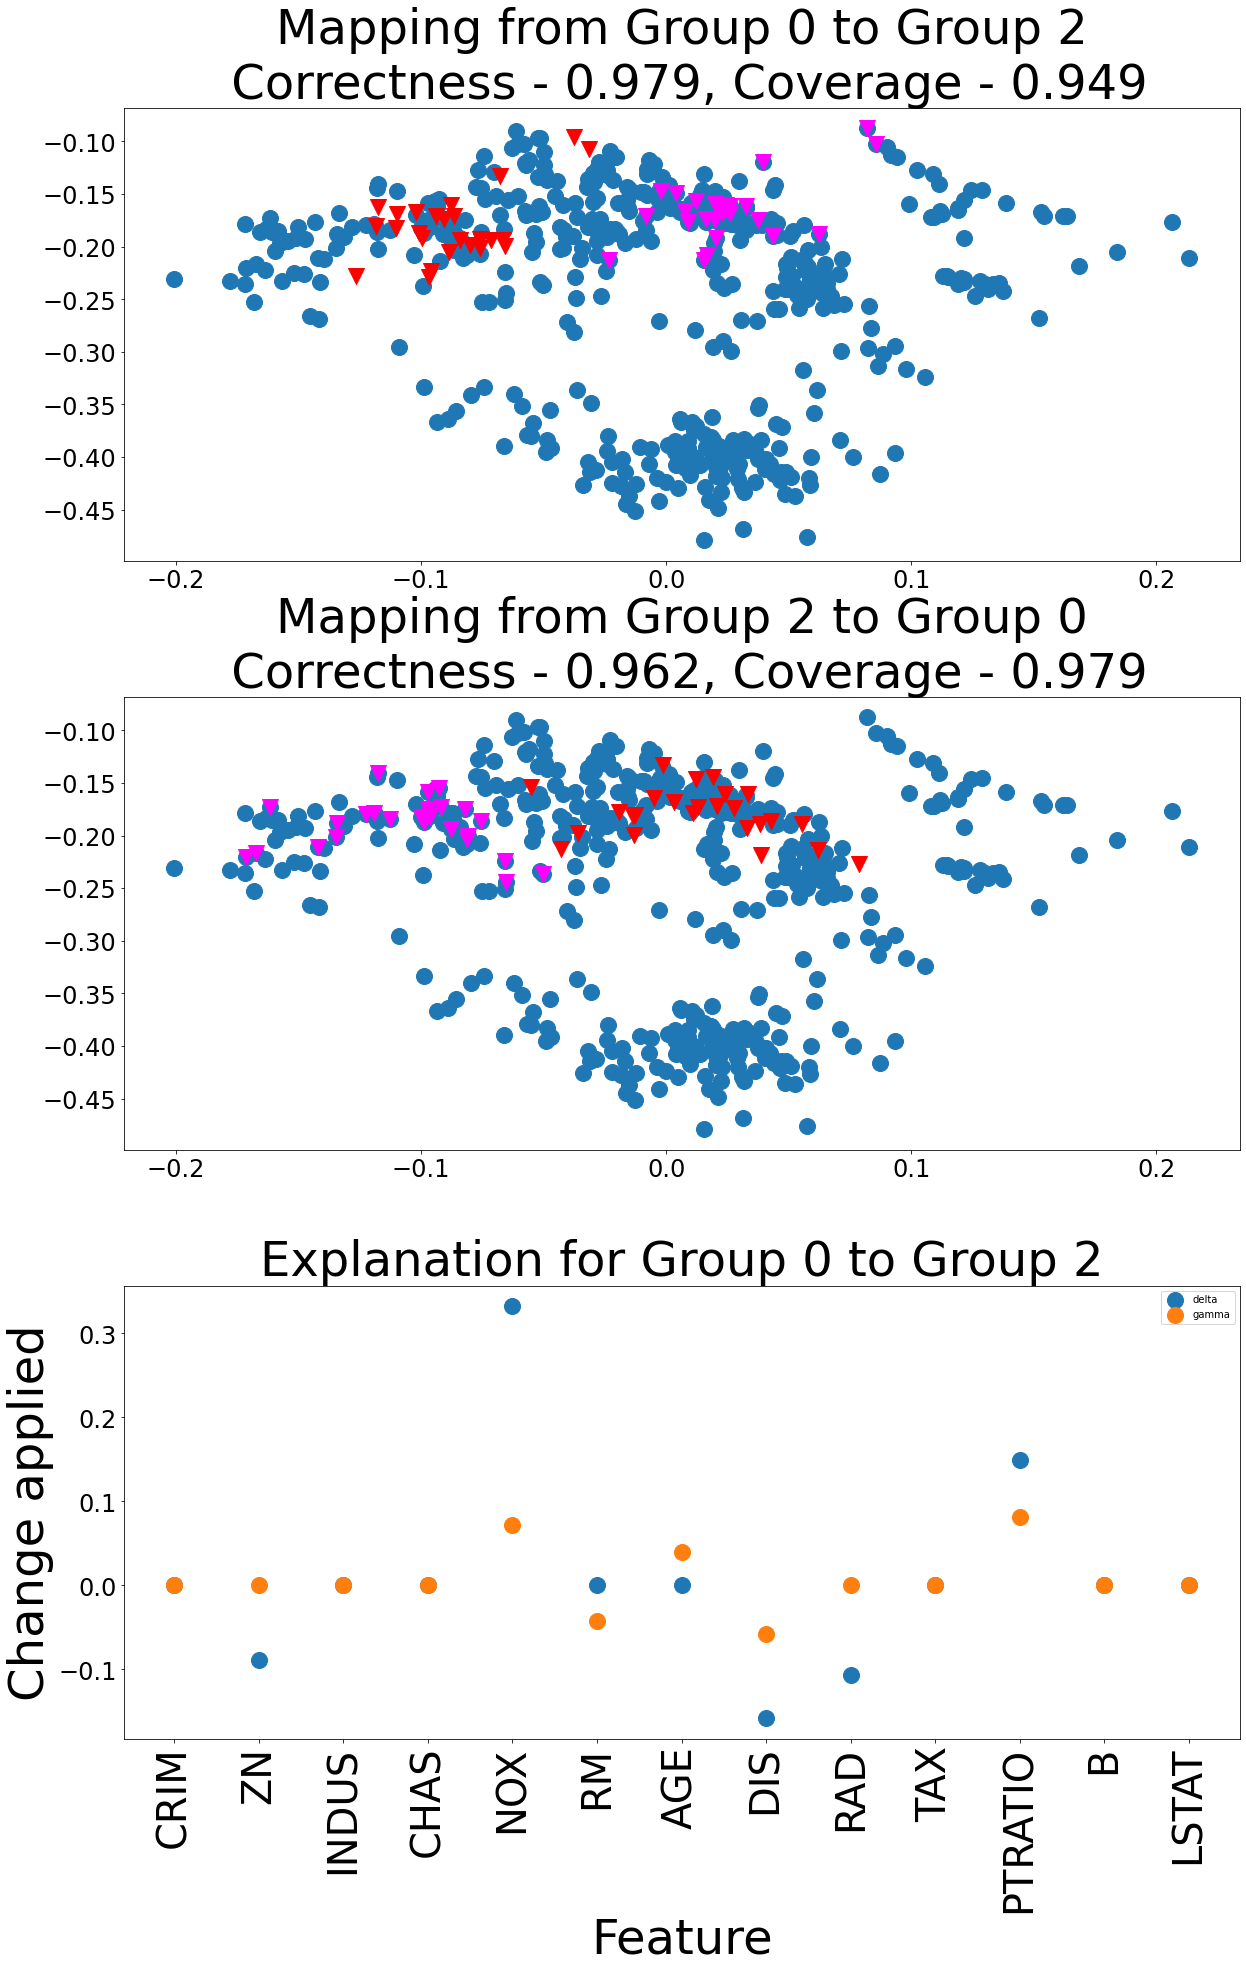

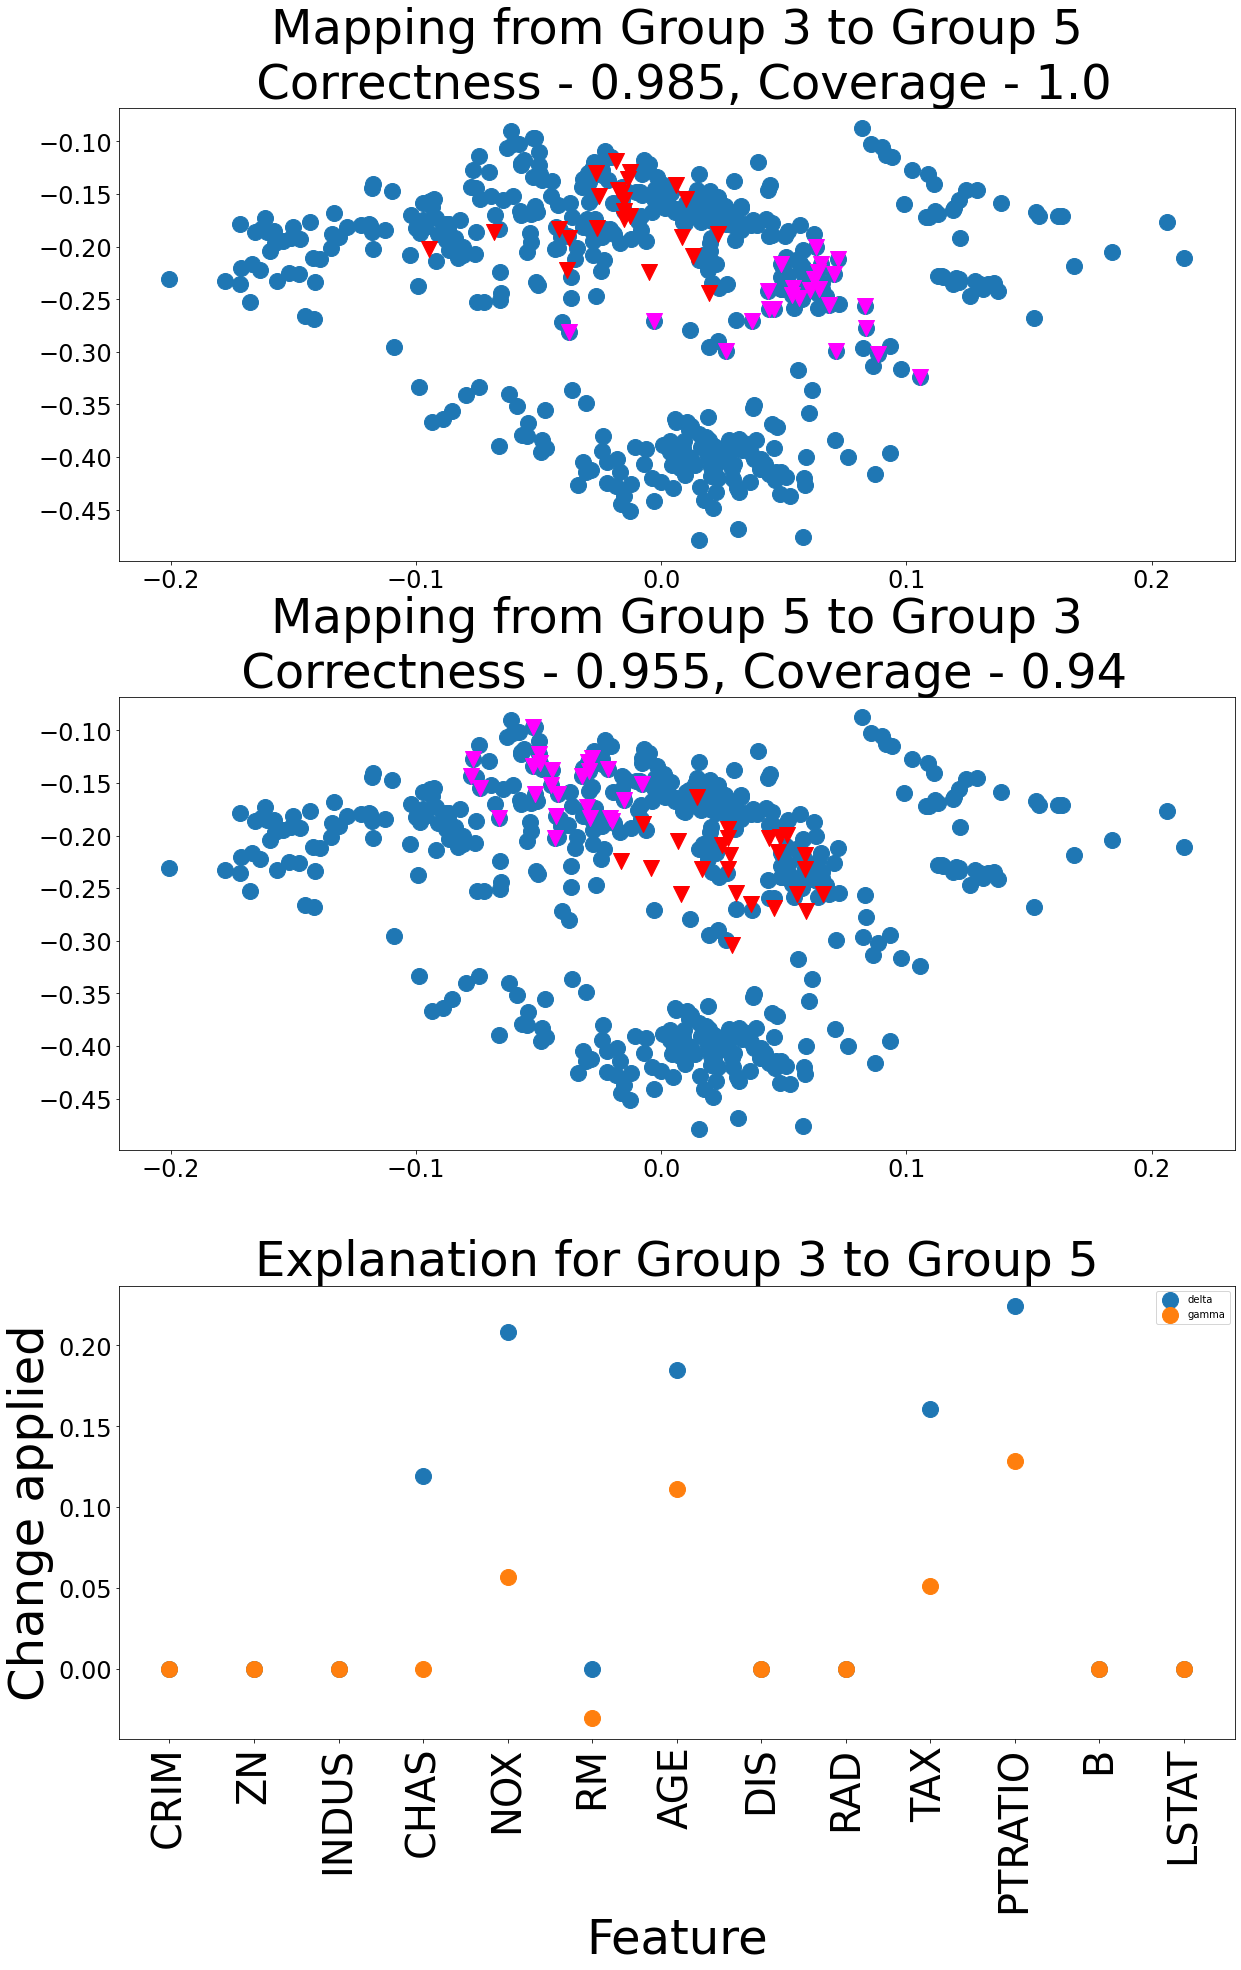

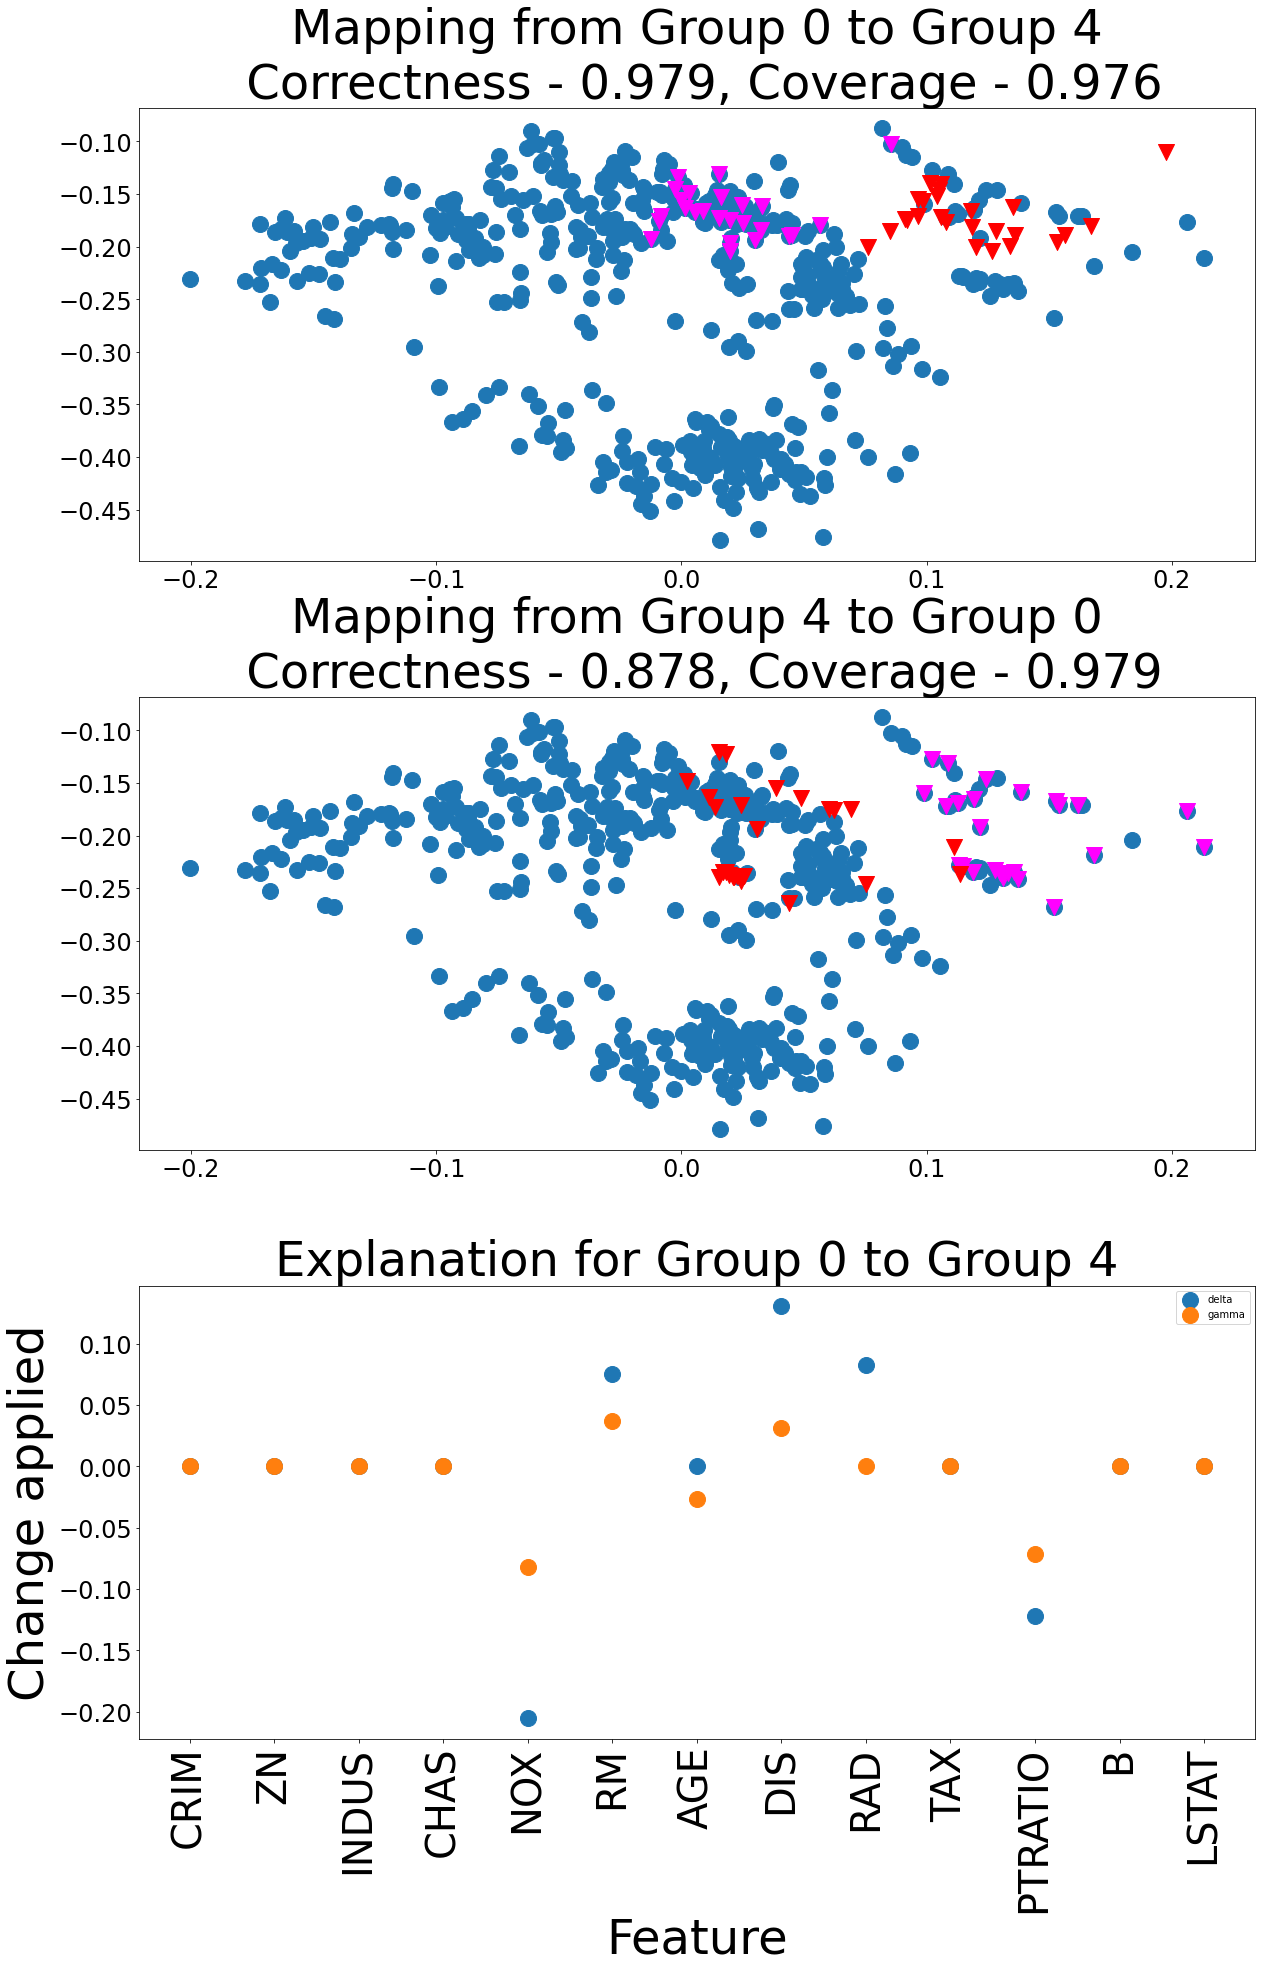

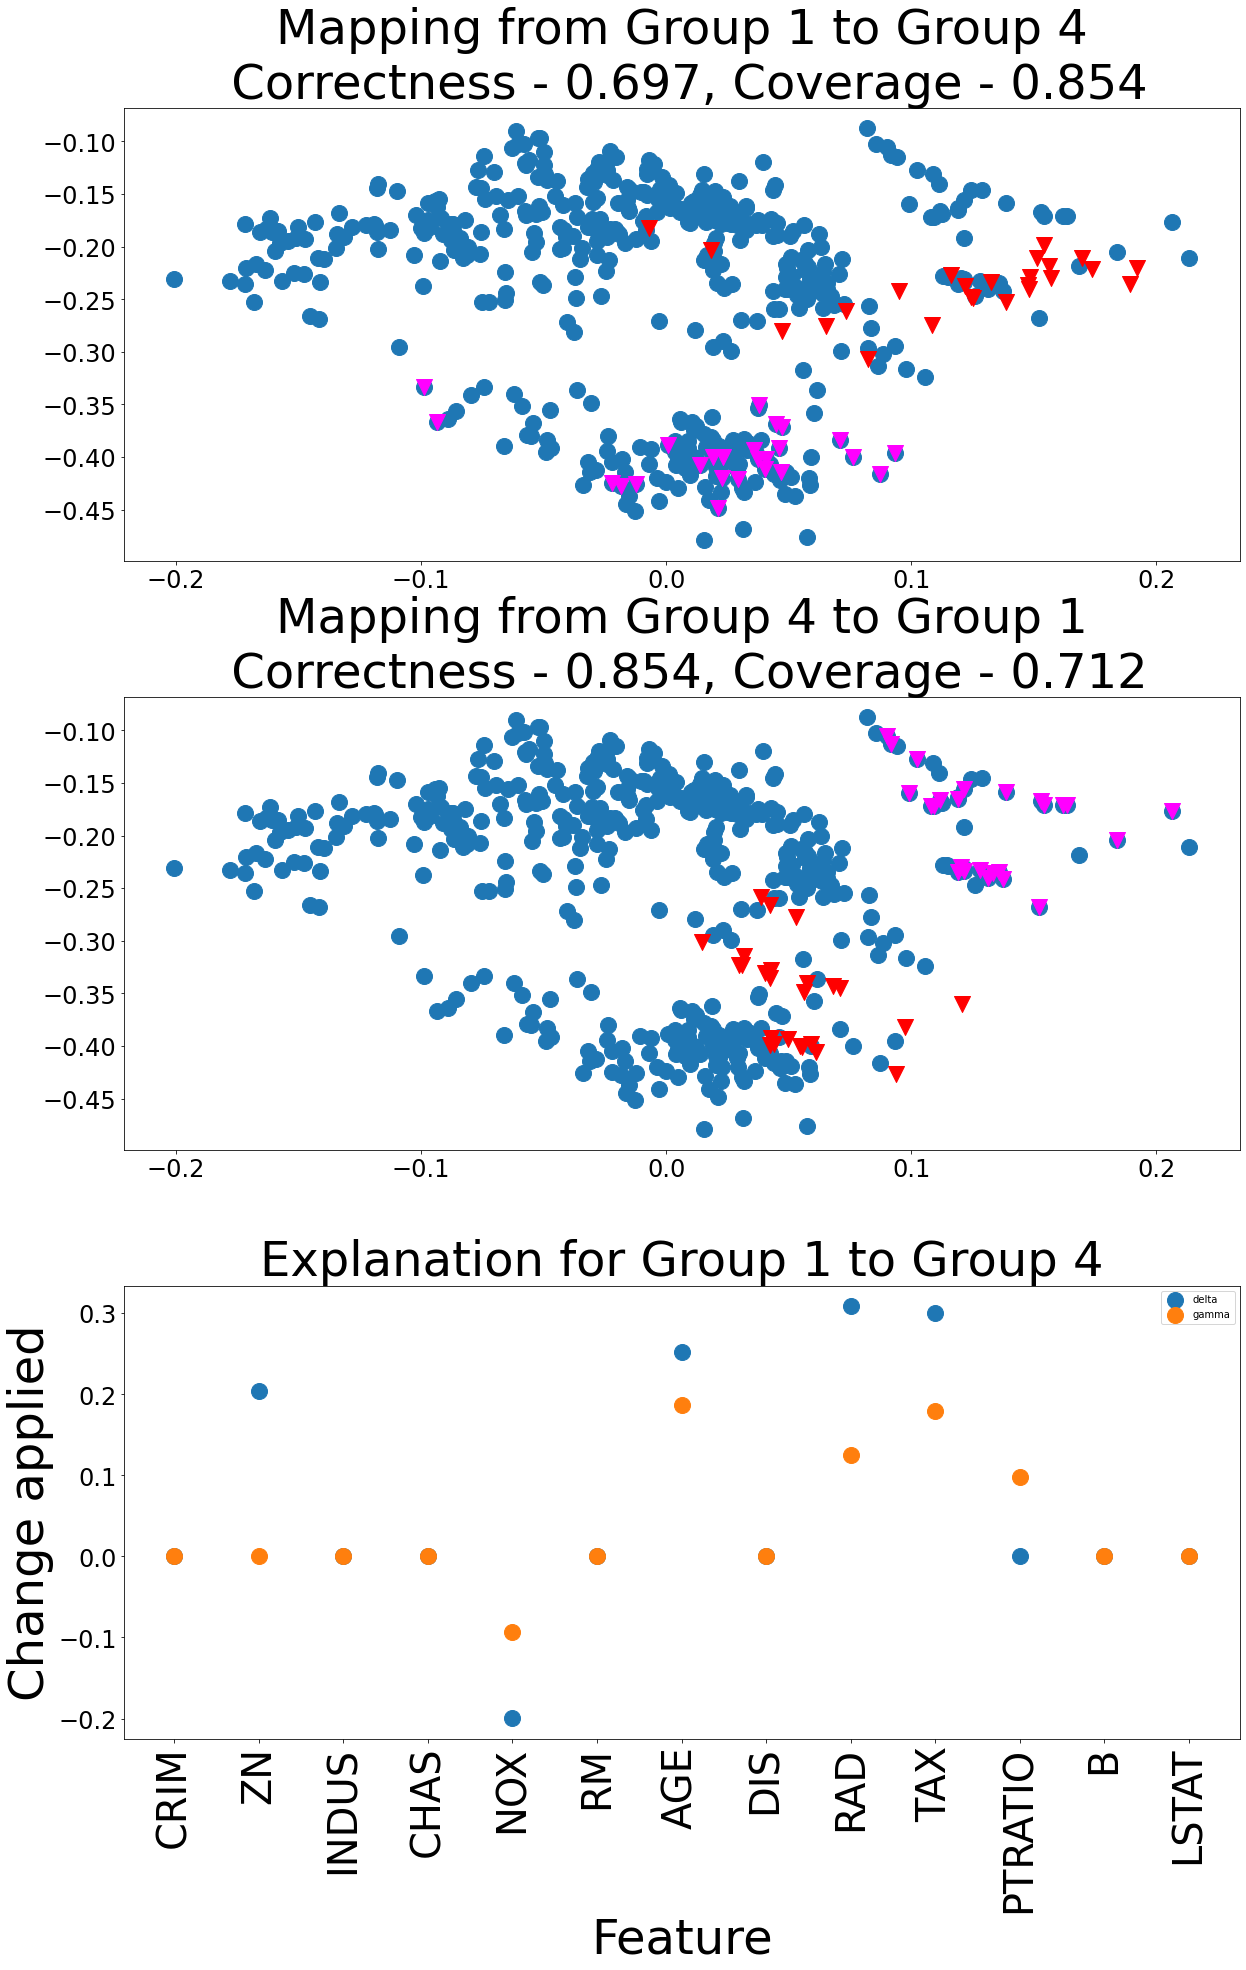

In [15]:
# Evaluate the explanations
# from eldr.plotter.myplot import *
k = 5
epsilon = 0.05
import torch
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

deltas_ = np.load(f"{results_path}deltas" + str(k) + ".npy")
logit_gammas_ = np.load(f"{results_path}logit_gammas" + str(k) + ".npy")
np.set_printoptions(suppress=True)
print(deltas_)
print(logit_gammas_)

a, b = Explainer.metrics(torch.tensor(x), indices, torch.from_numpy(deltas_), epsilon, k = k, logit_gammas=torch.from_numpy(logit_gammas_))

plot_metrics(a, b, name = "housing-metrics.png")

plot_explanation(model, x, data_rep, indices, deltas_, a, b, 0, 2, k = k, num_points = 25, name = "housing-0to2.png", feature_names = feature_names, logit_gammas=logit_gammas_)

plot_explanation(model, x, data_rep, indices, deltas_, a, b, 3, 5, k = k,  num_points = 25, name = "housing-3to5.png", feature_names = feature_names, logit_gammas=logit_gammas_)

plot_explanation(model, x, data_rep, indices, deltas_, a, b, 0, 4, k = k,  num_points = 25, name = "housing-0to4.png", feature_names = feature_names, logit_gammas=logit_gammas_)
plot_explanation(model, x, data_rep, indices, deltas_, a, b, 1, 4, k = k,  num_points = 25, name = "housing-1to4.png", feature_names = feature_names, logit_gammas=logit_gammas_)
